# **Project Name**    - Play Store App Review Analysis (EDA)



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1** - Gaurav Chandra Goswami

# **GitHub Link -**

https://github.com/gauravgary01/Almabetter_Capstone_Projects

# **Problem Statement**


## Find the best conditions to make debut on the app market

#### **Define Your Business Objective?**

## Profit

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
!pip install demoji

In [2]:
!pip install emoji

In [3]:
# Import Libraries
from datetime import datetime

import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.graph_objects as go
from wordcloud import WordCloud

import re

import emoji
import demoji

### Dataset Loading

In [4]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Play Store Data.csv')

### Dataset First View

In [6]:
# Dataset First Look
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(10841, 13)

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df[df.duplicated()]

App      Category  Rating  \
229                       Quick PDF Scanner + OCR FREE      BUSINESS     4.2   
236                                                Box      BUSINESS     4.2   
239                                 Google My Business      BUSINESS     4.4   
256                                ZOOM Cloud Meetings      BUSINESS     4.4   
261                          join.me - Simple Meetings      BUSINESS     4.0   
...                                                ...           ...     ...   
8643                    Wunderlist: To-Do List & Tasks  PRODUCTIVITY     4.6   
8654   TickTick: To Do List with Reminder, Day Planner  PRODUCTIVITY     4.6   
8658                           ColorNote Notepad Notes  PRODUCTIVITY     4.6   
10049        Airway Ex - Intubate. Anesthetize. Train.       MEDICAL     4.3   
10768                                             AAFP       MEDICAL     3.8   

       Reviews                Size      Installs  Type Price Content Rating  \
229      80805  Varies with device    5,000,000+  Free     0       Everyone   
236     159872  Varies with device   10,000,000+  Free     0       Everyone   
239      70991  Varies with device    5,000,000+  Free     0       Everyone   
256      31614                 37M   10,000,000+  Free     0       Everyone   
261       6989  Varies with device    1,000,000+  Free     0       Everyone   
...        ...                 ...           ...   ...   ...            ...   
8643    404610  Varies with device   10,000,000+  Free     0       Everyone   
8654     25370  Varies with device    1,000,000+  Free     0       Everyone   
8658   2401017  Varies with device  100,000,000+  Free     0       Everyone   
10049      123                 86M       10,000+  Free     0       Everyone   
10768       63                 24M       10,000+  Free     0       Everyone   

             Genres       Last Updated         Current Ver         Android Ver  
229        Business  February 26, 2018  Varies with device        4.0.3 and up  
236        Business      July 31, 2018  Varies with device  Varies with device  
239        Business      July 24, 2018    2.19.0.204537701          4.4 and up  
256        Business      July 20, 2018      4.1.28165.0716          4.0 and up  
261        Business      July 16, 2018           4.3.0.508          4.4 and up  
...             ...                ...                 ...                 ...  
8643   Productivity      April 6, 2018  Varies with device  Varies with device  
8654   Productivity     August 6, 2018  Varies with device  Varies with device  
8658   Productivity      June 27, 2018  Varies with device  Varies with device  
10049       Medical       June 1, 2018              0.6.88          5.0 and up  
10768       Medical      June 22, 2018               2.3.1          5.0 and up  

[483 rows x 13 columns]

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<Axes: >

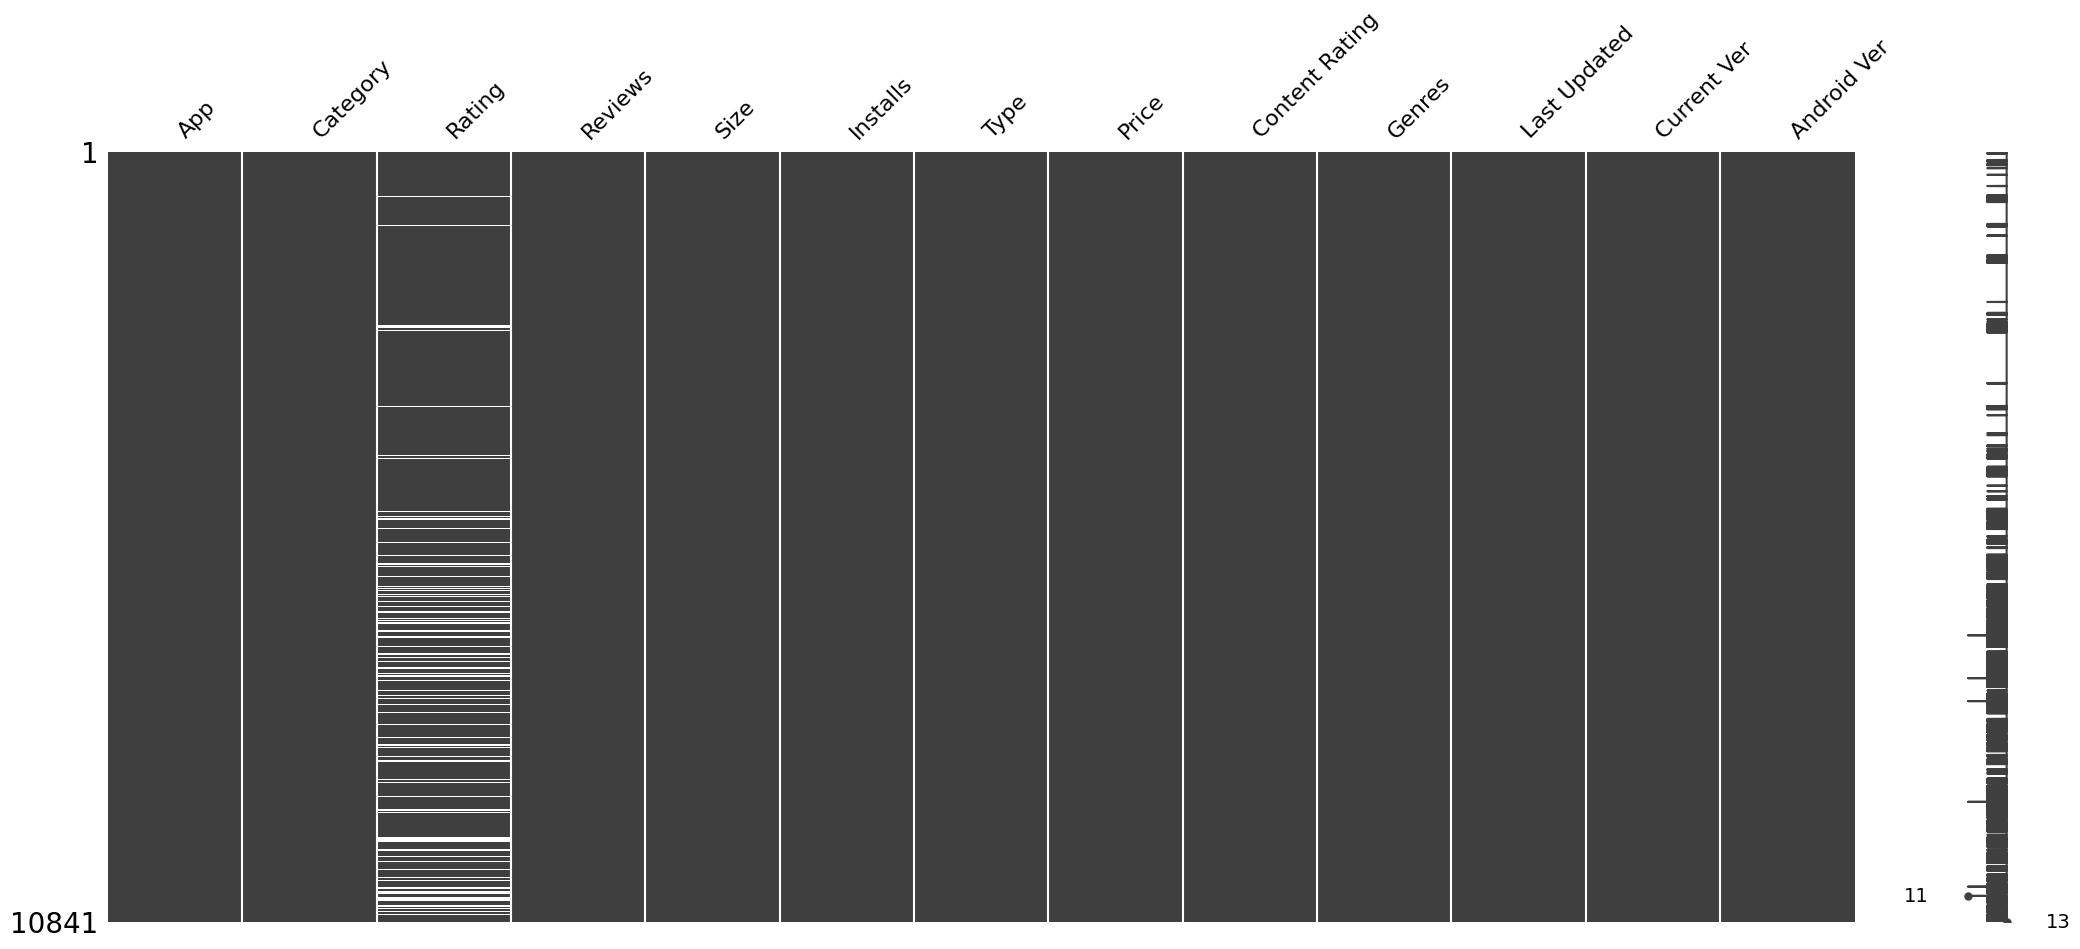

In [11]:
# Visualizing the missing values
msno.matrix(df)

### What did you know about your dataset?

Th dataset has **10841 rows** or entries and **13 columns**.

The **columns** being:
'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
'Android Ver'

The dataset has 1474 missing "Rating"s, 1 missing "Type"s, 1 missing "Content Rating"s, 8 missing "Currnt Ver"s and 3 missing "Android Vre"s.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

### Variables Description

Mainly, there are two **datatypes** in the dataset:\
Numerical(float64)\
Object(str, date as str)

The **columns with numerical datatypes** are:\
'Rating'

The **columns with object datatypes** are:\
'App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
'Android Ver'

The mean rating from the available mean ratings is 4.19

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [15]:
df['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [16]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [17]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [18]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [19]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [20]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [21]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [22]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [23]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [24]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [25]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [26]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [28]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [29]:
# Keeping original data frame intact and using a copy for further wrangling
df2 = df.copy()

In [30]:
# Dropping problematic row
df2.drop(10472, inplace=True)
df2.reset_index(drop=True, inplace=True)

In [31]:
# Dropping duplicate rows and duplicate rows based on app name in 'App' column
df2.drop_duplicates(inplace=True)
df2.drop_duplicates(subset='App', keep='first', inplace=True)
df2.reset_index(drop=True, inplace=True)

In [32]:
# Creating a data frame free of duplicates as contingent
df3 = df2.copy()

In [33]:
# Creating function to convert 'Reviews' column strings to machine readable numberical values based on end alphabet
def convert_to_millions(value):
    if isinstance(value, str) and value.endswith('M'):
        value = value[:-1] # remove the 'M' character
        number = int(value)
        return int(number * 1000000)
    else:
        return int(value)

In [34]:
df2['Reviews'] = df2['Reviews'].apply(convert_to_millions)

In [35]:
# Creating function to convert values in 'Size' column to machine readable numberical values based on end alphabet
def convert_to_MB(value):
    if isinstance(value, str) and value.endswith('M'):
      value = value[:-1] # remove the 'M' character
      number = round(float(value), 2)
      return number
    elif isinstance(value,str) and value.endswith('k'):
      value = value[:-1]
      number = round(float(value), 2)
      return number/1024
    elif isinstance(value,str) and value.endswith('+'):
      value = value[:-1]
      number = round(float(value), 2)
      return number
    else:
        return value

In [36]:
# Creating function to clean values in columns off ','s and '+' signs
def clean_values(value):
  if isinstance(value, str):
    value = value.replace(',', '')
    value = value.replace('+', '')
  return value

In [37]:
df2['Size'] = df2['Size'].apply(clean_values)

In [38]:
df2['Size'] = df2['Size'].apply(convert_to_MB)

In [39]:
df2['Size'] = df2['Size'].replace('Varies with device', np.nan)

In [40]:
# Performing mean imputation on 'Size' column
df2['Size'].replace(np.nan, round(df2['Size'].mean(), 2), inplace = True)

In [41]:
df2['Installs'] = df2['Installs'].apply(clean_values)

In [42]:
df2['Installs'] = df2['Installs'].astype(int)

In [43]:
df2['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [44]:
df2['Type'].mode()[0]

'Free'

In [45]:
df2['Type'].value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

In [46]:
# Write your code to make your dataset analysis ready.
df2['Type'].replace(np.nan, 'Free', inplace=True)

In [47]:
df2['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [48]:
# Creating function to clean 'Price' column off '$' signs
def clean_d_signs(value):
  if isinstance(value, str):
    value = value.replace('$', '')
    value = float(value)
  return value

In [49]:
df2['Price'] = df2['Price'].apply(clean_d_signs)

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 981.1+ KB


In [51]:
df2['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [52]:
df2.replace('Unrated', df2['Content Rating'].mode()[0], inplace=True)

In [53]:
df2['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [54]:
df2['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [55]:
# Converting dates as strings in 'Last Updated' column to datetime format values
df2['Last Updated'] = pd.to_datetime(df2['Last Updated'], format="%B %d, %Y")

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            9659 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9659 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 981.1+ KB


In [57]:
df2['Android Ver'].value_counts()

4.1 and up            2202
4.0.3 and up          1395
4.0 and up            1285
Varies with device     990
4.4 and up             818
2.3 and up             616
5.0 and up             512
4.2 and up             372
2.3.3 and up           273
2.2 and up             239
3.0 and up             231
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [58]:
# Creating dictionary for first number in 'Android Ver' to replace strings as integers
dict2 = {
    '4.0.3 and up': 4,
    '4.2 and up': 4,
    '4.4 and up': 4,
    '2.3 and up': 2,
    '3.0 and up': 3,
    '4.1 and up': 4,
    '4.0 and up': 4,
    '2.3.3 and up': 2,
    'Varies with device': np.nan,
    '2.2 and up': 2,
    '5.0 and up': 5,
    '6.0 and up': 6,
    '1.6 and up': 1,
    '1.5 and up': 1,
    '2.1 and up': 2,
    '7.0 and up': 7,
    '5.1 and up': 5,
    '4.3 and up': 4,
    '4.0.3 - 7.1.1': 4,
    '2.0 and up': 2,
    '3.2 and up': 3,
    '4.4W and up': 4,
    '7.1 and up': 7,
    '7.0 - 7.1.1': 7,
    '8.0 and up': 8,
    '5.0 - 8.0': 5,
    '3.1 and up': 3,
    '2.0.1 and up': 2,
    '4.1 - 7.1.1': 4,
    np.nan: np.nan,
    '5.0 - 6.0': 5,
    '1.0 and up': 1,
    '2.2 - 7.1.1': 2,
    '5.0 - 7.1.1': 5
}

In [59]:
# Replacing values in string format to usable integers
df2['Android Ver'] = df2['Android Ver'].replace(dict2)

In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            9659 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9659 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     8667 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 981.1+ KB


In [61]:
# Cannot create a uniform identifier for 'Current Ver' as the values are in typical and unique formats for most apps
df2['Current Ver'].value_counts()

Varies with device    1055
1.0                    799
1.1                    260
1.2                    176
2.0                    149
                      ... 
2.27.1                   1
1.6.11                   1
20180517                 1
3.1.00                   1
2.0.148.0                1
Name: Current Ver, Length: 2817, dtype: int64

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            9659 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9659 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     8667 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 981.1+ KB


In [63]:
# Performing mean and mode imputation as appropriate on nan values
df2['Rating'] = df2['Rating'].replace(np.nan, round(df2['Rating'].mean(), 1))
df2['Android Ver'] = df2['Android Ver'].replace(np.nan, df2['Android Ver'].mean())
df2['Android Ver'] = df2['Android Ver'].astype(int)
df2['Current Ver'] = df2['Current Ver'].replace(np.nan, df2['Current Ver'].mode()[0])

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          9659 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            9659 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9659 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9659 non-null   object        
 12  Android Ver     9659 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 981.1+ KB


In [65]:
# Creating a new column to get ratios of Reviews to Installs to drop out rows with fake reviews i.e those rows that have more reviews than installs
df2['Reviews to Installs'] = round(df2['Reviews']/df2['Installs'], 5)

In [66]:
# Dropping rows with fake reviews
df2 = df2[df2['Reviews to Installs'] <= 1.0]
df2.reset_index(inplace=True)
df2.drop('index', axis=1, inplace=True)

<ipython-input-66-d4e31b1defa8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('index', axis=1, inplace=True)


In [67]:
df2['Size'] = df2['Size'].round(3)

<ipython-input-67-c89147c413d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Size'] = df2['Size'].round(3)


In [68]:
# Creating copy of data frame after data wrangling before deleting rows with no reviews
df4 = df2.copy()

In [69]:
# Dropping Rows with 0 Reviews and
df2 = df2[(df2['Reviews'] != 0) & (df2['Size'] > 0.01)]

In [70]:
df2.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver  Android Ver  \
0               Art & Design   2018-01-07               1.0.0            4   
1  Art & Design;Pretend Play   2018-01-15               2.0.0            4   
2               Art & Design   2018-08-01               1.2.4            4   
3               Art & Design   2018-06-08  Varies with device            4   
4    Art & Design;Creativity   2018-06-20                 1.1            4   

   Reviews to Installs  
0              0.01590  
1              0.00193  
2              0.01750  
3              0.00431  
4              0.00967

### What all manipulations have you done and insights you found?

1.   First of all I have made a copy of the original dataframe as 'df2'.
2.   Then I dropped all the duplicate rows in the dataset and a single problematic row after I kept of the a copy of 'df2' as 'df3'.

3.   Then I have converted the counts in 'Reviews' column to integers, that were originally in the format:digit.digit'M', by using a function 'convert_to_millions'. Remaining values were already integers in string format and using .astype function, I converted all the values to integer format.

4.   Then I replaced the 'Varies with device' values in the 'Size' column with np.nan which I later replaced with the mean of the column.

5.   Then I converted all the values in the 'Size' column with values in megabyte(MB) scale in float format using a function 'convert_to_MB'.

6.   Then I cleaned the values in the 'Installs' column as they had special characters and commas in their count values using a function 'clean_values' after which I converted the strings to integers using .astype.

7.   Then I checked the unique values in the 'Type' column. I then replaced the nan values with the mode of the column.

8.   Then I checked the unique values in the 'Price' column. I then removed the dollar signs in it, using a function 'clean_d_signs', so it is easier to convert to floats later using .astype function.

9.   Then I checked the unique values in the 'Content Rating' column and no modifications were necessary.

10.   No modifications were necessary for the 'Genres' column.

11.   Then I converted the dates, as strings, in the 'Last Updated' column to dates in datetime format using the datetime library and a function 'convert_strings_to_dates'.

12.   Then I assigned the values in the 'Android Ver' columns with the first digit of the version in integer format so it is easier to find patterns in the analysis later.

13.   No modifications were necessary for the 'Category' column either.

14.   Then I replaced the null values in the 'Rating' column with the mean of that column.

15.   Then I replaced the null values in the 'Android Ver' column with the mean of that column.

16.   Then I replaced the null values of the 'Current Ver' column with the mode of that column.

17. Then I created a column 'Reviews to Installs' (Reviews/Installs) and removed the rows having 'Reviews to Installs' value greater than 1 as they implied fake reviews since number of reviews cannot be more than number of installs.

18. Then I deleted all rows without a single review that still had rating by mean imputation.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [71]:
# Checking correlation coefficients to pick out relevant columns by other columns
df2.corr()

<ipython-input-71-73a322bc6706>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


Rating   Reviews      Size  Installs     Price  \
Rating               1.000000  0.054631  0.056274  0.039576 -0.021225   
Reviews              0.054631  1.000000  0.084927  0.624750 -0.007430   
Size                 0.056274  0.084927  1.000000  0.056189 -0.022547   
Installs             0.039576  0.624750  0.056189  1.000000 -0.009211   
Price               -0.021225 -0.007430 -0.022547 -0.009211  1.000000   
Android Ver          0.037439 -0.021085  0.133179 -0.032765  0.010746   
Reviews to Installs  0.192034  0.052133  0.031970 -0.022681  0.037061   

                     Android Ver  Reviews to Installs  
Rating                  0.037439             0.192034  
Reviews                -0.021085             0.052133  
Size                    0.133179             0.031970  
Installs               -0.032765            -0.022681  
Price                   0.010746             0.037061  
Android Ver             1.000000             0.018287  
Reviews to Installs     0.018287             1.000000

## **Performing Univariate, Bivariate and Multivariate analyses by columns**

## Exploring column 'Category'

In [72]:
# Creating function to get basic univariate analyses of categorical data
def categorical_univariate(data, column_name):
  """
  Prints summary statistics, measures of variability, and pie charts for a categorical column.

  Args:
    data: Pandas DataFrame containing the data.
    column_name: String name of the column to analyze.
  """

  # Print frequency table
  print(f"\n--- Frequency table for '{column_name}' ---")
  print(data[column_name].value_counts())

  # Print summary statistics
  print(f"\n--- Summary statistics for '{column_name}' ---")
  print(data[column_name].describe())

  # Create subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

  # Pie chart for top 5 values
  top_5 = data[column_name].value_counts().head(5)
  ax1.pie(top_5.values, labels=list(top_5.items()), autopct="%1.1f%%")
  ax1.set_title(f"Top 5 Values for '{column_name}'")

  # Bar chart for all values
  data[column_name].value_counts().plot(kind="bar", ax=ax2)
  ax2.set_title(f"All Values for '{column_name}'")

  plt.show()


--- Frequency table for 'Category' ---
FAMILY                 1760
GAME                    943
TOOLS                   783
PERSONALIZATION         344
BUSINESS                342
PRODUCTIVITY            335
LIFESTYLE               335
MEDICAL                 332
FINANCE                 330
SPORTS                  302
COMMUNICATION           286
PHOTOGRAPHY             276
HEALTH_AND_FITNESS      264
NEWS_AND_MAGAZINES      238
SOCIAL                  226
TRAVEL_AND_LOCAL        205
BOOKS_AND_REFERENCE     200
SHOPPING                196
VIDEO_PLAYERS           159
DATING                  152
MAPS_AND_NAVIGATION     127
EDUCATION               119
FOOD_AND_DRINK          103
ENTERTAINMENT           102
AUTO_AND_VEHICLES        81
LIBRARIES_AND_DEMO       81
WEATHER                  76
HOUSE_AND_HOME           69
ART_AND_DESIGN           63
PARENTING                60
EVENTS                   58
COMICS                   56
BEAUTY                   51
Name: Category, dtype: int64

--- Su

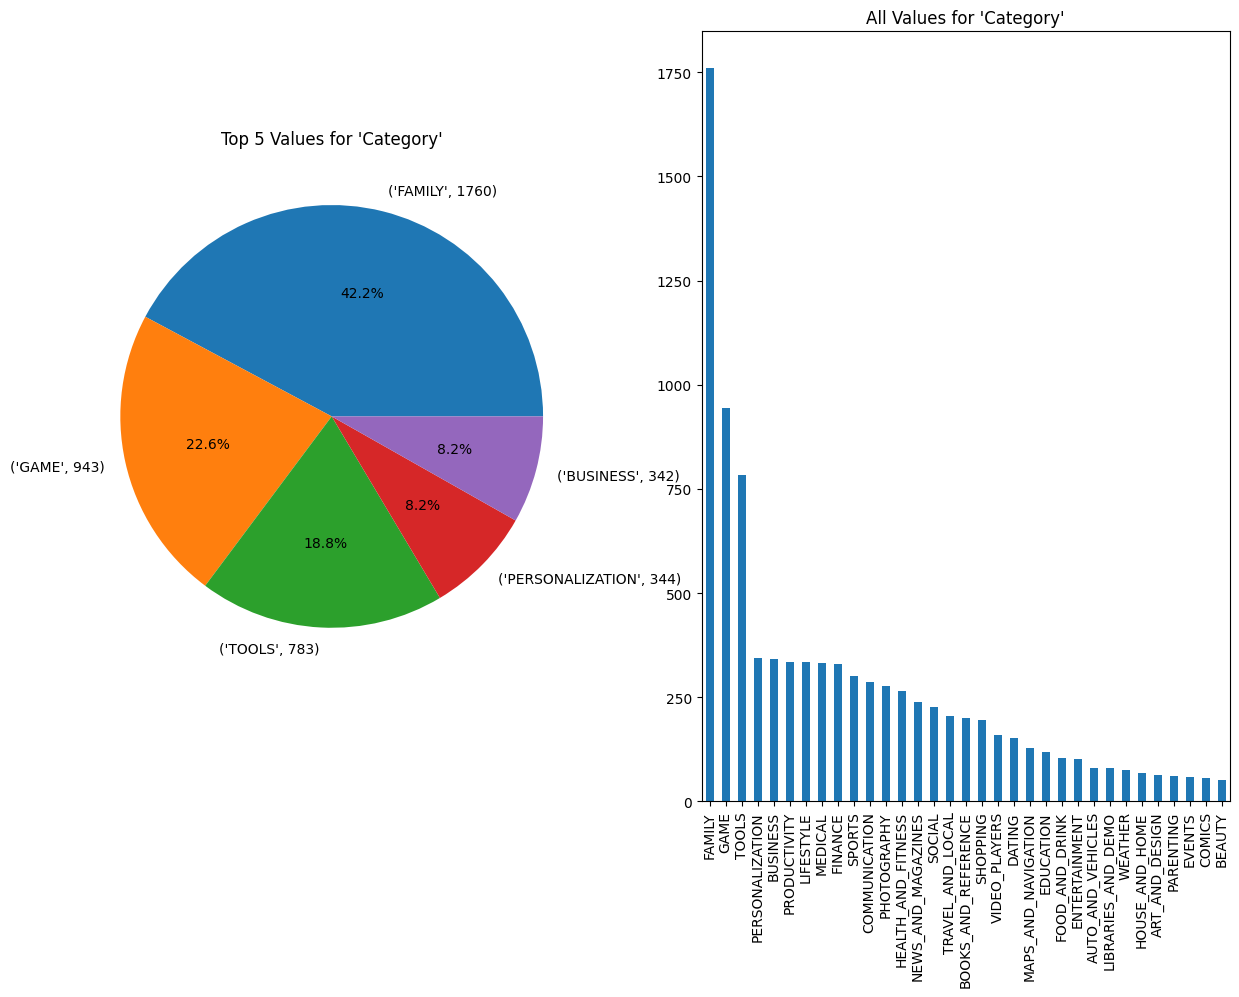

In [73]:
categorical_univariate(df2, 'Category')

In [74]:
# Creating function to get top 5 and bottom 5 by count
def top_n_bottom_5_by_count(data, column_name):
  """
  Prints pie charts for top 5 and bottom 5 values by count for a categorical column using subplots.

  Args:
    data: Pandas DataFrame containing the data.
    column_name: String name of the column to analyze.
  """

  # Get value counts
  value_counts = data[column_name].value_counts()

  # Create subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

  # Top 5
  top_5 = value_counts.head(5)

  wedges, texts, autotexts = ax1.pie(top_5, labels= list(top_5.items()), autopct="%1.1f%%", wedgeprops=dict(width=0.3))
  ax1.set_title(f"Top 5 {column_name} by count")

  # Bottom 5
  bottom_5 = value_counts.tail(5)

  wedges, texts, autotexts = ax2.pie(bottom_5, labels= list(bottom_5.items()), autopct="%1.1f%%", wedgeprops=dict(width=0.3))
  ax2.set_title(f"Bottom 5 {column_name} by count")

  plt.show()

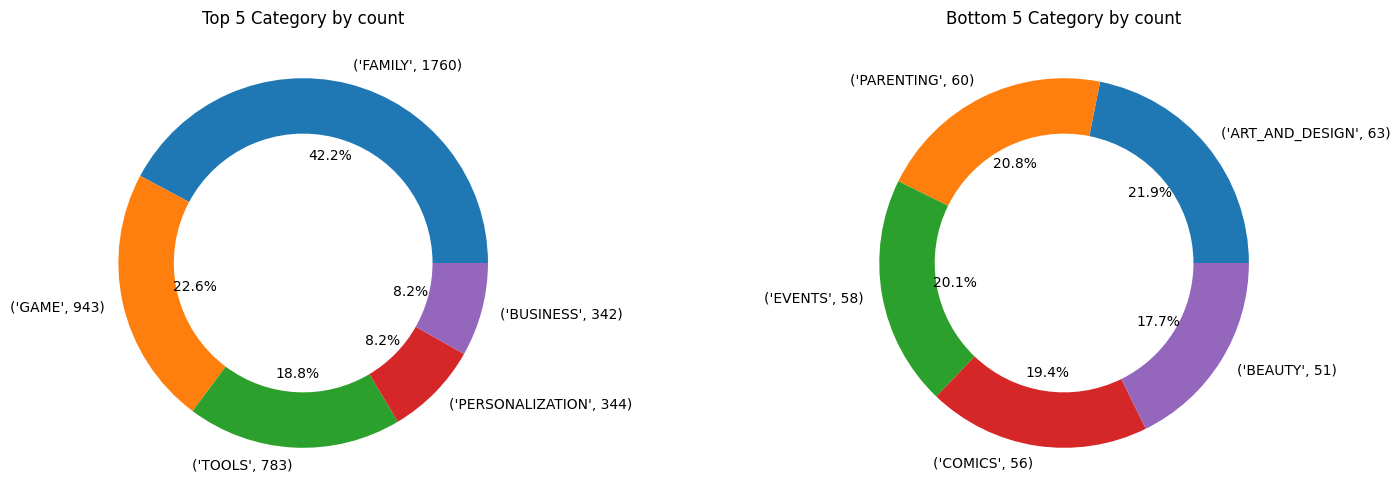

In [75]:
top_n_bottom_5_by_count(df2, 'Category')

In [76]:
# Creating function to get top 5 and bottom 5 of a column by sum of values in another column
def top_n_bottom_5_by_sum_feature(data, groupby_column_name, column_name):
  '''
  Takes in a 'data', a 'groupby_column_name' to groupby, and a 'column_name' to sort values
  according to after summing it.
  Args:
    data: Pandas DataFrame containing the data.
    groupby_column_name: String name of the column to groupby the data.
    column_name: String name of the column to sort the values according to its sum.
  '''
  # Get value counts
  grouped_n_sorted_df = data.groupby(groupby_column_name)[column_name].sum().sort_values(ascending=False)

  # Create subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

  #Top 5
  top_5 = grouped_n_sorted_df.head(5)
  wedges, texts, autotexts = ax1.pie(top_5, labels= list(top_5.items()), autopct="%1.1f%%", wedgeprops=dict(width=0.3))
  ax1.set_title(f"Top 5 {groupby_column_name} by sum {column_name}")

  #Bottom 5
  bottom_5 = grouped_n_sorted_df.tail(5)
  wedges, texts, autotexts = ax2.pie(bottom_5, labels= list(bottom_5.items()), autopct="%1.1f%%", wedgeprops=dict(width=0.3))
  ax2.set_title(f"Bottom 5 {groupby_column_name} by sum {column_name}")

  # Show the plot
  plt.show()

In [77]:
# Creating function to get top 5 and bottom 5 of a column by mean of values in another column
def top_n_bottom_5_by_mean_feature(data, groupby_column_name, column_name):
  '''
  Takes in a 'data', a 'groupby_column_name' to groupby, and a 'column_name' to sort values
  according to after getting its mean.
  Args:
    data: Pandas DataFrame containing the data.
    groupby_column_name: String name of the column to groupby the data.
    column_name: String name of the column to sort the values according to its mean.
  '''
  # Get value counts
  grouped_n_sorted_df = data.groupby(groupby_column_name)[column_name].mean().sort_values(ascending=False)

  # Create subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

  #Top 5
  top_5 = grouped_n_sorted_df.head(5)
  wedges, texts, autotexts = ax1.pie(top_5, labels= list(top_5.items()), autopct="%1.1f%%", wedgeprops=dict(width=0.3))
  ax1.set_title(f"Top 5 {groupby_column_name} by mean {column_name}")

  #Bottom 5
  bottom_5 = grouped_n_sorted_df.tail(5)
  wedges, texts, autotexts = ax2.pie(bottom_5, labels= list(bottom_5.items()), autopct="%1.1f%%", wedgeprops=dict(width=0.3))
  ax2.set_title(f"Bottom 5 {groupby_column_name} by mean {column_name}")

  # Show the plot
  plt.show()

In [78]:
# Creating function to get top 5 and bottom 5 of a column by median of values in another column
def top_n_bottom_5_by_median_feature(data, groupby_column_name, column_name):
  '''
  Takes in a 'data', a 'groupby_column_name' to groupby, and a 'column_name' to sort values
  according to after operating on it by 'operation'.
  Args:
    data: Pandas DataFrame containing the data.
    groupby_column_name: String name of the column to groupby the data.
    column_name: String name of the column to sort the values according to its median.
  '''
  # Get value counts
  grouped_n_sorted_df = data.groupby(groupby_column_name)[column_name].median().sort_values(ascending=False)

  # Create subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

  #Top 5
  top_5 = grouped_n_sorted_df.head(5)
  wedges, texts, autotexts = ax1.pie(top_5, labels= list(top_5.items()), autopct="%1.1f%%", wedgeprops=dict(width=0.3))
  ax1.set_title(f"Top 5 {groupby_column_name} by median {column_name}")

  #Bottom 5
  bottom_5 = grouped_n_sorted_df.tail(5)
  wedges, texts, autotexts = ax2.pie(bottom_5, labels= list(bottom_5.items()), autopct="%1.1f%%", wedgeprops=dict(width=0.3))
  ax2.set_title(f"Bottom 5 {groupby_column_name} by median {column_name}")

  # Show the plot
  plt.show()

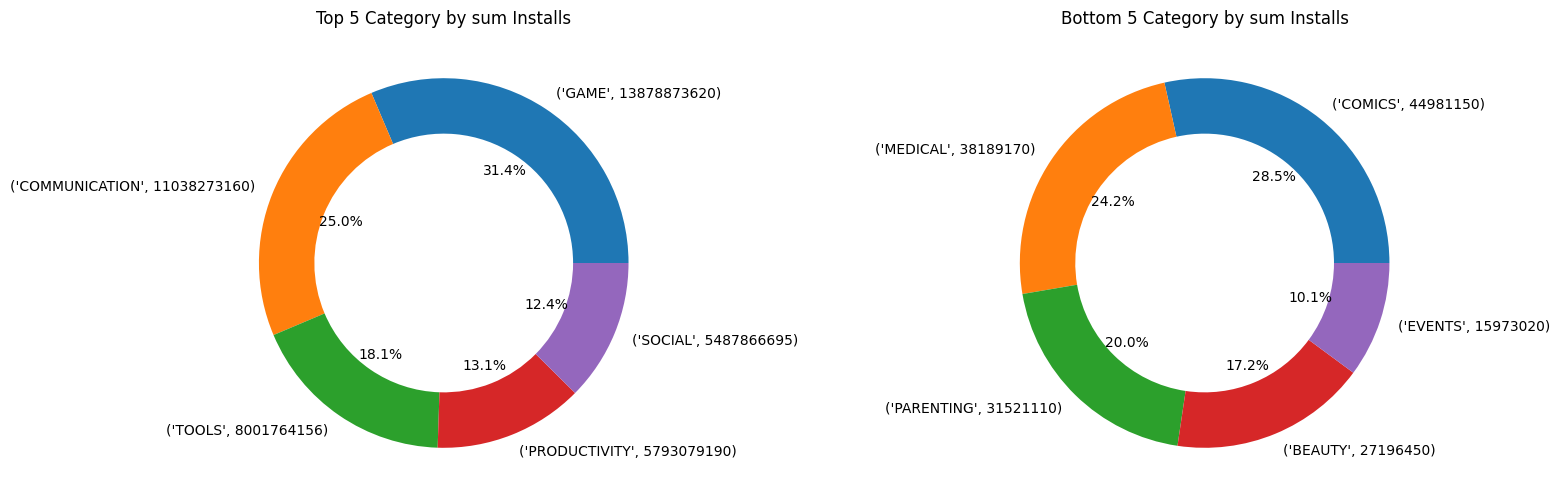

In [79]:
top_n_bottom_5_by_sum_feature(df2, 'Category', 'Installs')

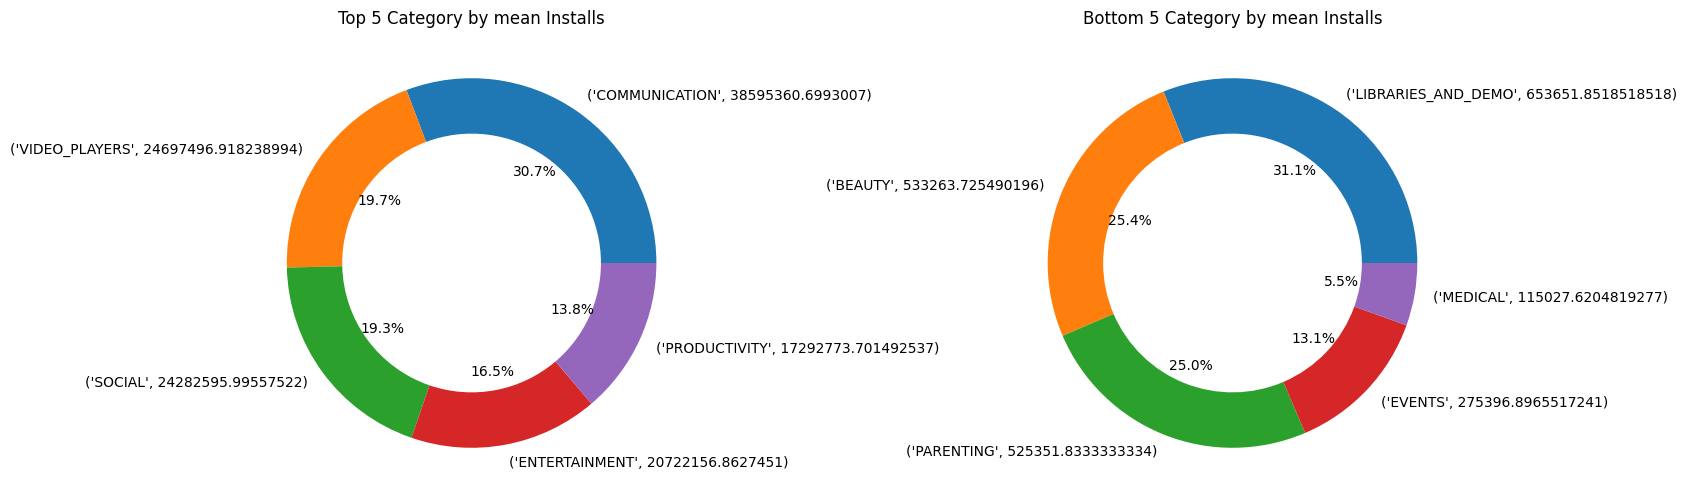

In [80]:
top_n_bottom_5_by_mean_feature(df2, 'Category', 'Installs')

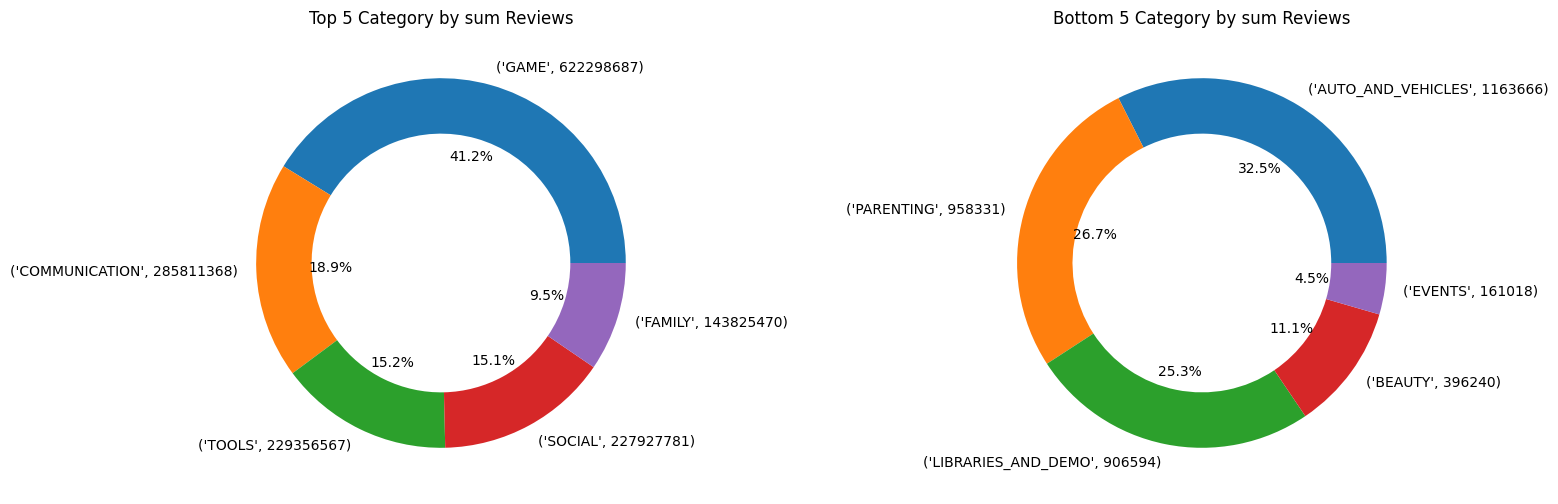

In [81]:
top_n_bottom_5_by_sum_feature(df2, 'Category', 'Reviews')

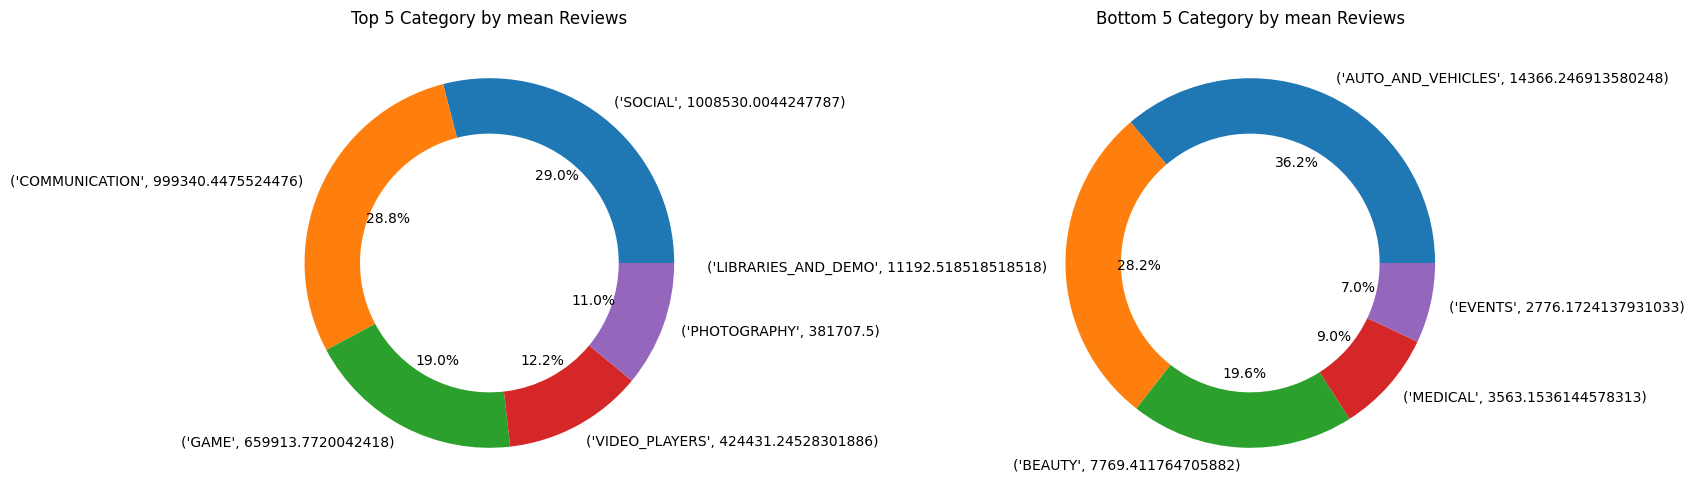

In [82]:
top_n_bottom_5_by_mean_feature(df2, 'Category', 'Reviews')

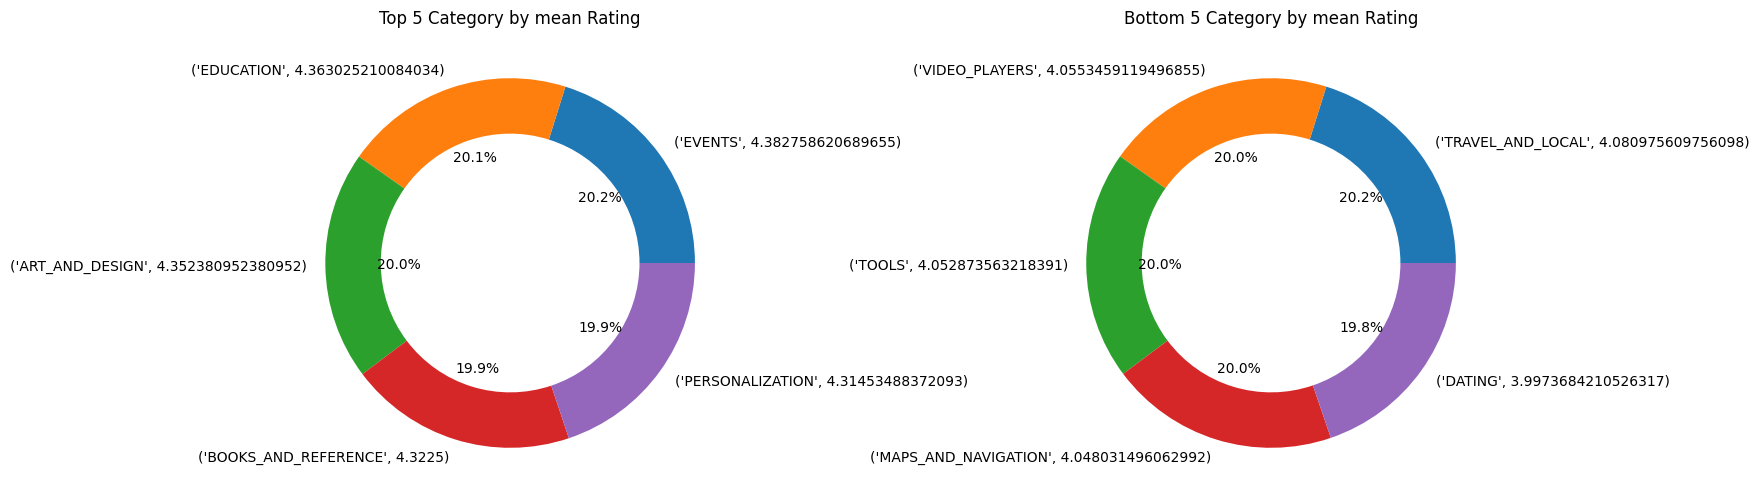

In [83]:
top_n_bottom_5_by_mean_feature(df2, 'Category', 'Rating')

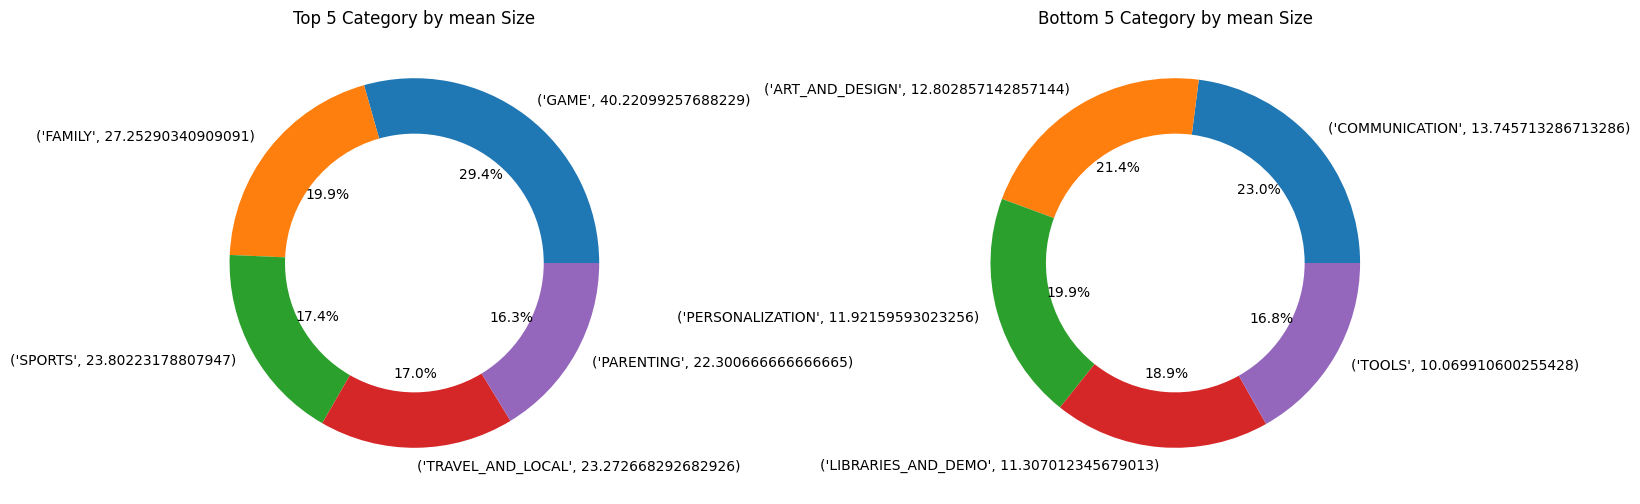

In [84]:
top_n_bottom_5_by_mean_feature(df2, 'Category', 'Size')

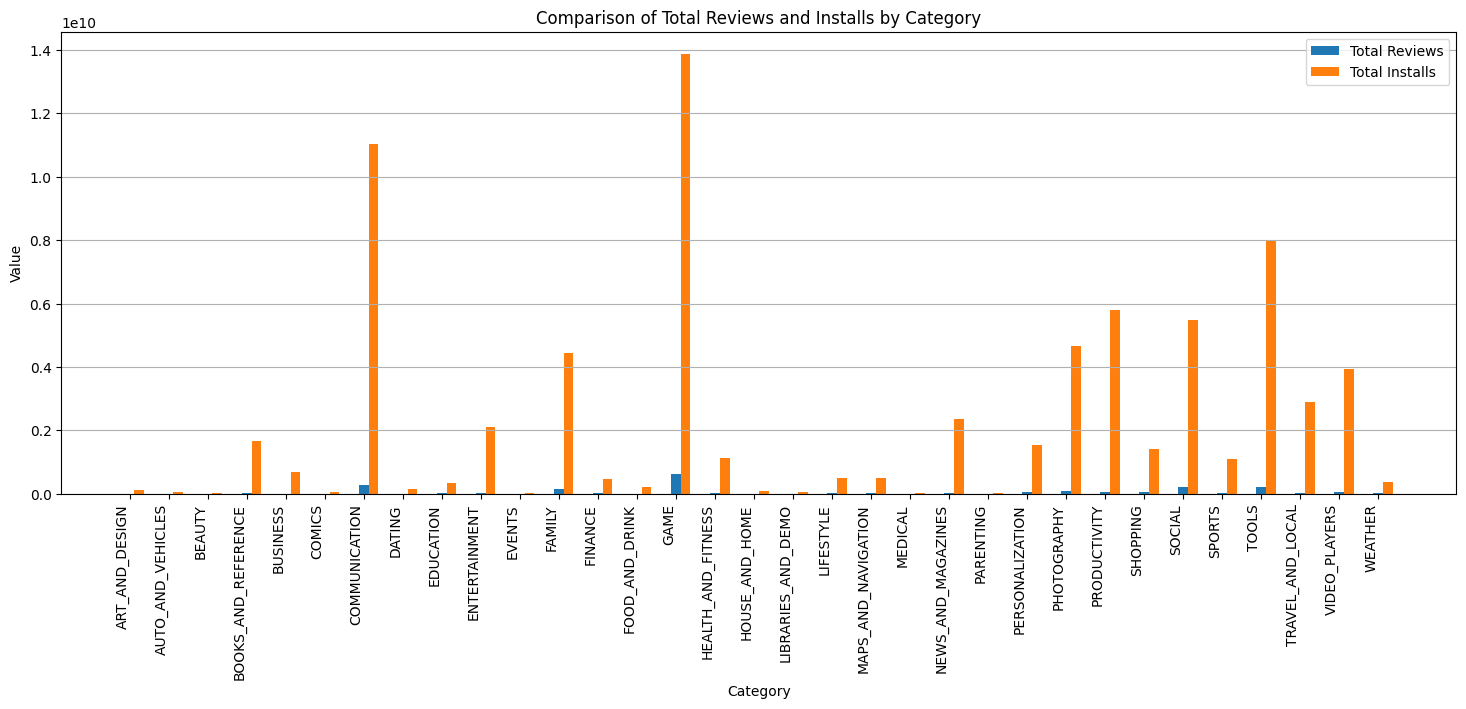

In [85]:
grouped_data = df2.groupby('Category')
total_reviews = grouped_data['Reviews'].sum()
total_installs = grouped_data['Installs'].sum()

categories = total_reviews.index.to_list()
x_labels = np.arange(len(categories))
bar_width = 0.25

fig, ax = plt.subplots(figsize=(18, 6))

# Bar plot for average reviews
ax.bar(x_labels + bar_width, total_reviews, width=bar_width, label='Total Reviews')

# Bar plot for average installs
ax.bar(x_labels + bar_width * 2, total_installs, width=bar_width, label='Total Installs')

# Add labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Comparison of Total Reviews and Installs by Category')

# Add legend and grid
ax.legend()
ax.grid(axis='y')

# Set x-axis tick labels
ax.set_xticks(x_labels + bar_width)
ax.set_xticklabels(categories, rotation=90, ha='right')

plt.show()

In [86]:
df2['Reviews to Installs'].mean()

0.03817536889772477

In [87]:
df2_agg = df2.groupby('Category', as_index=False).agg({'Reviews':'sum', 'Installs':'sum'}).rename(columns={'Reviews':'Total Reviews', 'Installs':'Total Installs'})
df2_agg['Reviews to Installs by Category'] = df2_agg['Total Reviews']/df2_agg['Total Installs']
print('Reviews and Installs by Category')
df2_agg.sort_values(by='Reviews to Installs by Category', ascending=False)

Reviews and Installs by Category


Category  Total Reviews  Total Installs  \
5                COMICS        2342071        44981150   
14                 GAME      622298687     13878873620   
27               SOCIAL      227927781      5487866695   
8             EDUCATION       13364148       352952000   
19  MAPS_AND_NAVIGATION       17729148       503281270   
23      PERSONALIZATION       53543078      1532388630   
32              WEATHER       12295164       361100000   
11               FAMILY      143825470      4427736587   
28               SPORTS       35348813      1096472656   
26             SHOPPING       44551730      1400348640   
20              MEDICAL        1182967        38189170   
22            PARENTING         958331        31521110   
13       FOOD_AND_DRINK        6325028       211798510   
29                TOOLS      229356567      8001764156   
12              FINANCE       12662106       455346661   
6         COMMUNICATION      285811368     11038273160   
7                DATING        3623544       140924930   
18            LIFESTYLE       11822422       503811540   
24          PHOTOGRAPHY      105351270      4649146940   
1     AUTO_AND_VEHICLES        1163666        53130176   
16       HOUSE_AND_HOME        1929847        97212200   
15   HEALTH_AND_FITNESS       21361355      1144011835   
31        VIDEO_PLAYERS       67484568      3926902010   
17   LIBRARIES_AND_DEMO         906594        52945800   
9         ENTERTAINMENT       34762650      2113660000   
2                BEAUTY         396240        27196450   
4              BUSINESS        9890245       697161140   
0        ART_AND_DESIGN        1419203       114338100   
10               EVENTS         161018        15973020   
3   BOOKS_AND_REFERENCE       16721314      1665966650   
21   NEWS_AND_MAGAZINES       23130228      2369206325   
25         PRODUCTIVITY       55590649      5793079190   
30     TRAVEL_AND_LOCAL       26819741      2894886460   

    Reviews to Installs by Category  
5                          0.052068  
14                         0.044838  
27                         0.041533  
8                          0.037864  
19                         0.035227  
23                         0.034941  
32                         0.034049  
11                         0.032483  
28                         0.032239  
26                         0.031815  
20                         0.030977  
22                         0.030403  
13                         0.029863  
29                         0.028663  
12                         0.027808  
6                          0.025893  
7                          0.025713  
18                         0.023466  
24                         0.022660  
1                          0.021902  
16                         0.019852  
15                         0.018672  
31                         0.017185  
17                         0.017123  
9                          0.016447  
2                          0.014570  
4                          0.014186  
0                          0.012412  
10                         0.010081  
3                          0.010037  
21                         0.009763  
25                         0.009596  
30                         0.009265

In [88]:
df_ct = df2.groupby(['Category', 'Type'], as_index=False)['Installs'].count().reset_index()
df_ct.drop('index', axis=1, inplace=True)
df_ct.rename(columns={'Installs':'Count'}, inplace=True)

In [89]:
# Creating function to get Category with highest number Free and Paid apps and lowest number of Free and Paid apps
def get_max_min_categories(data, category_column, type_column, count_column):
  """
  This function returns the categories with the maximum and minimum counts for each type.

  Args:
    data: A Pandas DataFrame.
    category_column: The name of the column containing the categories.
    type_column: The name of the column containing the types.
    count_column: The name of the column containing the counts.

  Returns:
    A dictionary with two keys: "max" and "min". Each key contains two dictionaries, one for each type.
    The values in these dictionaries are the categories with the maximum and minimum counts for that type.
  """

  max_min_dict = {"max": {}, "min": {}}
  for type_value in data[type_column].unique():
    filtered_data = data[data[type_column] == type_value]
    max_category = filtered_data.loc[filtered_data[count_column].idxmax(), category_column]
    min_category = filtered_data.loc[filtered_data[count_column].idxmin(), category_column]
    max_min_dict["max"][type_value] = max_category
    max_min_dict["min"][type_value] = min_category

  return max_min_dict

In [90]:
get_max_min_categories(df_ct, 'Category', 'Type', 'Count')

{'max': {'Free': 'FAMILY', 'Paid': 'FAMILY'},
 'min': {'Free': 'BEAUTY', 'Paid': 'LIBRARIES_AND_DEMO'}}

##### 1. Why did you pick the specific chart?

To get an idea of the apps distribution across other features by 'Category's.

##### 2. What is/are the insight(s) found from the chart?

Top 5 'Category's by count:\
Family, Game, Tools, Personalization and Business

Top 5 'Category's by total Installs:\
Game, Communication, Tools, Productivity and Social

Top 5 'Category's by mean Installs:\
Communication, Video Players, Social, Entertainment and Productivity

Top 5 'Category's by total Reviews:\
Game, Communication, Tools, Social and Family

Top 5 'Category's by mean Reviews:\
Social, Communication, Game, Video Players and Photography

Top 5 'Category's by mean Rating:\
Events, Education, Art & Designn, Books & Reference and Personalization

Top 5 'Category's by mean Size:\
Game, Family, Sports, Travel & Local and Parenting

Top 5 'Category's by Reviews to Installs:\
Comics, Game, Social, Education and Maps & Navigation

---

Bottom 5 'Category's by count:\
Art & Design, Parenting, Events, Comics and Beauty

Bottom 5 'Category's by total Installs:\
Comics, Medical, Parenting, Beauty and Events

Bottom 5 'Category's by mean Installs:\
Libraries & Demo, Beauty, Parenting, Events and Medical

Bottom 5 'Category's by total Reviews:\
Auto & Vehicles, Parenting, Libraries & Demo, Beauty and Events

Bottom 5 'Category's by mean Reviews:\
Auto & Vehicles, Libraries & Demo, Beauty, Medical and Events

Bottom 5 'Category's by mean Rating:\
Travel & Local, Video Players, Tools, Maps & Navigationn and Dating

Bottom 5 'Category's by mean Size:\
Communication, Art & Design, Personalization, Libraries & Demo and Tools

Bottom 5 'Category's by Reviews to Installs:\
Events, Books & Reference, News & Magazines, Productivity and Travel & Local

---

Over-all mean 'Reviews to Installs': 0.038

---

In [91]:
from collections import Counter

paragraph = '''
Bottom 5 'Category's by count:
Art & Design, Parenting, Events, Comics and Beauty

Bottom 5 'Category's by total Installs:
Comics, Medical, Parenting, Beauty and Events

Bottom 5 'Category's by mean Installs:
Libraries & Demo, Beauty, Parenting, Events and Medical

Bottom 5 'Category's by total Reviews:
Auto & Vehicles, Parenting, Libraries & Demo, Beauty and Events

Bottom 5 'Category's by mean Reviews:
Auto & Vehicles, Libraries & Demo, Beauty, Medical and Events

Bottom 5 'Category's by mean Rating:
Travel & Local, Video Players, Tools, Maps & Navigationn and Dating

Bottom 5 'Category's by Reviews to Installs:
Events, Books & Reference, News & Magazines, Productivity and Travel & Local
'''

# Remove punctuation and split the string into words
words = [word.lower().strip('.,!?"') for word in paragraph.split()]

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(15)

# Print the top 10 words and their counts
for word, count in top_10_words:
    print(f"{word}: {count}")

&: 11
bottom: 7
5: 7
'category's: 7
by: 7
and: 7
events: 6
beauty: 5
parenting: 4
installs:: 3
medical: 3
mean: 3
libraries: 3
demo: 3
comics: 2


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### 1. **Top 5 'Category's** studied along count, total installs, mean installs, total reviews, mean reviews, mean ratings and review:install ratio, **ranked from 1 to 5** are: **Game, Social, Communication, Tools and Family**

#### 2. **Bottom 5 'Category's** studied across count, total installs, mean installs, total reviews, mean reviews, mean ratings and review:install ratio, **ranked from 1 to 5** are: **Events, Beauty, Parenting, Medical and Libraries & Demo**

## Exploring column 'Rating'

In [92]:
# Creating function for univariate analyses of numerical data
def numerical_univariate(data, variable):
  """
  This function performs univariate analysis and visualization for a numerical variable in a Pandas DataFrame.

  Args:
    data: A Pandas DataFrame.
    variable: The name of the numerical variable to analyze.

  Returns:
    None
  """

  # Print basic descriptive statistics
  print(f"\nVariable: {variable}")
  print(data[variable].describe())

  # Plot distribution
  plt.figure(figsize=(10, 6))
  plt.hist(data[variable], bins=20, edgecolor='k', alpha=0.7)
  plt.xlabel(variable)
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {variable}")
  plt.show()

  # Calculate and print skewness and kurtosis
  skewness = data[variable].skew()
  kurtosis = data[variable].kurtosis()
  print(f"\nSkewness: {skewness}")
  print(f"Kurtosis: {kurtosis}")

  # Boxplot
  plt.figure(figsize=(6, 4))
  plt.boxplot(data[variable], vert=False)
  plt.xlabel(variable)
  plt.title(f"Boxplot of {variable}")
  plt.show()


Variable: Rating
count    9054.000000
mean        4.175138
std         0.510120
min         1.000000
25%         4.000000
50%         4.200000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


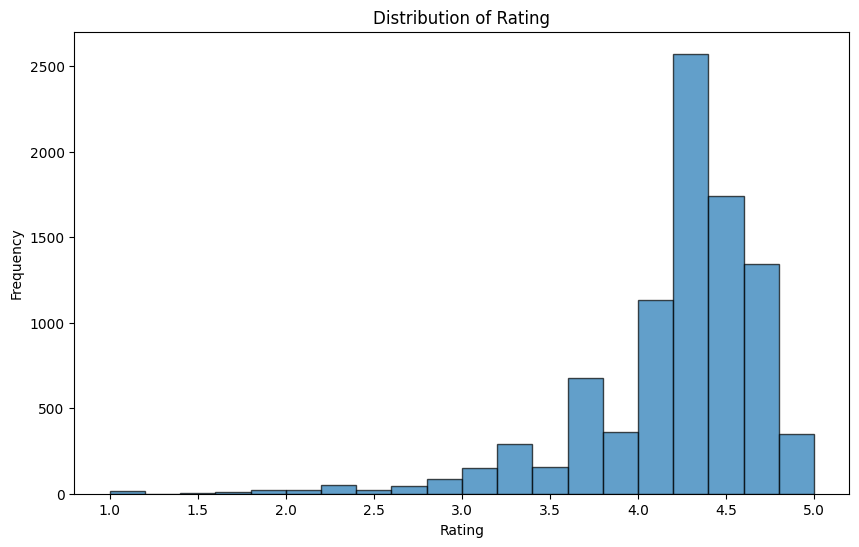


Skewness: -1.8519442121063652
Kurtosis: 6.024387304185963


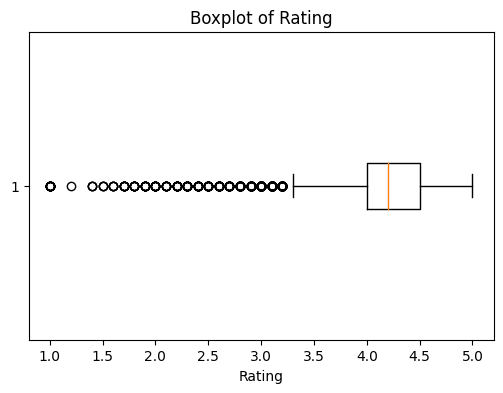

In [93]:
numerical_univariate(df2, 'Rating')

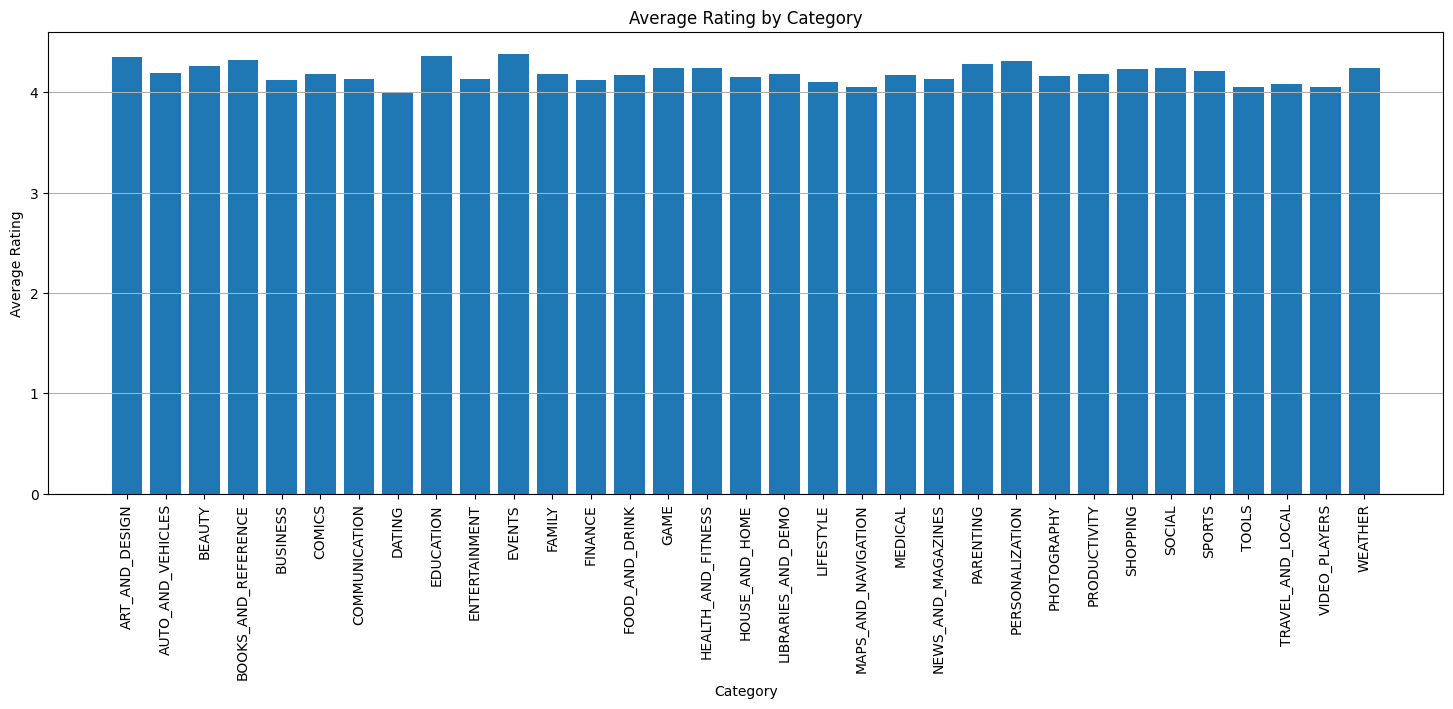

In [94]:
average_ratings = df2.groupby('Category')['Rating'].mean()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(average_ratings.index, average_ratings.values)

# Set the title and axis labels
ax.set_title("Average Rating by Category")
ax.set_xlabel("Category")
ax.set_ylabel("Average Rating")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

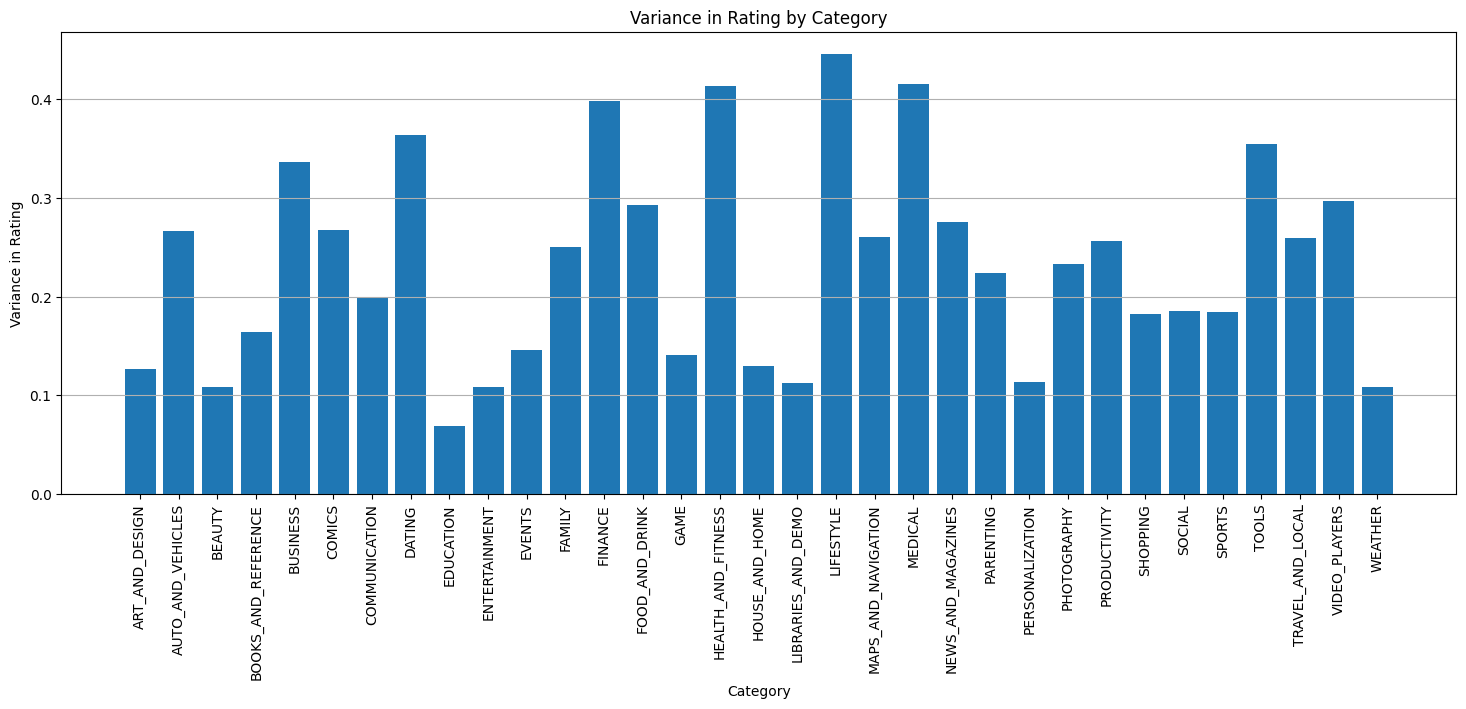

In [95]:
rating_var_by_category = df2.groupby('Category')['Rating'].var()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(rating_var_by_category.index, rating_var_by_category.values)

# Set the title and axis labels
ax.set_title("Variance in Rating by Category")
ax.set_xlabel("Category")
ax.set_ylabel("Variance in Rating")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot

plt.grid(axis='y')
plt.show()

In [96]:
category_stats = df2.groupby('Category').agg({'Rating': ['mean', 'var'], 'Reviews': 'sum', 'Installs': 'sum'})

# Calculate the ratio of sum of reviews to sum of installs
category_stats['Reviews_to_Installs'] = category_stats['Reviews'] / category_stats['Installs']

# Rename columns for clarity
category_stats.columns = ['Average_Rating', 'Variance_Rating', 'Sum_Reviews', 'Sum_Installs', 'Reviews_to_Installs']

# Reset index to make 'Category' a regular column
category_stats.reset_index(inplace=True)

# Display the resulting DataFrame
category_stats.drop(['Sum_Reviews', 'Sum_Installs'], axis=1).sort_values(by='Reviews_to_Installs')

Category  Average_Rating  Variance_Rating  Reviews_to_Installs
30     TRAVEL_AND_LOCAL        4.080976         0.259489             0.009265
25         PRODUCTIVITY        4.185075         0.256423             0.009596
21   NEWS_AND_MAGAZINES        4.132773         0.275715             0.009763
3   BOOKS_AND_REFERENCE        4.322500         0.164466             0.010037
10               EVENTS        4.382759         0.145662             0.010081
0        ART_AND_DESIGN        4.352381         0.127051             0.012412
4              BUSINESS        4.121930         0.336380             0.014186
2                BEAUTY        4.264706         0.108729             0.014570
9         ENTERTAINMENT        4.135294         0.107851             0.016447
17   LIBRARIES_AND_DEMO        4.177778         0.112500             0.017123
31        VIDEO_PLAYERS        4.055346         0.297297             0.017185
15   HEALTH_AND_FITNESS        4.239773         0.413431             0.018672
16       HOUSE_AND_HOME        4.155072         0.129569             0.019852
1     AUTO_AND_VEHICLES        4.191358         0.266049             0.021902
24          PHOTOGRAPHY        4.159420         0.232893             0.022660
18            LIFESTYLE        4.102388         0.445982             0.023466
7                DATING        3.997368         0.363834             0.025713
6         COMMUNICATION        4.129720         0.198447             0.025893
12              FINANCE        4.122727         0.398053             0.027808
29                TOOLS        4.052874         0.354720             0.028663
13       FOOD_AND_DRINK        4.174757         0.293082             0.029863
22            PARENTING        4.283333         0.224124             0.030403
20              MEDICAL        4.168373         0.414918             0.030977
26             SHOPPING        4.227551         0.182006             0.031815
28               SPORTS        4.213907         0.184191             0.032239
11               FAMILY        4.181420         0.250234             0.032483
32              WEATHER        4.240789         0.108047             0.034049
23      PERSONALIZATION        4.314535         0.113607             0.034941
19  MAPS_AND_NAVIGATION        4.048031         0.259976             0.035227
8             EDUCATION        4.363025         0.069130             0.037864
27               SOCIAL        4.238938         0.185322             0.041533
14                 GAME        4.242418         0.140343             0.044838
5                COMICS        4.182143         0.266948             0.052068

In [97]:
# Average Rating, Average Variance, Average R:I for top 5(by R:I)
round((4.05 + 4.36 + 4.24 + 4.24 + 4.18)/5, 2), round((0.259976 + 0.069130	+ 0.185322 + 0.140343	+ 0.266948)/5, 2), round((0.052068 + 0.044838 + 0.041533 + 0.037864 +0.035227)/5, 4)

(4.21, 0.18, 0.0423)

In [98]:
# Average Rating, Average Variance, Average R:I for bottom 5(by R:I)
round((4.08 + 4.18 + 4.13 + 4.32 + 4.38)/5, 2), round((0.259489 + 0.256423 + 0.275715 + 0.164466 + 0.145662)/5, 2), round((0.009265 + 0.009596 + 0.009763 + 0.010037 + 0.010081)/5, 4)

(4.22, 0.22, 0.0097)

In [99]:
# Creating function to get top 5 and bottom 5 of a column by variance of values in another column
def top_n_bottom_5_by_var_feature(data, groupby_column_name, column_name):
  '''
  Takes in a 'data', a 'groupby_column_name' to groupby, and a 'column_name' to sort values
  according to corresponding variance.
  Args:
    data: Pandas DataFrame containing the data.
    groupby_column_name: String name of the column to groupby the data.
    column_name: String name of the column to sort the values according to its value.
  '''
  # Get value counts
  grouped_n_sorted_df = data.groupby(groupby_column_name)[column_name].var().sort_values(ascending=False)

  # Create subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

  #Top 5
  top_5 = grouped_n_sorted_df.head(5)
  wedges, texts, autotexts = ax1.pie(top_5, labels= list(top_5.items()), autopct="%1.1f%%", wedgeprops=dict(width=0.3))
  ax1.set_title(f"Top 5 {groupby_column_name} by variance in {column_name}")

  #Bottom 5
  bottom_5 = grouped_n_sorted_df.tail(5)
  wedges, texts, autotexts = ax2.pie(bottom_5, labels= list(bottom_5.items()), autopct="%1.1f%%", wedgeprops=dict(width=0.3))
  ax2.set_title(f"Bottom 5 {groupby_column_name} by variance in {column_name}")

  # Show the plot
  plt.show()

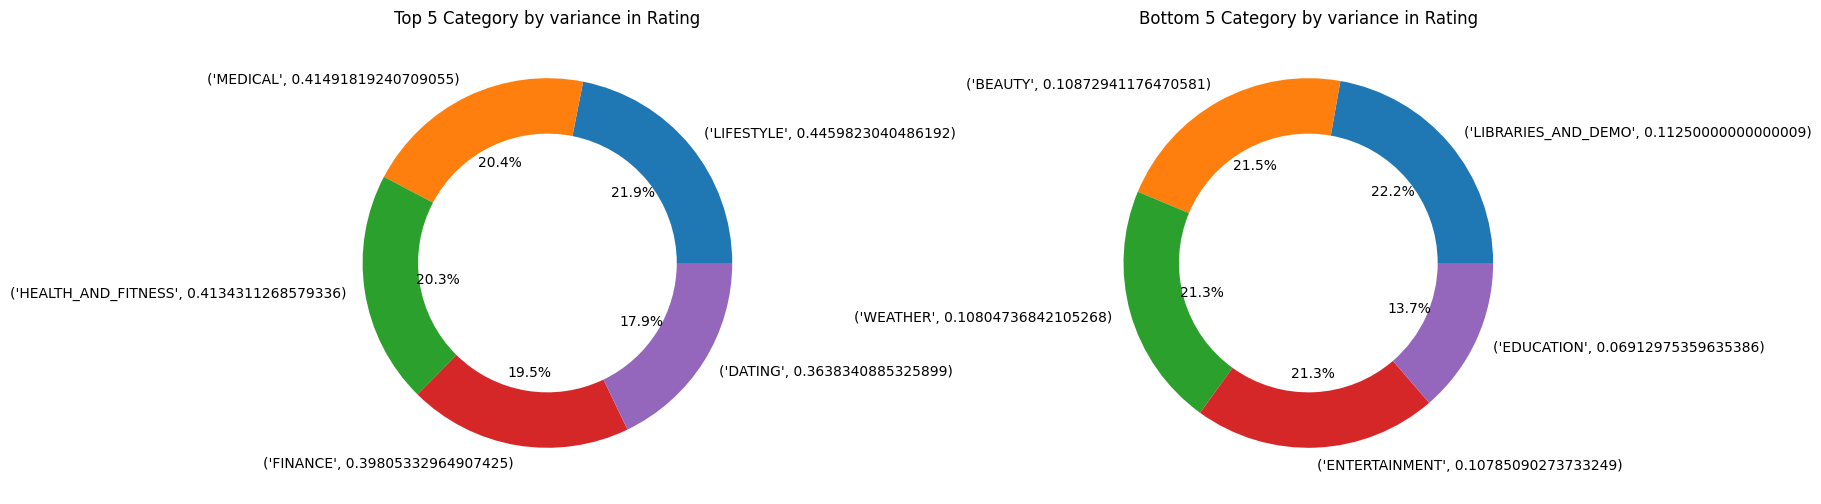

In [100]:
top_n_bottom_5_by_var_feature(df2, 'Category', 'Rating')

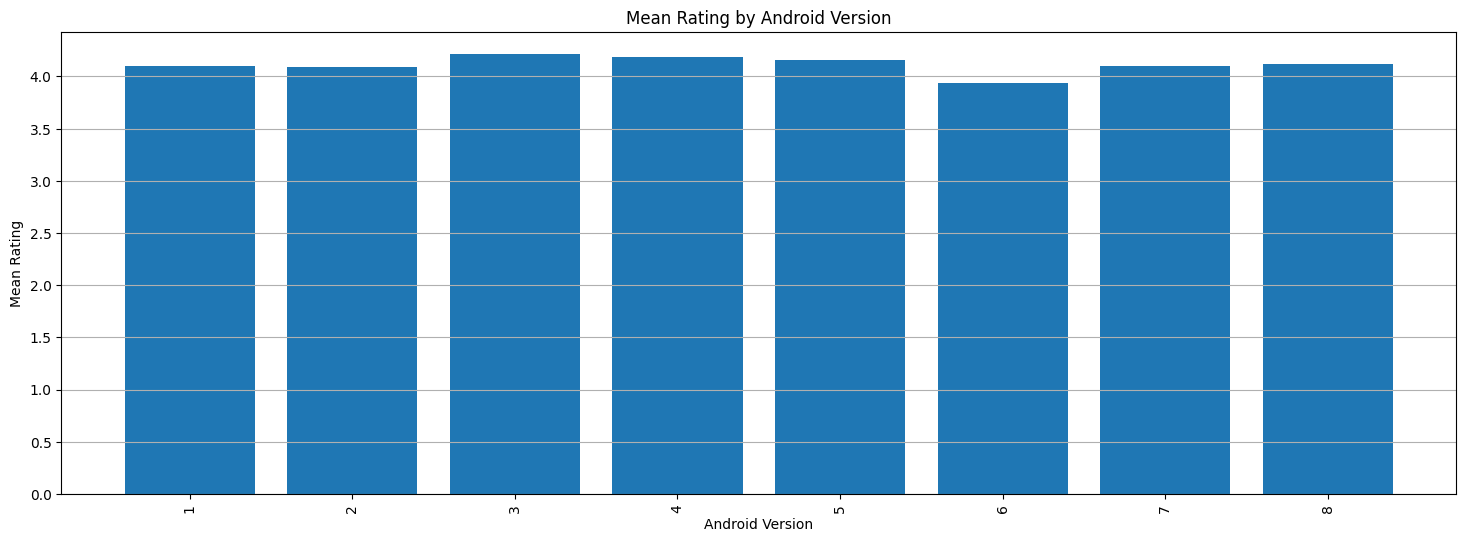

In [101]:
mean_rating_by_version = df2.groupby('Android Ver')['Rating'].mean()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(mean_rating_by_version.index, mean_rating_by_version.values)

# Set the title and axis labels
ax.set_title("Mean Rating by Android Version")
ax.set_xlabel("Android Version")
ax.set_ylabel("Mean Rating")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot

plt.grid(axis='y')
plt.show()

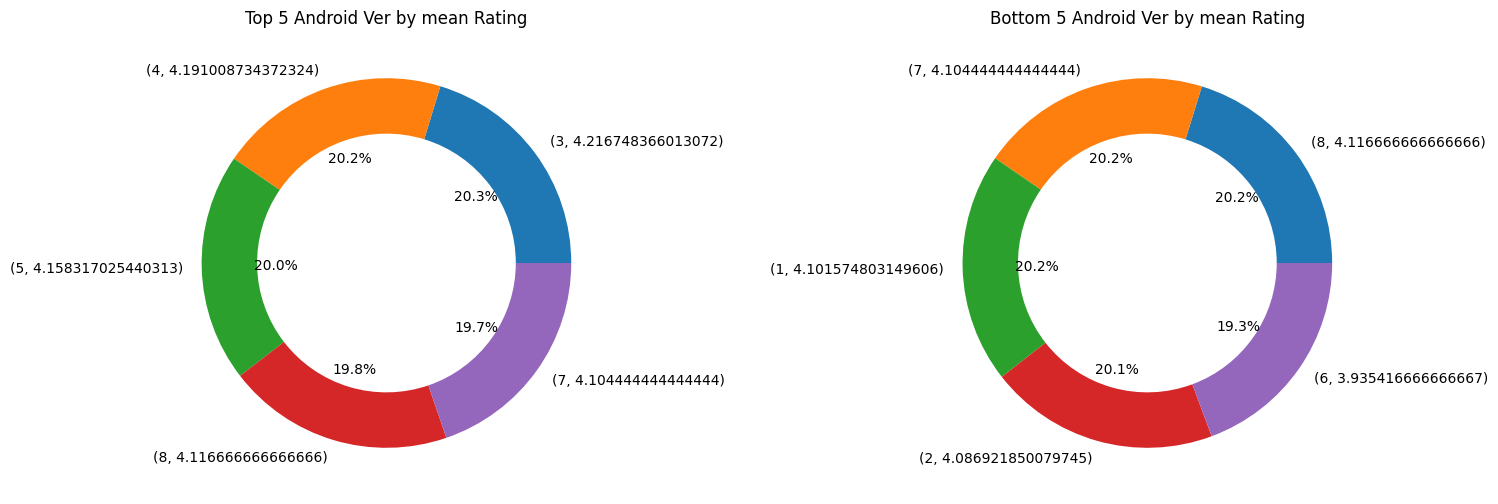

In [102]:
top_n_bottom_5_by_mean_feature(df2, 'Android Ver', 'Rating')

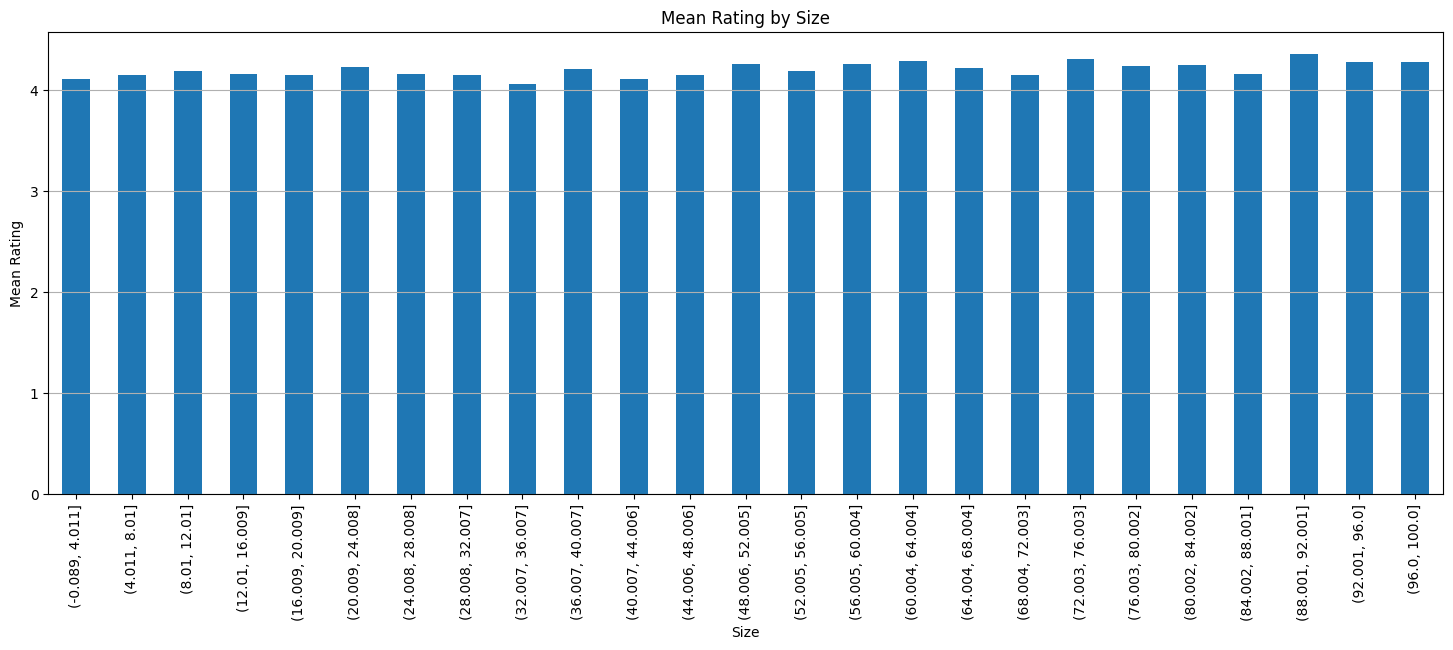

In [103]:
total_reviews = df2.groupby(pd.cut(df2['Size'], bins=25))['Rating'].mean()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
total_reviews.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title("Mean Rating by Size")
ax.set_xlabel("Size")
ax.set_ylabel("Mean Rating")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

In [104]:
df2.groupby(pd.cut(df2['Size'], bins=25))['Rating'].mean().sort_values()

Size
(32.007, 36.007]    4.064103
(40.007, 44.006]    4.112353
(-0.089, 4.011]     4.115667
(28.008, 32.007]    4.156180
(16.009, 20.009]    4.156965
(68.004, 72.003]    4.157353
(4.011, 8.01]       4.157663
(44.006, 48.006]    4.158084
(24.008, 28.008]    4.162195
(12.01, 16.009]     4.163967
(84.002, 88.001]    4.165909
(52.005, 56.005]    4.188182
(8.01, 12.01]       4.188306
(36.007, 40.007]    4.217352
(64.004, 68.004]    4.226316
(20.009, 24.008]    4.236161
(76.003, 80.002]    4.239623
(80.002, 84.002]    4.253061
(48.006, 52.005]    4.263281
(56.005, 60.004]    4.265741
(92.001, 96.0]      4.277273
(96.0, 100.0]       4.285075
(60.004, 64.004]    4.290722
(72.003, 76.003]    4.313043
(88.001, 92.001]    4.360465
Name: Rating, dtype: float64

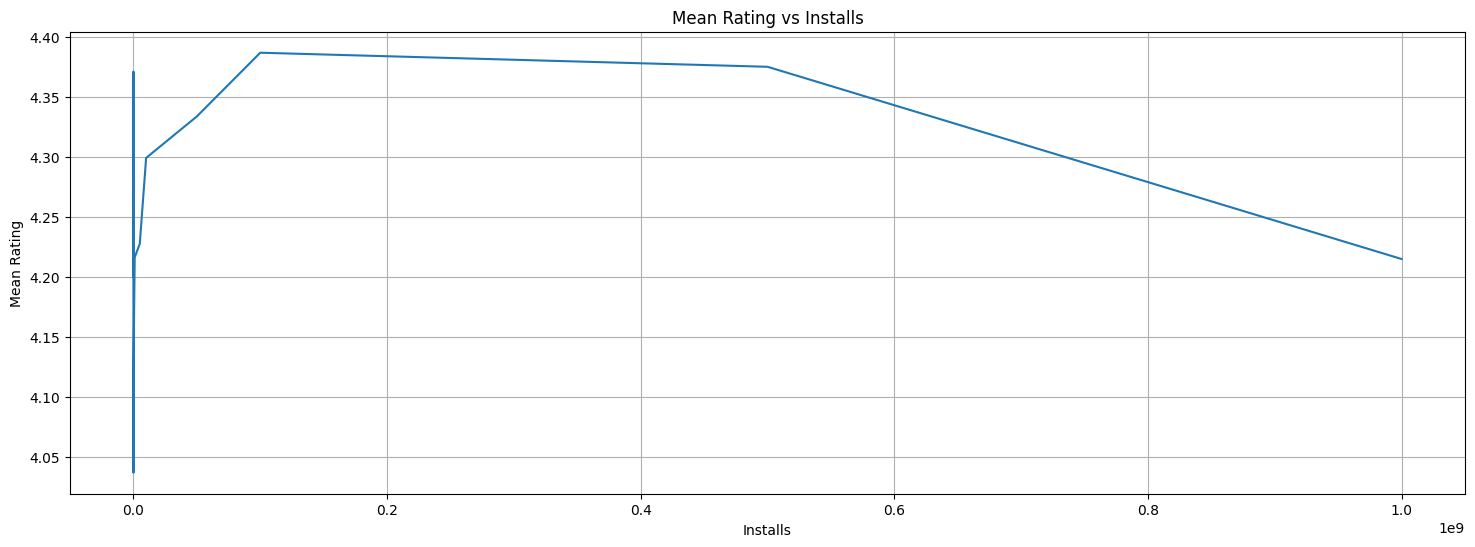

In [105]:
mean_rating_by_installs = df2.groupby('Installs')['Rating'].mean()

# Create a line plot
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(mean_rating_by_installs.index, mean_rating_by_installs.values)

# Set the title and axis labels
ax.set_title("Mean Rating vs Installs")
ax.set_xlabel("Installs")
ax.set_ylabel("Mean Rating")

plt.grid(True)

# Show the plot
plt.show()

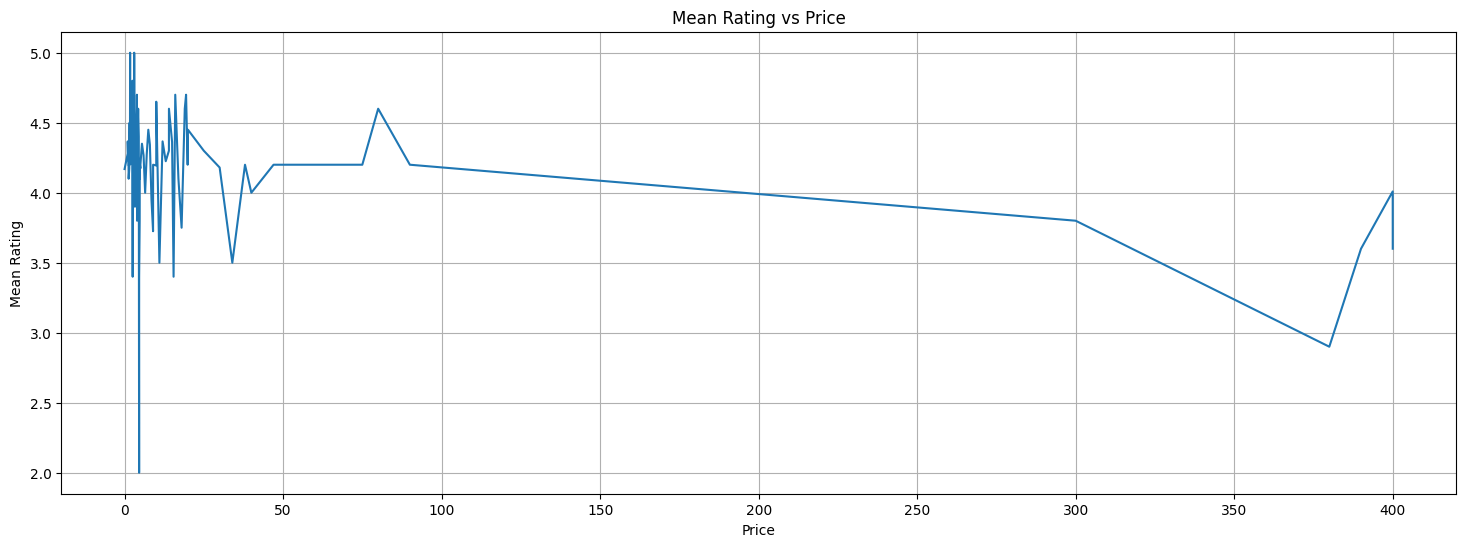

In [106]:
mean_rating_by_price = df2.groupby('Price')['Rating'].mean()

# Create a line plot
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(mean_rating_by_price.index, mean_rating_by_price.values)

# Set the title and axis labels
ax.set_title("Mean Rating vs Price")
ax.set_xlabel("Price")
ax.set_ylabel("Mean Rating")

plt.grid(True)

# Show the plot
plt.show()

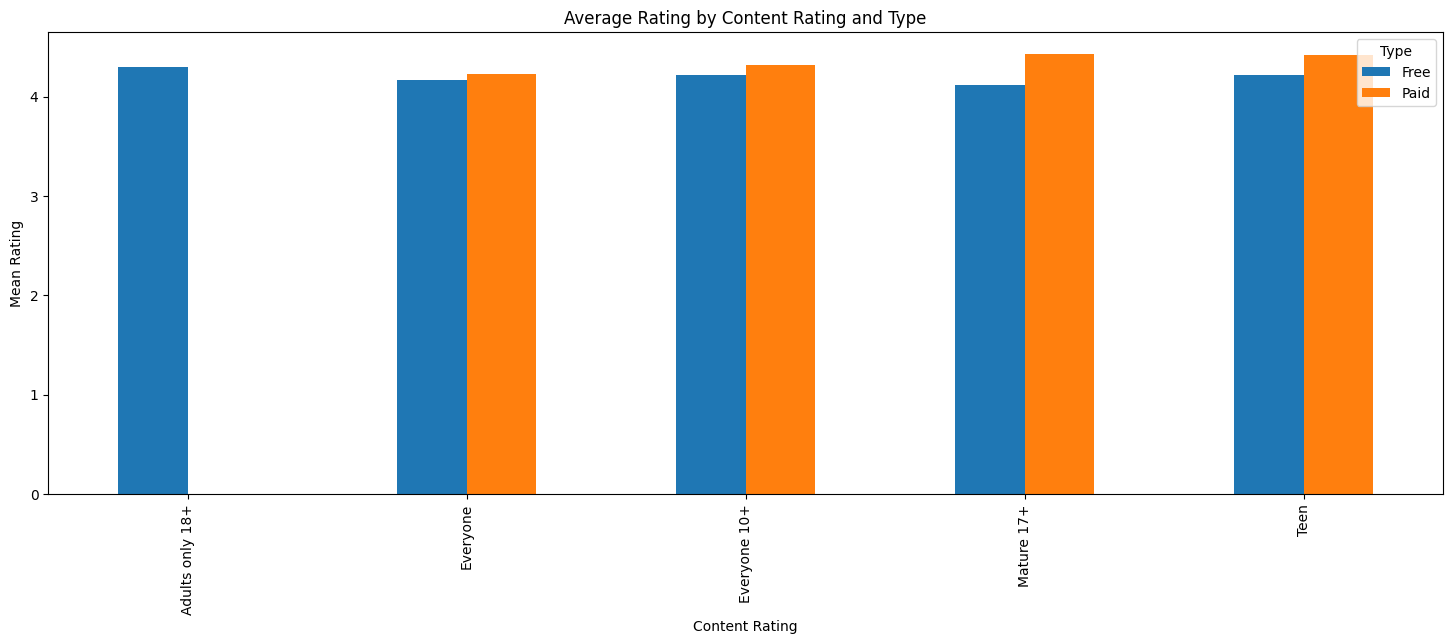

In [107]:
grouped_data = df2.groupby(['Content Rating', 'Type'])['Rating'].mean().unstack()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
grouped_data.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title('Average Rating by Content Rating and Type')
ax.set_xlabel('Content Rating')
ax.set_ylabel('Mean Rating')

# Add a legend to the plot
ax.legend(title='Type')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To study the distribution of Ratings across various other features.

##### 2. What is/are the insight(s) found from the chart?

The Min, Q1, Q2, Q3 and Max values for 'Rating's are:\
1.0, 4.0, 4.2, 4.5 and 5.0

The mean 'Rating' is: 4.17

---

Top 5 'Category's by variance in Rating:\
Lifestyle, Medical, Health & Fitness, Finance and Dating

Bottom 5 'Category's by variance in Rating:\
Libraries & Demo, Beauty, Weather, Entertainment, Education

---

Top 3 'Android Ver'sion by mean Rating are:\
3,4,5

Bottom 3 'Android Ver'sion by mean Rating are:\
1,2,6

---

Top 5 'Size' ranges by mean Rating are:
(88MB - 92MB), (72MB - 76MB), (60MB - 64MB), (96MB - 100MB) and (92MB - 96MB)

Bottom 5 'Size' ranges by mean Rating are:
(16MB - 20MB), (28MB - 32MB), (1MB - 4MB), (40MB - 44MB) and (32MB - 36MB)

---

Mean Ratings are relatively similar across Content Rating with near 4.0 and above ratings.
However, it clear that mean ratings are higher for 'Paid' Type apps across Content Rating.

---

It is clear from data that Rating tend to be more stable when more people give reviews

---

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Though Rating is a dependent variable, some measures can be taken to ensure good Rating.
### 1. Average Ratings have shown to be higher for apps of size range 60MB - 100MB
### 2. Average Ratings have shown to be lower for apps of size range 1MB - 40MB
### 3. Ratings have shown to be higher for 'Paid' apps across all Content Rating

## Exploring column 'Reviews'


Variable: Reviews
count    9.054000e+03
mean     2.310644e+05
std      1.890638e+06
min      1.000000e+00
25%      4.900000e+01
50%      1.617500e+03
75%      3.450900e+04
max      7.815831e+07
Name: Reviews, dtype: float64


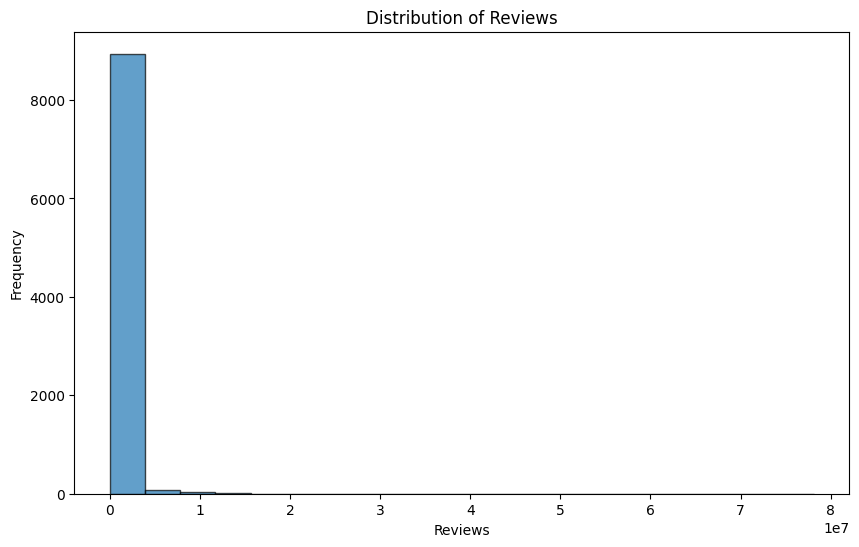


Skewness: 25.74128702814522
Kurtosis: 851.4232597541535


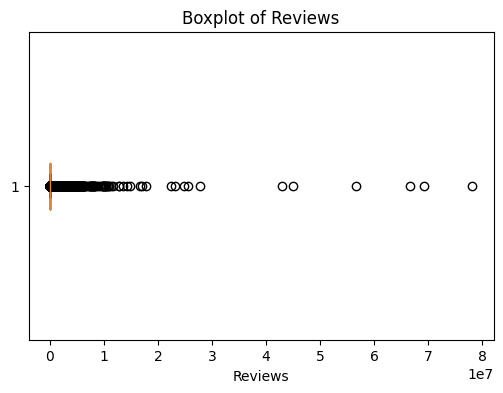

In [108]:
numerical_univariate(df2, 'Reviews')

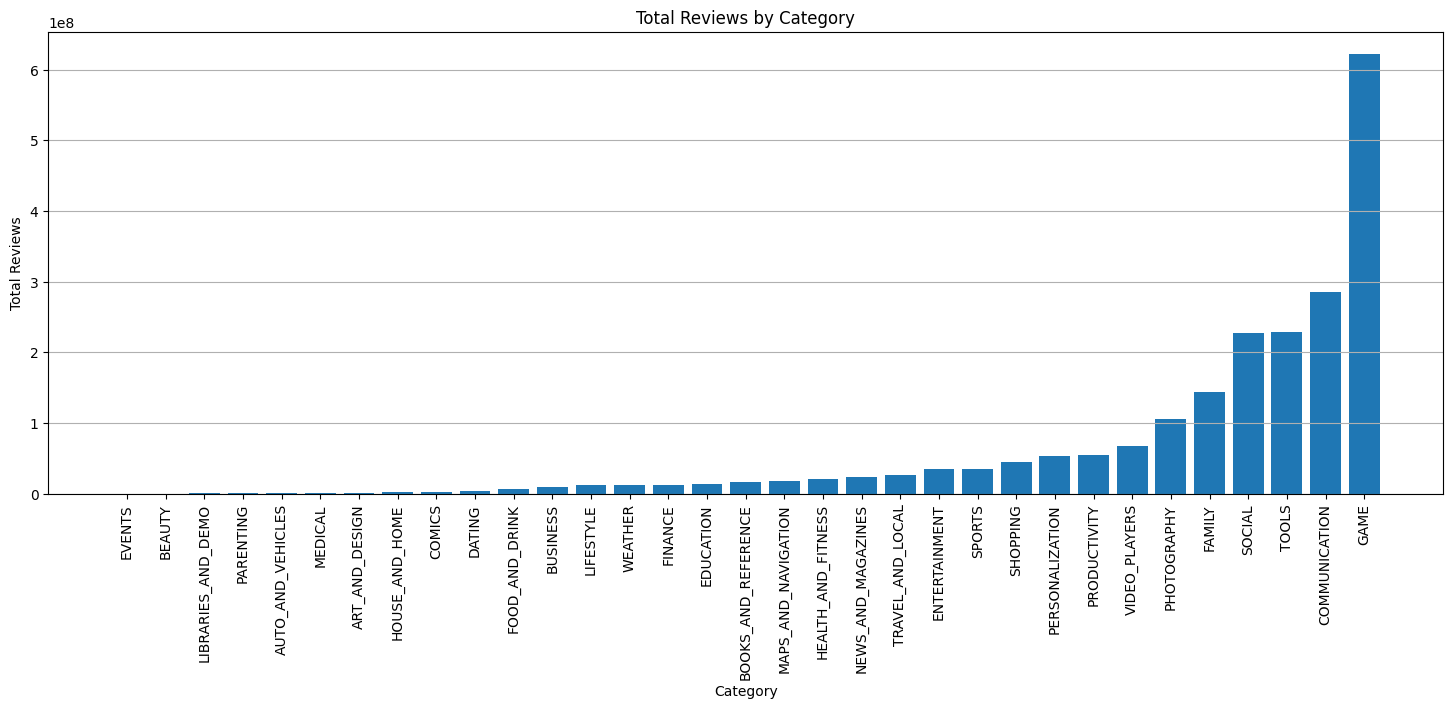

In [109]:
total_reviews = df2.groupby('Category')['Reviews'].sum().sort_values()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(total_reviews.index, total_reviews.values)

# Set the title and axis labels
ax.set_title("Total Reviews by Category")
ax.set_xlabel("Category")
ax.set_ylabel("Total Reviews")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

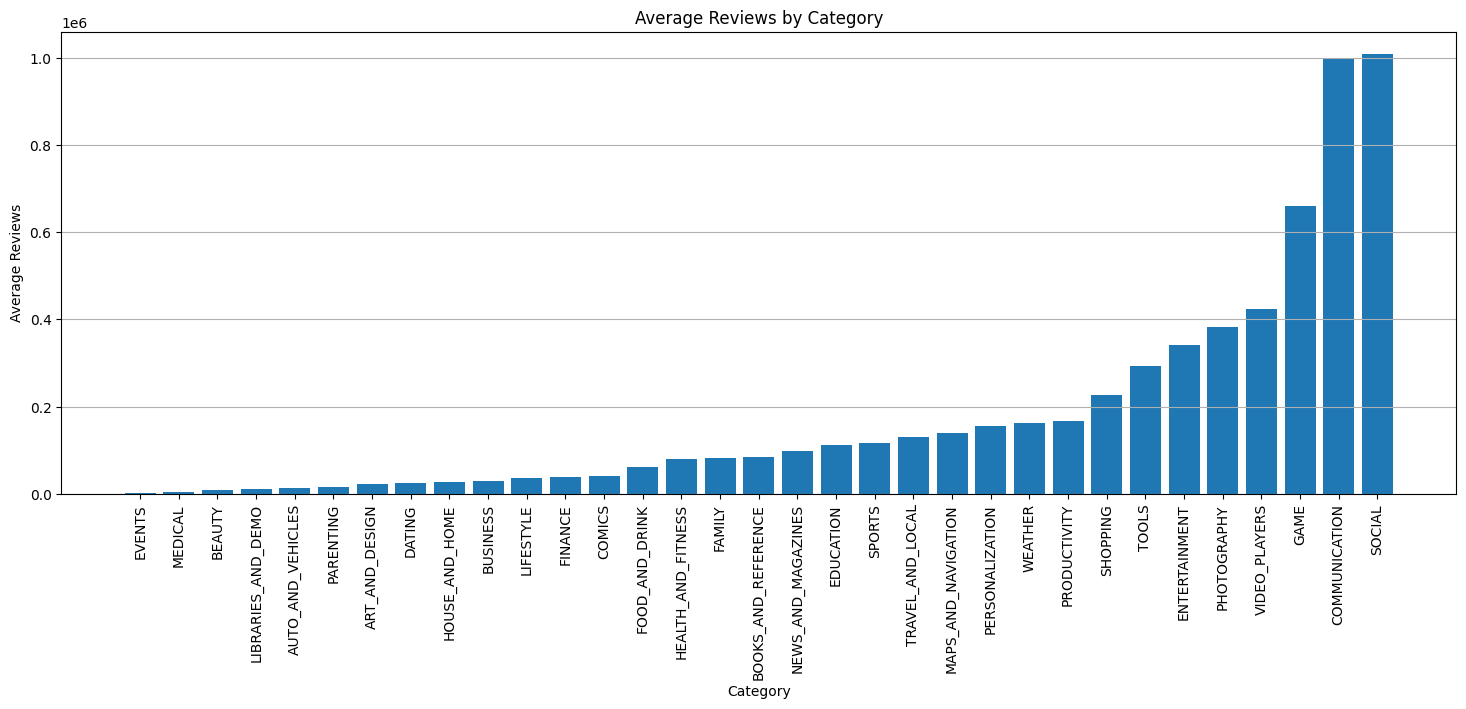

In [110]:
average_reviews = df2.groupby('Category')['Reviews'].mean().sort_values()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(average_reviews.index, average_reviews.values)

# Set the title and axis labels
ax.set_title("Average Reviews by Category")
ax.set_xlabel("Category")
ax.set_ylabel("Average Reviews")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

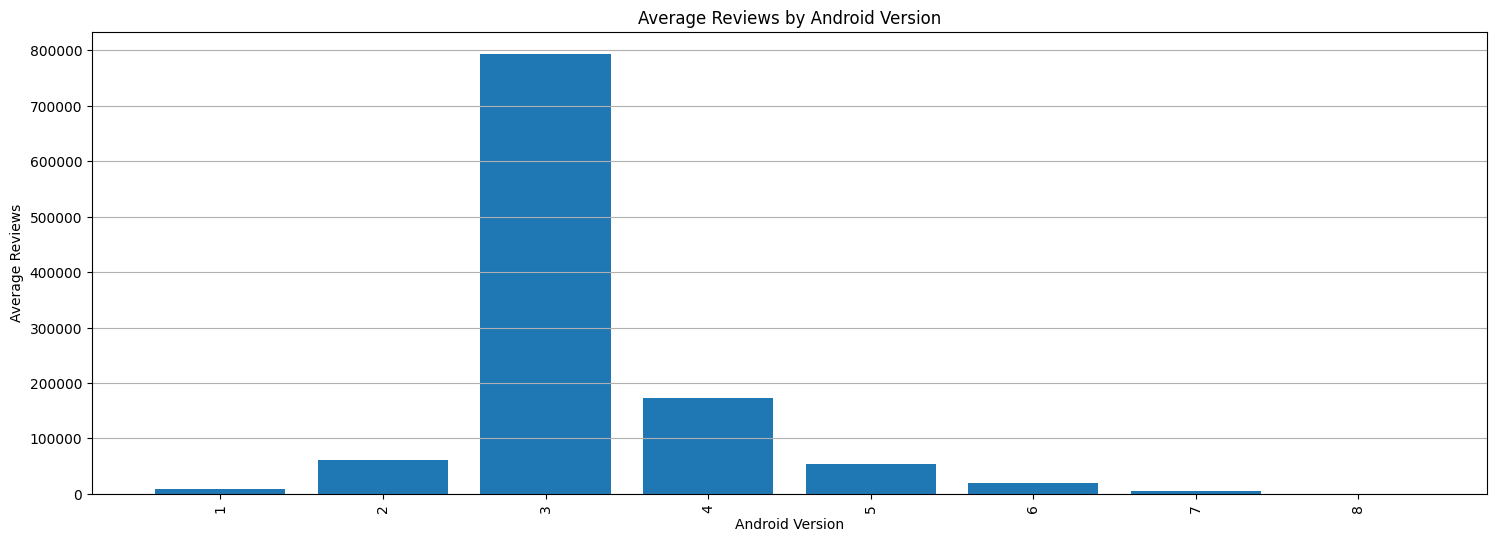

In [111]:
average_reviews = df2.groupby('Android Ver')['Reviews'].mean().sort_values()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(average_reviews.index, average_reviews.values)

# Set the title and axis labels
ax.set_title("Average Reviews by Android Version")
ax.set_xlabel("Android Version")
ax.set_ylabel("Average Reviews")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

In [112]:
df2.groupby('Android Ver')['Reviews'].mean().sort_values()

Android Ver
8       136.166667
7      5033.755556
1      8426.661417
6     20263.916667
5     54101.694716
2     61426.948963
4    173585.479020
3    793746.608660
Name: Reviews, dtype: float64

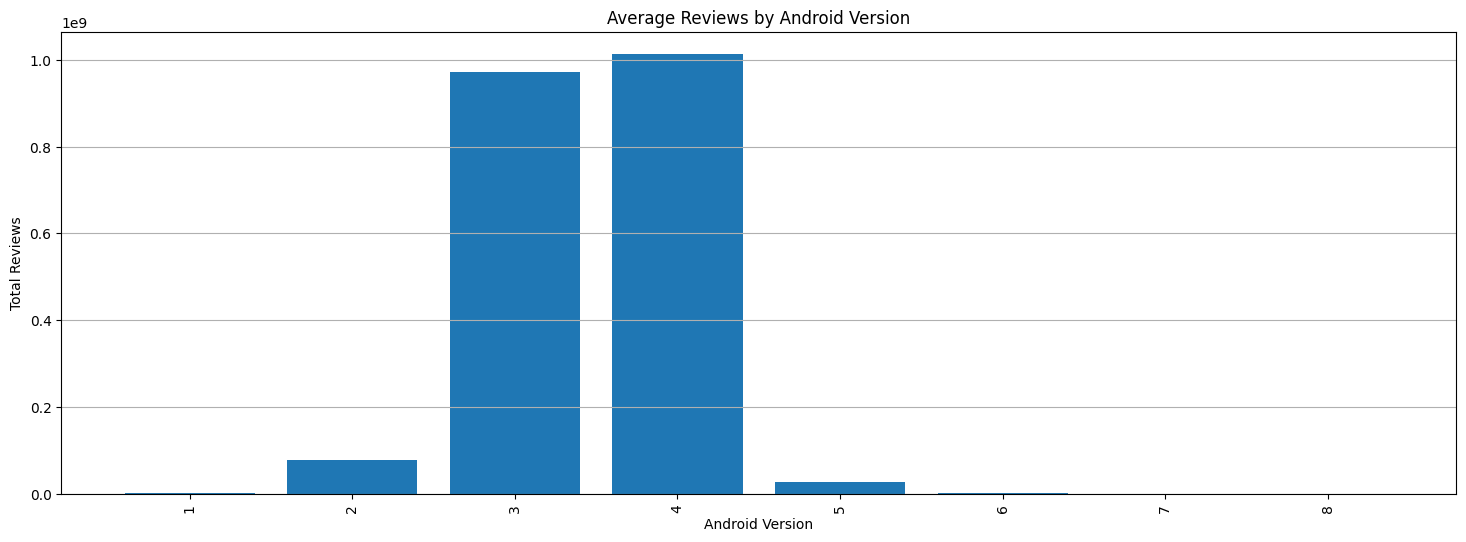

In [113]:
average_reviews = df2.groupby('Android Ver')['Reviews'].sum().sort_values()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(average_reviews.index, average_reviews.values)

# Set the title and axis labels
ax.set_title("Average Reviews by Android Version")
ax.set_xlabel("Android Version")
ax.set_ylabel("Total Reviews")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

In [114]:
df2.groupby('Android Ver')['Reviews'].sum().sort_values()

Android Ver
8           817
7        226519
6        972668
1       1070186
5      27645966
2      77029394
3     971545849
4    1013565612
Name: Reviews, dtype: int64

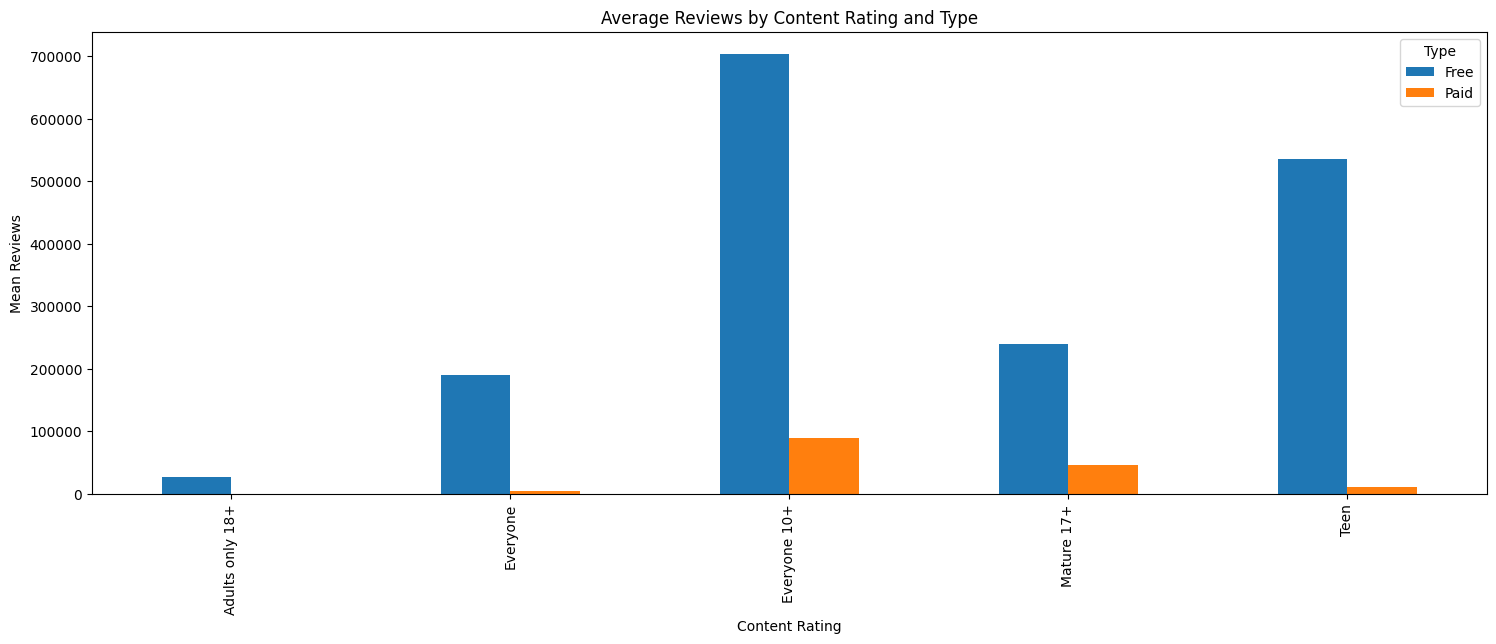

In [115]:
grouped_data = df2.groupby(['Content Rating', 'Type'])['Reviews'].mean().unstack()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
grouped_data.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title('Average Reviews by Content Rating and Type')
ax.set_xlabel('Content Rating')
ax.set_ylabel('Mean Reviews')

# Add a legend to the plot
ax.legend(title='Type')

# Show the plot
plt.show()

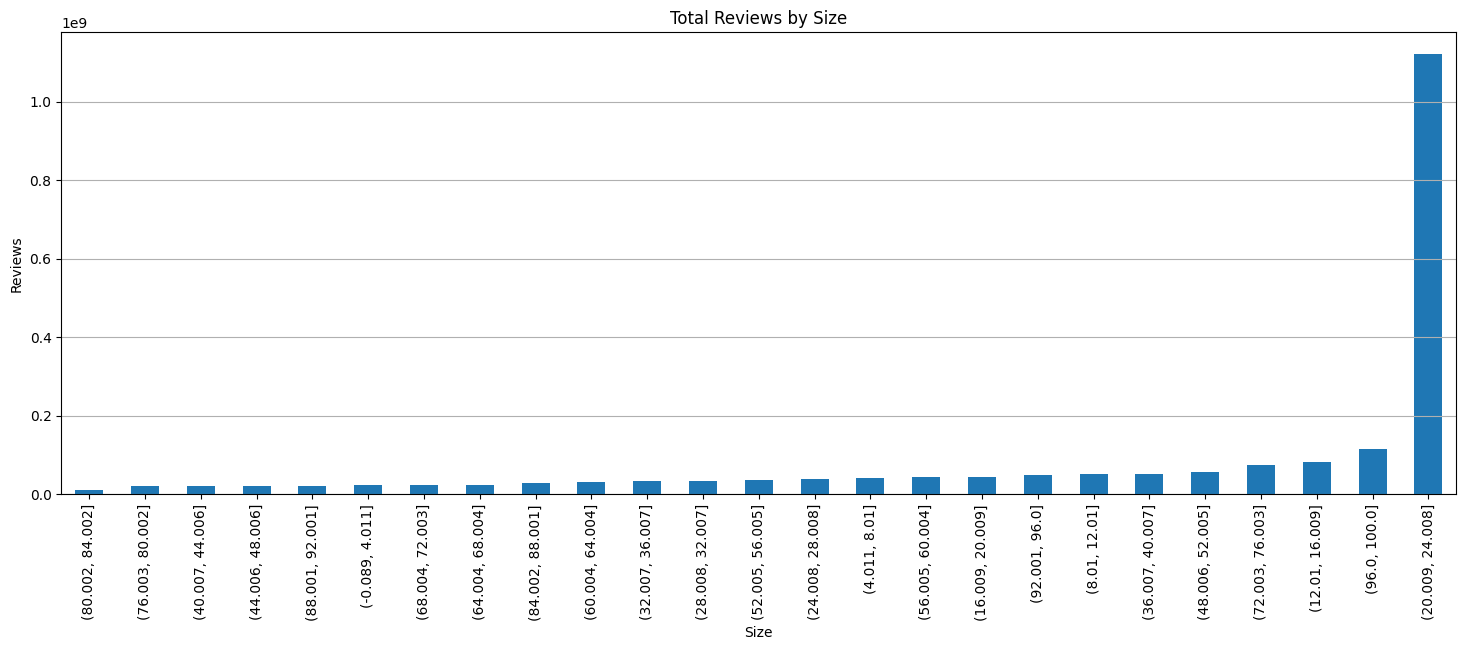

In [116]:
total_reviews = df2.groupby(pd.cut(df2['Size'], bins=25))['Reviews'].sum().sort_values()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
total_reviews.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title("Total Reviews by Size")
ax.set_xlabel("Size")
ax.set_ylabel("Reviews")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

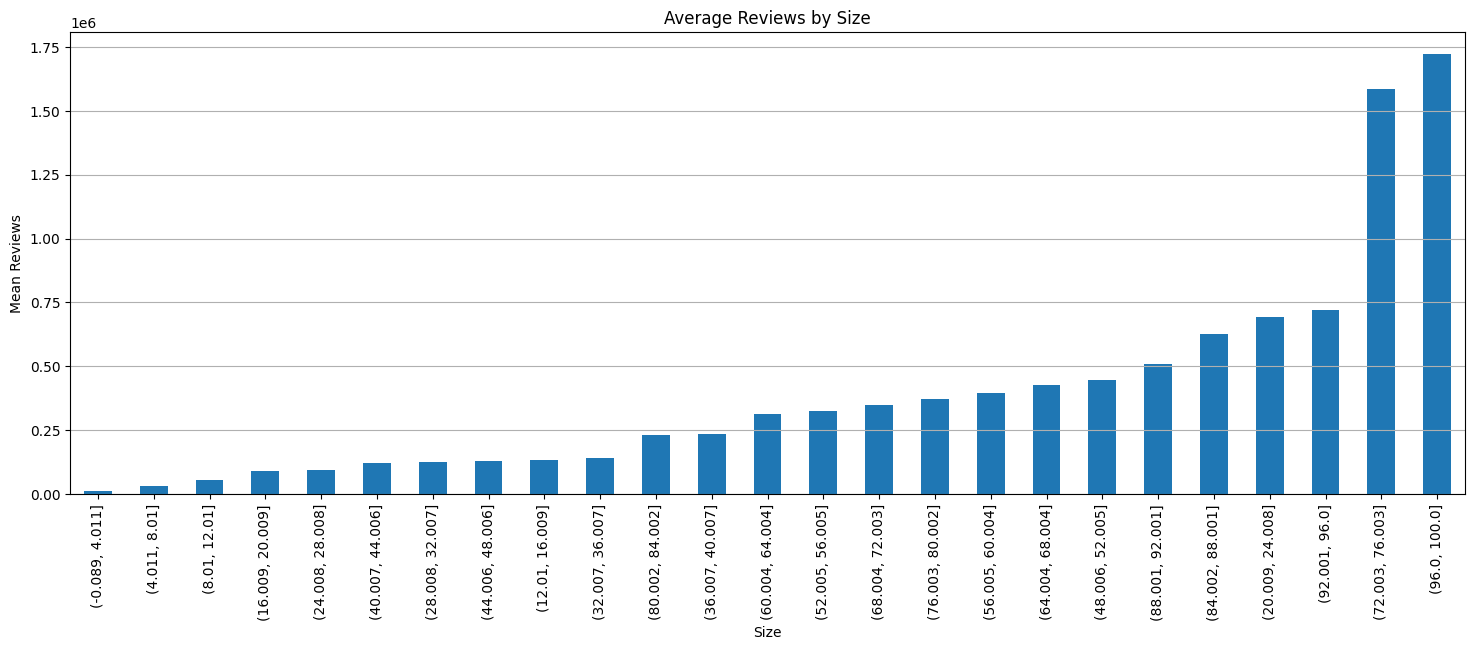

In [117]:
average_reviews = df2.groupby(pd.cut(df2['Size'], bins=25))['Reviews'].mean().sort_values()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
average_reviews.plot(kind='bar', ax=ax)


# Set the title and axis labels
ax.set_title("Average Reviews by Size")
ax.set_xlabel("Size")
ax.set_ylabel("Mean Reviews")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

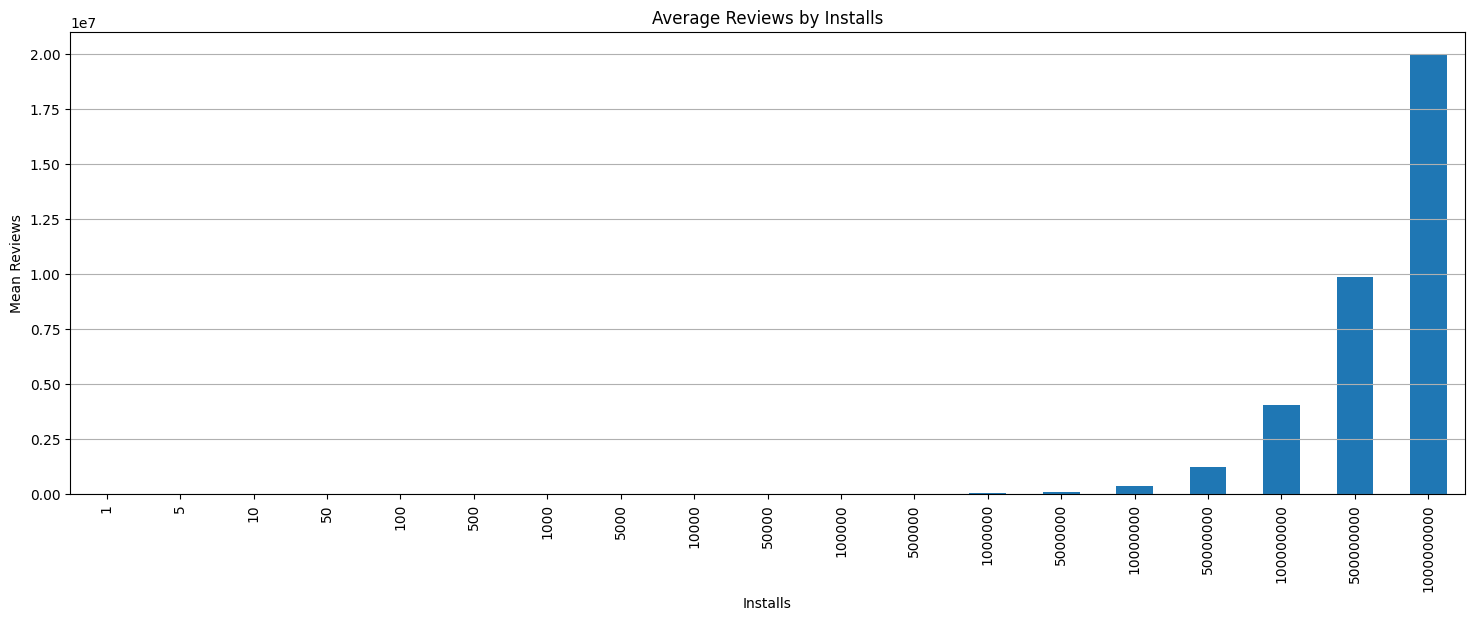

In [118]:
average_reviews = df2.groupby('Installs')['Reviews'].mean()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
average_reviews.plot(kind='bar', ax=ax)


# Set the title and axis labels
ax.set_title("Average Reviews by Installs")
ax.set_xlabel("Installs")
ax.set_ylabel("Mean Reviews")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

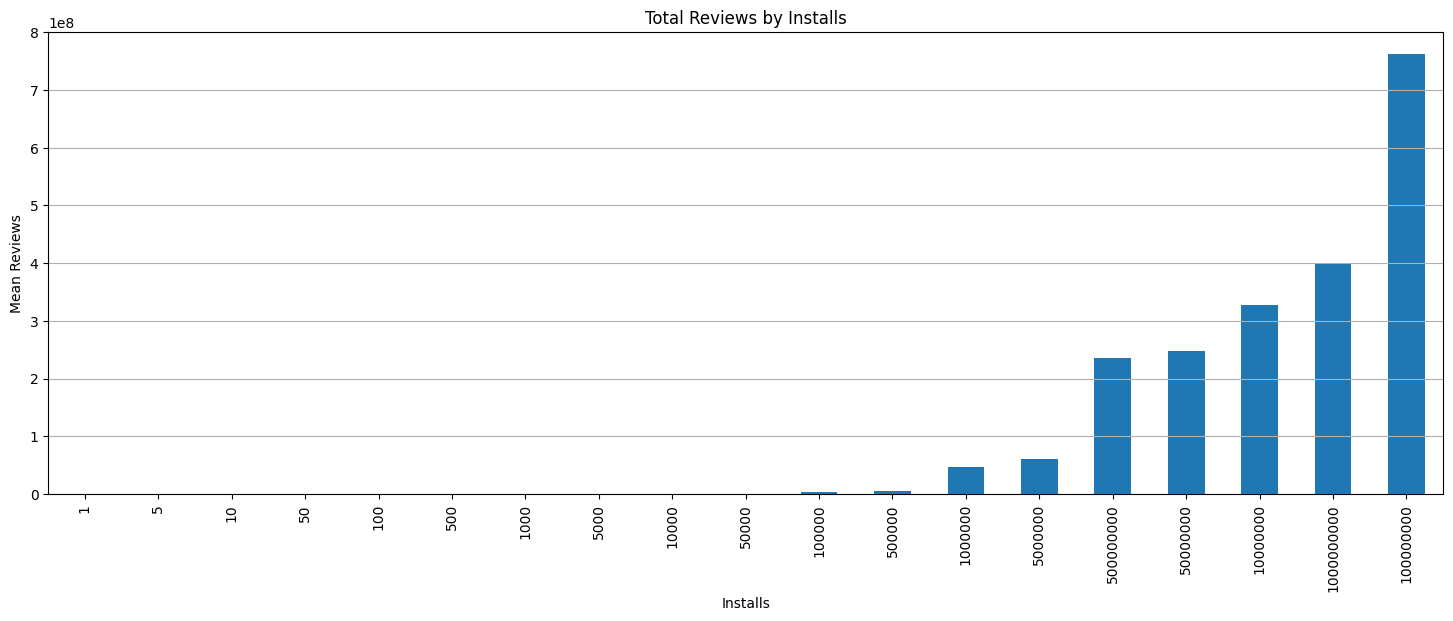

In [119]:
total_reviews = df2.groupby('Installs')['Reviews'].sum().sort_values()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
total_reviews.plot(kind='bar', ax=ax)


# Set the title and axis labels
ax.set_title("Total Reviews by Installs")
ax.set_xlabel("Installs")
ax.set_ylabel("Mean Reviews")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To get an idea of the distribution of Reviews across various parameters.

##### 2. What is/are the insight(s) found from the chart?

The Min, Q1, Q2, Q3 and Max values for 'Reviews' are:\
1, 49, 1617, 34509 and 78158310

The mean 'Reviews' is:\
231064

---

Top 3 'Android Ver' by mean Reviews:\
3,4,2

Bottom 3 'Android Ver' by mean Reviews:\
1,7,8

---

Content Ratings arranged as per mean Reviews are:\
Everyone 10+, Teen, Mature 17+, Everyone, Adults only 18+

---

Top 5 'Size' ranges by mean Reviews:\
(96MB - 100MB), (72MB - 76MB), (92MB - 96MB), (20MB - 24MB) and (84MB - 88MB)

Bottom 5 'Size' ranges by mean Reviews:\
(24MB - 28MB), (16MB - 20MB), (8MB - 12MB), (4MB - 8MB) and (0.1MB - 4MB)

---

Top 5 'Install' numbers by total Reviews:\
1000000000, 500000000, 100000000, 50000000 and 10000000

Top 5 'Install' numbers by mean Reviews:\
100000000, 1000000000, 10000000, 50000000 and 500000000

---

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

###1. A sweet spot for minimum 'Android Ver'sion an app needs to run onn is 4 and anything above 6 is a bad spot.
###2. A sweet spot 'Size' range with context of 'Reviews' is 20MB - 24MB and 75MB - 100MB.
###3. Reviews in context with Content Rating have shown to be highest for apps rated 'Everyone 10+' but second last for apps rated 'Everyone'
###4. Reviews have shown to naturally increase with Installs.

## Exploring column 'Size'


Variable: Size
count    9054.000000
mean       20.786989
std        20.689512
min         0.011000
25%         5.400000
50%        16.000000
75%        26.000000
max       100.000000
Name: Size, dtype: float64


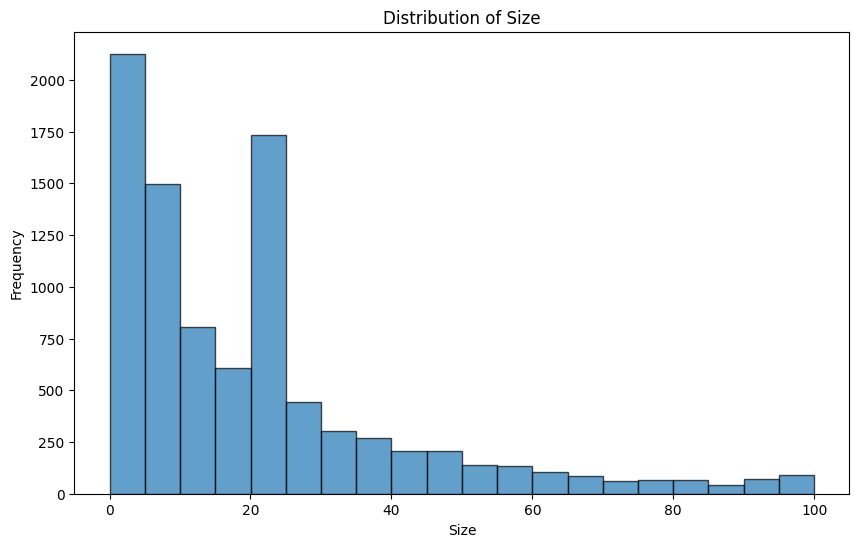


Skewness: 1.7280809455753903
Kurtosis: 2.927745715582988


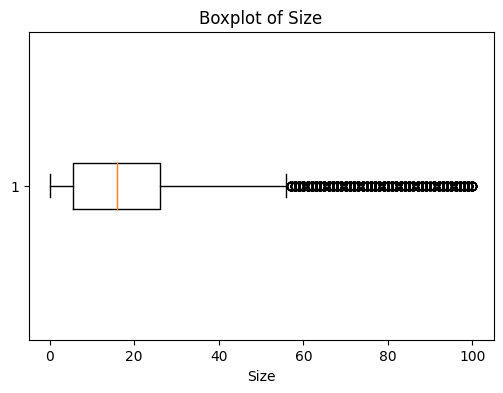

In [120]:
numerical_univariate(df2, 'Size')

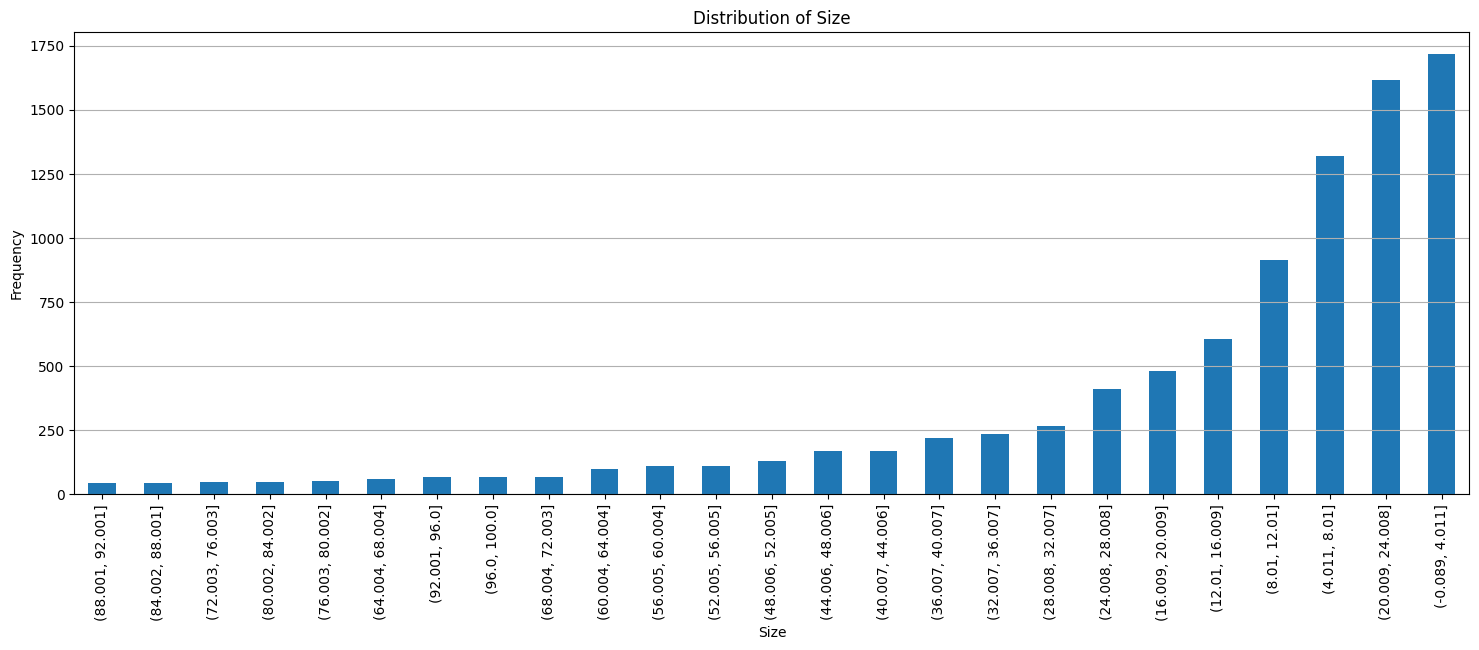

In [121]:
grouped_df = df2.groupby(pd.cut(df2['Size'], bins=25))['Size'].count().sort_values()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
grouped_df.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title("Distribution of Size")
ax.set_xlabel("Size")
ax.set_ylabel("Frequency")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

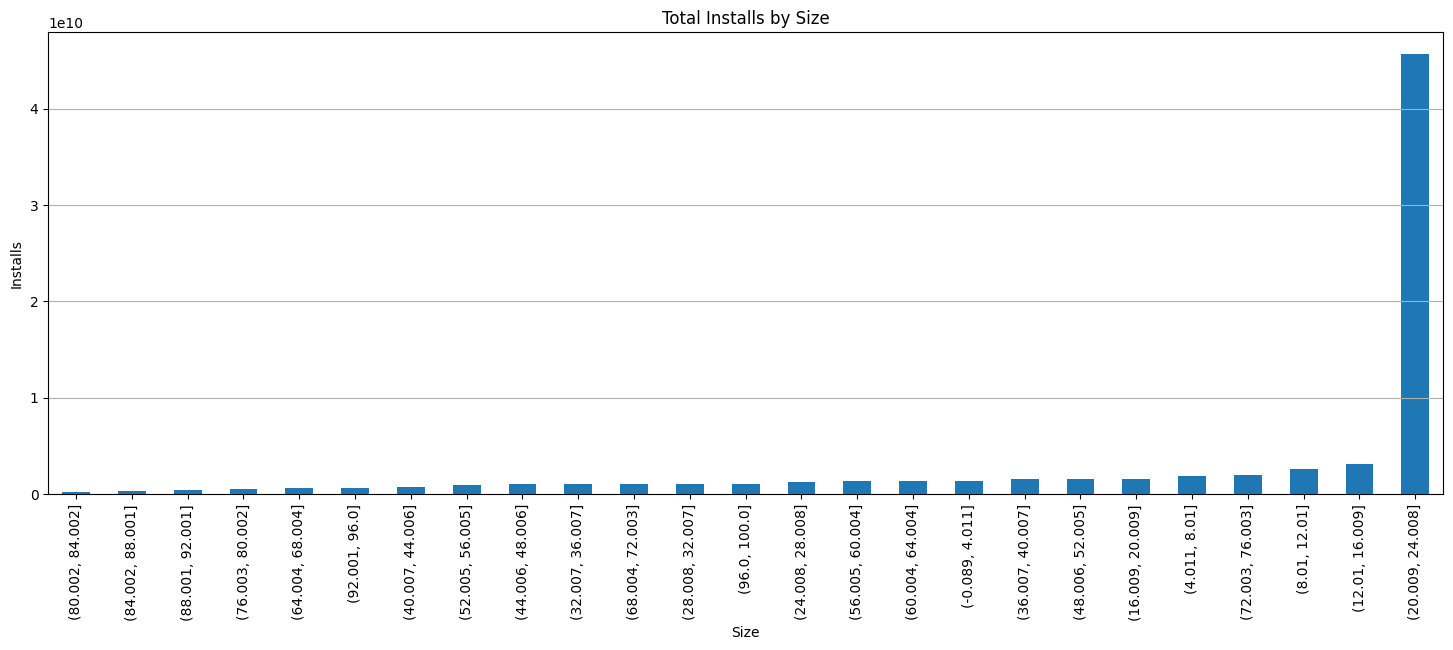

In [122]:
total_installs = df2.groupby(pd.cut(df2['Size'], bins=25))['Installs'].sum().sort_values()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
total_installs.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title("Total Installs by Size")
ax.set_xlabel("Size")
ax.set_ylabel("Installs")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

In [123]:
df2['Size'].mode()[0], df2['Size'].median(), df2['Size'].mean()

(20.39, 16.0, 20.78698862381268)

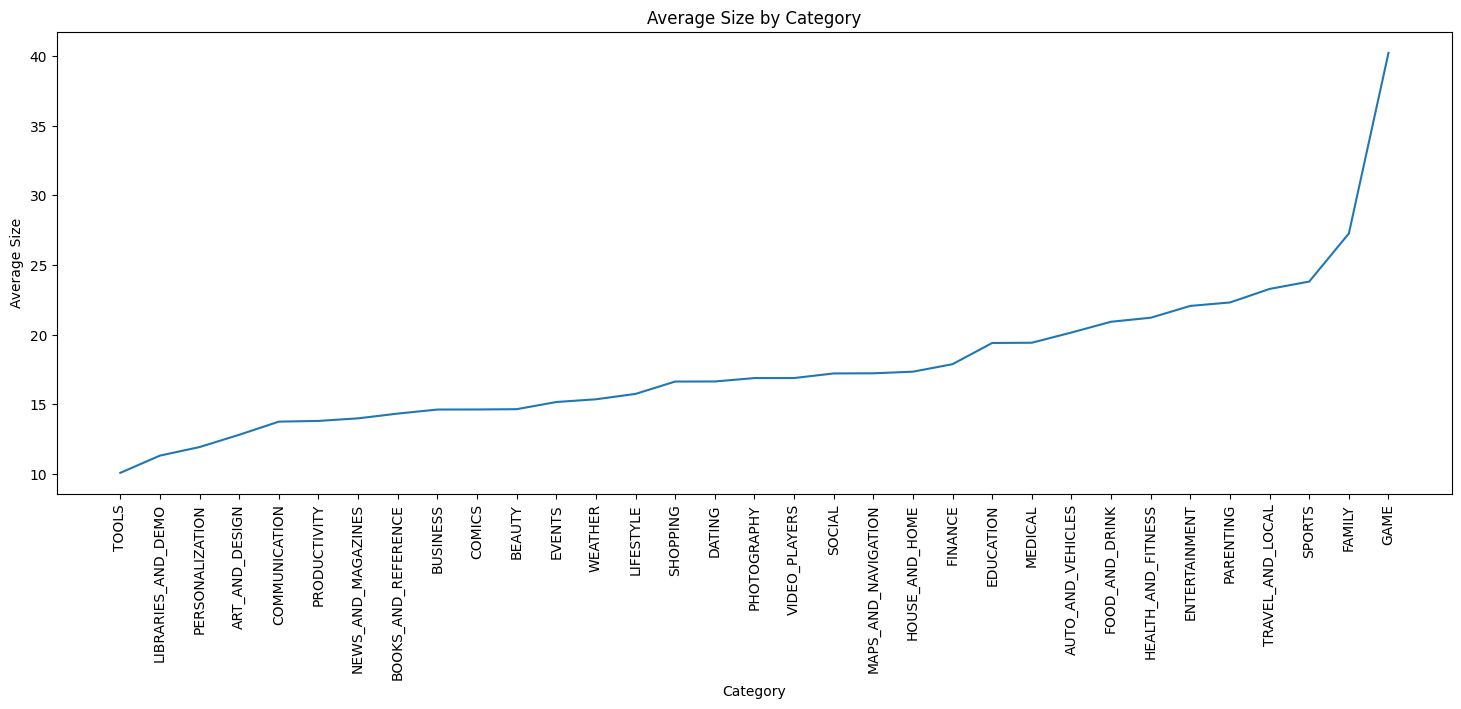

In [124]:
avg_size_by_category = df2.groupby('Category')['Size'].mean().sort_values()

# Create a line plot
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(avg_size_by_category.index, avg_size_by_category.values)

# Set the title and axis labels
ax.set_title("Average Size by Category")
ax.set_xlabel("Category")
ax.set_ylabel("Average Size")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To get an idea of the distribution of the sizes.

##### 2. What is/are the insight(s) found from the chart?

The Min, Q1, Q2, Q3 and Max values for 'Size' are:\
0.01MB, 5.4MB, 16MB, 26MB and 100MB

The mean 'Size' is:\
20.8MB

---

Top 3 'Size' range by count:\
0.1MB - 4MB, 20MB - 24MB, 4MB - 8MB, 8MB - 12MB and 12MB - 16MB

Top 'Size' range by Installs:\
20MB - 24MB, 12MB - 16MB, 8MB - 12MB, 72MB - 76MB and 4MB - 8MB

---

Top 3 'Category' by 'Size':\
Game, Family, Sports, Travel & Local and Parenting

Bottom 3 'Category' by 'Size':\
Communication, Art & Design, Personalization, Libraries & Demo and Tools

---

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### 1. A sweet spot 'Size' range by number of Installs is 20MB - 24MB
### 2. Number of Installs go down by increase in 'Size'.

## Exploring column 'Installs'


Variable: Installs
count    9.054000e+03
mean     8.297156e+06
std      5.548669e+07
min      1.000000e+00
25%      5.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64


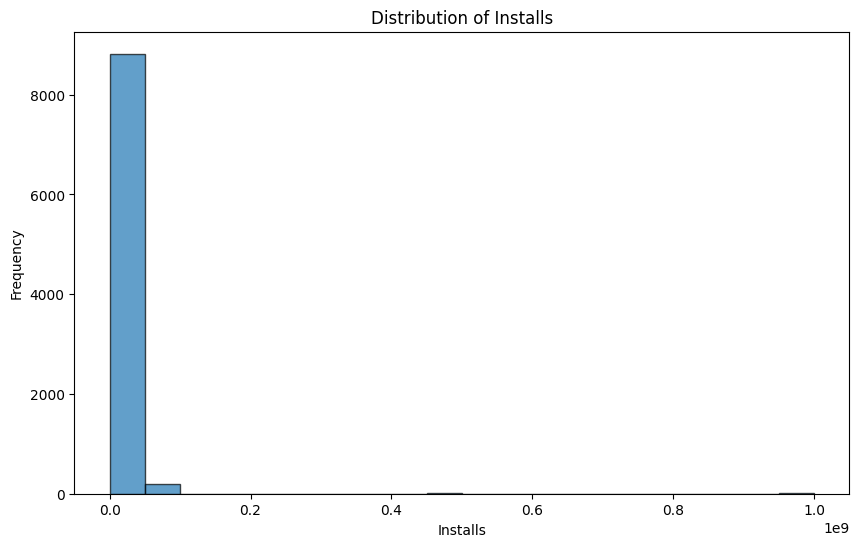


Skewness: 14.561799011906384
Kurtosis: 239.09850791935145


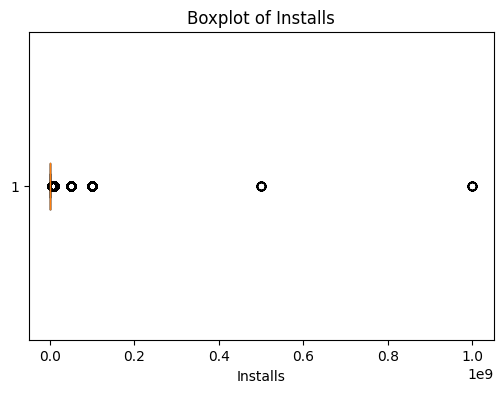

In [125]:
numerical_univariate(df2, 'Installs')

In [126]:
df2['Installs'].mode()[0]

1000000

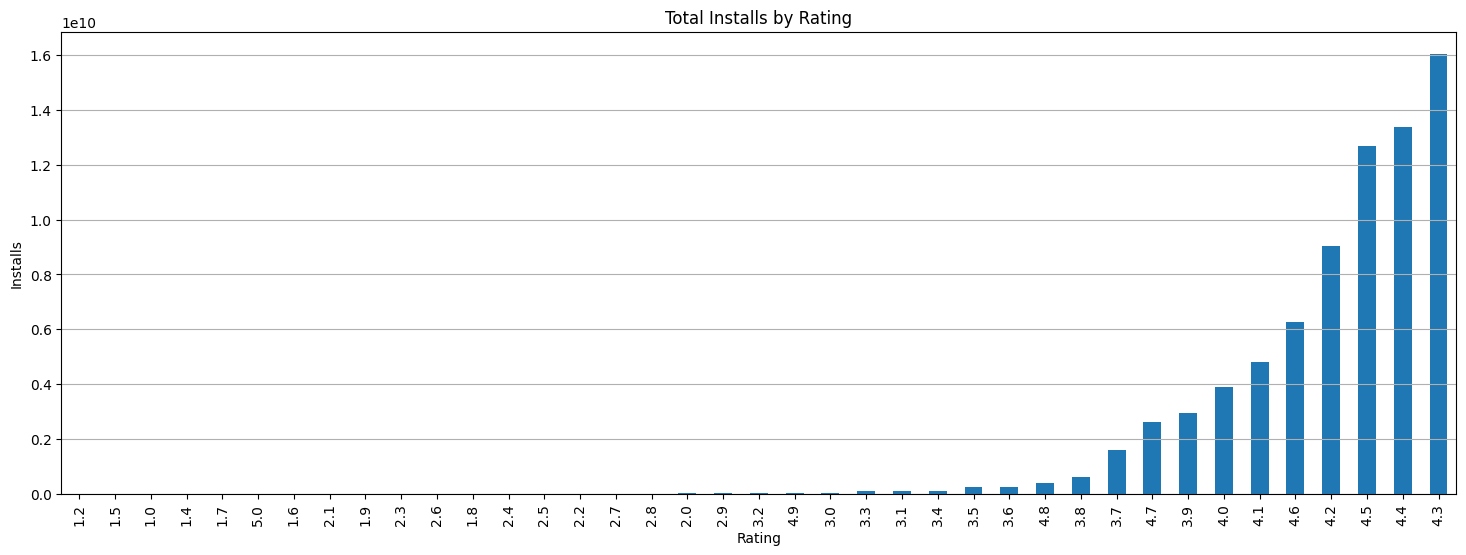

In [127]:
# total_installs = df2.groupby(pd.cut(df2['Rating'], bins=5))['Installs'].sum().sort_values()
total_installs = df2.groupby('Rating')['Installs'].sum().sort_values()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
total_installs.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title("Total Installs by Rating")
ax.set_xlabel("Rating")
ax.set_ylabel("Installs")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

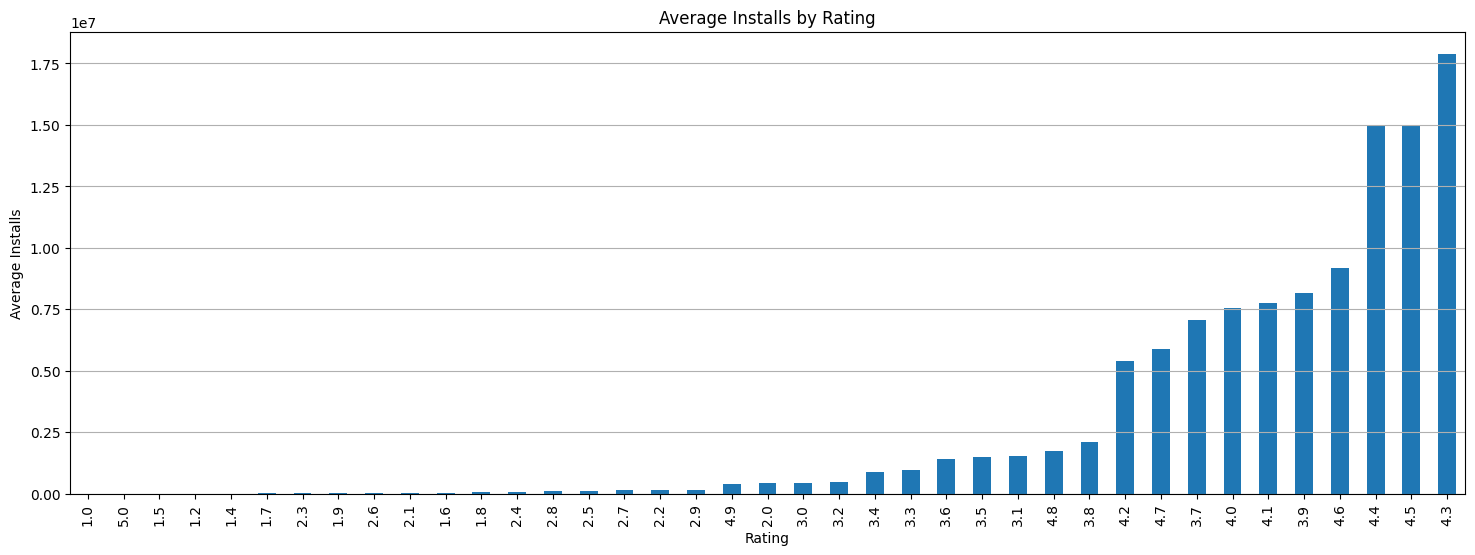

In [128]:
# total_installs = df2.groupby(pd.cut(df2['Rating'], bins=5))['Installs'].mean().sort_values()
total_installs = df2.groupby('Rating')['Installs'].mean().sort_values()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
total_installs.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title("Average Installs by Rating")
ax.set_xlabel("Rating")
ax.set_ylabel("Average Installs")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

In [129]:
print(df2['Reviews'].quantile([0.01, 0.25, 0.37, 0.5, 0.625, 0.75, 0.99]))

0.010          1.000
0.250         49.000
0.370        251.610
0.500       1617.500
0.625       8197.125
0.750      34509.000
0.990    4806814.050
Name: Reviews, dtype: float64


In [130]:
df_top30_by_r2i = df2[df2['Reviews'] >= 980].sort_values(by='Reviews to Installs', ascending=False)[:30]

In [131]:
def clean_app_names(app_name):
    """
    This function cleans an app name by removing special characters and emojis.
    """

    # Remove special characters
    app_name = re.sub(r'[^\w]', '', app_name)

    # Remove emojis
    app_name = demoji.replace(app_name, '')

    # Remove whitespace
    app_name = app_name.strip()

    return app_name

In [132]:
df_top30_by_r2i['App'] = df_top30_by_r2i['App'].apply(clean_app_names)
df_top30_by_r2i.reset_index(inplace=True)

In [133]:
df_top30_by_r2i.drop('index',axis=1, inplace=True)

In [134]:
df_top30_by_r2i['Rating'].mean()

4.586666666666667

In [135]:
df_top30_by_r2i.head()

App       Category  Rating  Reviews   Size  \
0  MyMoviesProMovieTVCollectionLibrary      LIFESTYLE     4.6     6477  20.00   
1                   CarrierLandingsPro         FAMILY     4.6     5969  31.00   
2              aitypekeyboardPlusEmoji          TOOLS     4.5    57076  35.00   
3                           FludAdfree  VIDEO_PLAYERS     4.8     5639  20.39   
4                          DayRPremium         FAMILY     4.8    51068  57.00   

   Installs  Type  Price Content Rating                   Genres Last Updated  \
0     10000  Paid   7.99       Everyone                Lifestyle   2018-07-16   
1     10000  Paid  12.99       Everyone               Simulation   2018-06-29   
2    100000  Paid   4.49       Everyone                    Tools   2018-07-24   
3     10000  Paid   1.49       Everyone  Video Players & Editors   2017-09-07   
4    100000  Paid   4.99           Teen             Role Playing   2018-06-21   

          Current Ver  Android Ver  Reviews to Installs  
0       2.26 Build 17            4              0.64770  
1               4.2.4            4              0.59690  
2        Paid-9.4.1.3            4              0.57076  
3  Varies with device            3              0.56390  
4               1.574            4              0.51068

In [136]:
df_top30_by_r2i.tail()

App             Category  Rating  Reviews  \
25  MyRadarNOAAWeatherRadarAdFree              WEATHER     4.5     3005   
26                 tTorrentadfree        VIDEO_PLAYERS     4.3     2976   
27                  SabbathSchool  BOOKS_AND_REFERENCE     4.7    28237   
28           FiveNightsatFreddys3                 GAME     4.7    27856   
29                 FalloutShelter                 GAME     4.6  2719142   

     Size  Installs  Type  Price Content Rating                   Genres  \
25  26.00     10000  Paid   2.99       Everyone                  Weather   
26  20.39     10000  Paid   1.99       Everyone  Video Players & Editors   
27  10.00    100000  Free   0.00       Everyone        Books & Reference   
28  50.00    100000  Paid   2.99           Teen                   Action   
29  25.00  10000000  Free   0.00           Teen               Simulation   

   Last Updated Current Ver  Android Ver  Reviews to Installs  
25   2018-08-04       7.1.4            4              0.30050  
26   2018-06-15      1.5.14            4              0.29760  
27   2018-04-22     3.2.994            4              0.28237  
28   2015-04-02        1.07            2              0.27856  
29   2018-06-11     1.13.12            4              0.27191

In [137]:
app_r2i = {}
for i in range(len(df_top30_by_r2i)):
    app = df_top30_by_r2i.loc[i, 'App']
    r2i = df_top30_by_r2i.loc[i, 'Reviews to Installs']
    app_r2i[app] = r2i

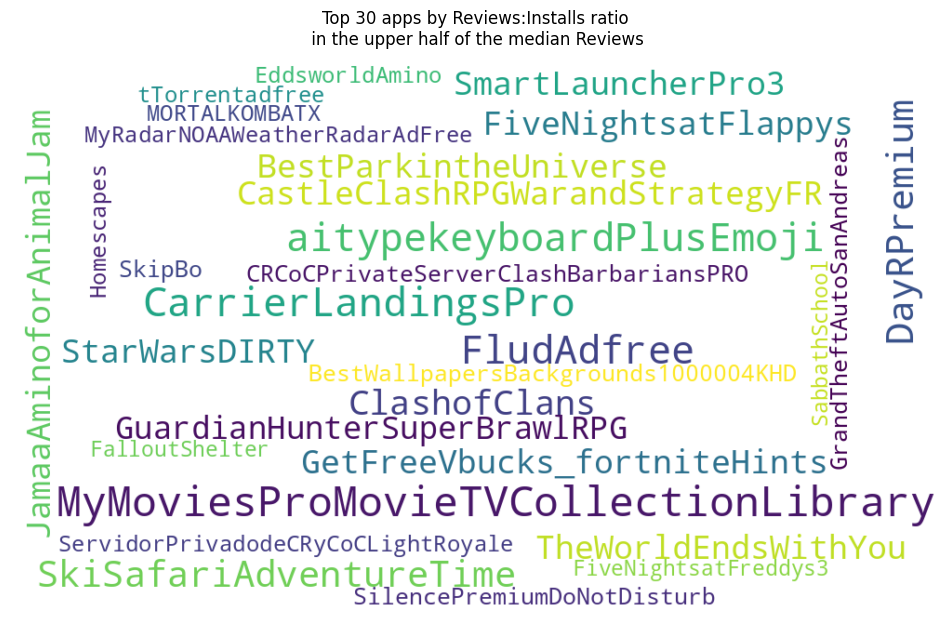

In [138]:
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate_from_frequencies(app_r2i)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 30 apps by Reviews:Installs ratio\n in the upper half of the median Reviews')
plt.show()

##### 1. Why did you pick the specific chart?

To get an idea of the distribution of Installs across various other features.

##### 2. What is/are the insight(s) found from the chart?

The Min, Q1, Q2, Q3 and Max values for 'Installs' are:\
1, 5000, 100000, 1000000 and 1000000000

The mean 'Install' is: 8297156

The mode 'Install' is: 1000000

---

Top 5 'Rating's by total Installs:\
4.3, 4.4, 4.5, 4.2 and 4.6

A rating of 5 is the 6th last rating as per total Installs

---

Top 5 'Rating's by mean Installs:\
4.3, 4.5, 4.4, 4.6 and 3.9

A rating of 5 is the 2nd last rating as per mean Installs

---

Top 5 'App's with a minimum of 980 Reviews by 'Reviews to Installs':\
MyMoviesProMovieTVCollectionLibrary,\
CarrierLandingsPro,\
aitypekeyboardPlusEmoji,\
FludAdfree,\
DayRPremium

Bottom 5 'App's with a minimum of 980 Reviews by 'Reviews to Installs':\
MyRadarNOAAWeatherRadarAdFree,\
tTorrentadfree,\
SabbathSchool,\
FiveNightsatFreddys3,\
FalloutShelter

---

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### 1. A stable rating for a high 'Install' App ranges from 4.3 to 4.5. A rating of 5 is very rare and appears for Apps much lower in the spectrum as per 'Installs'.
### 2. Top Apps to study for End User response are top Apps with a high Reviews:Installs ratio. The top 30 Apps here have a mean 'Rating' of 4.58.

## Exploring column 'Type'


--- Frequency table for 'Type' ---
Free    8380
Paid     674
Name: Type, dtype: int64

--- Summary statistics for 'Type' ---
count     9054
unique       2
top       Free
freq      8380
Name: Type, dtype: object


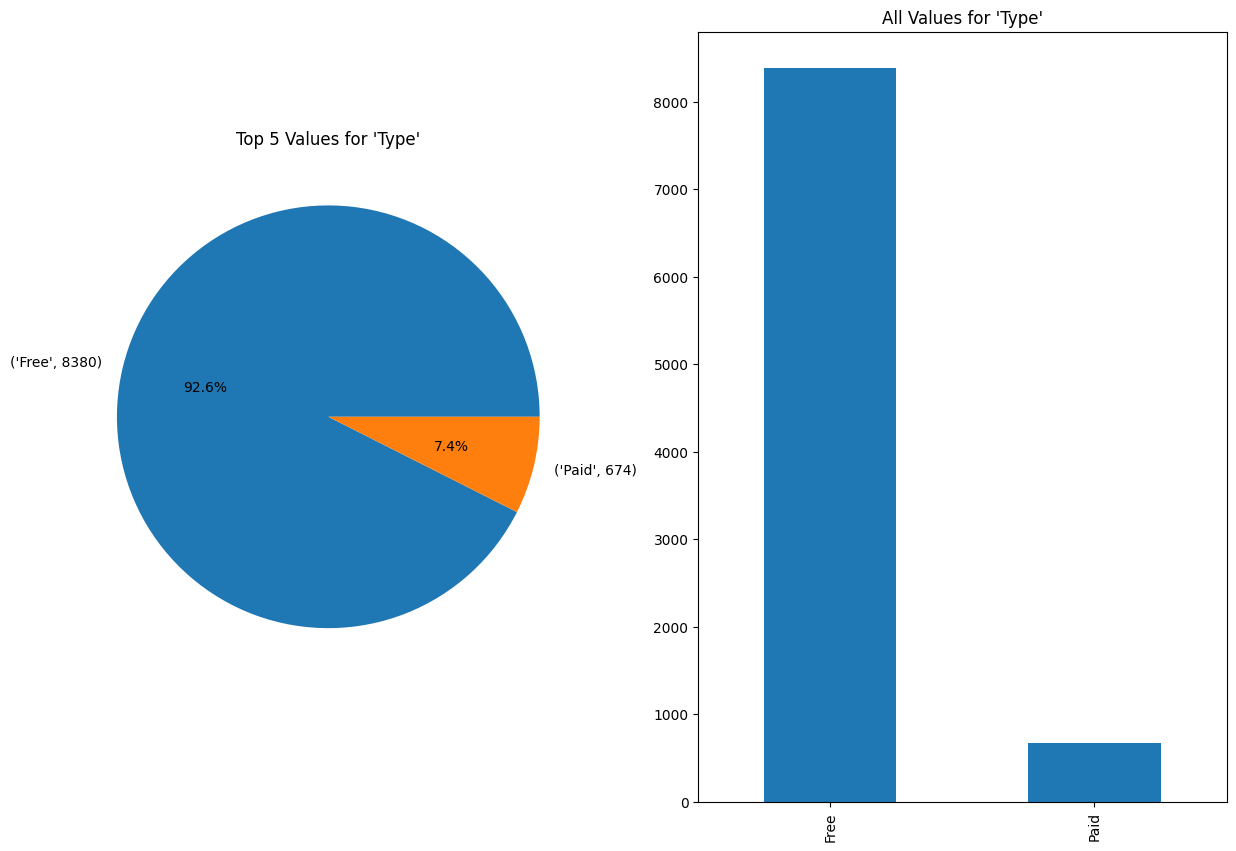

In [139]:
categorical_univariate(df2, 'Type')

<ipython-input-140-7cc9bb60bcd0>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'Free\nmedian:{free_apps_mdi}', f'Paid\nmedian:{paid_apps_mdi}'])


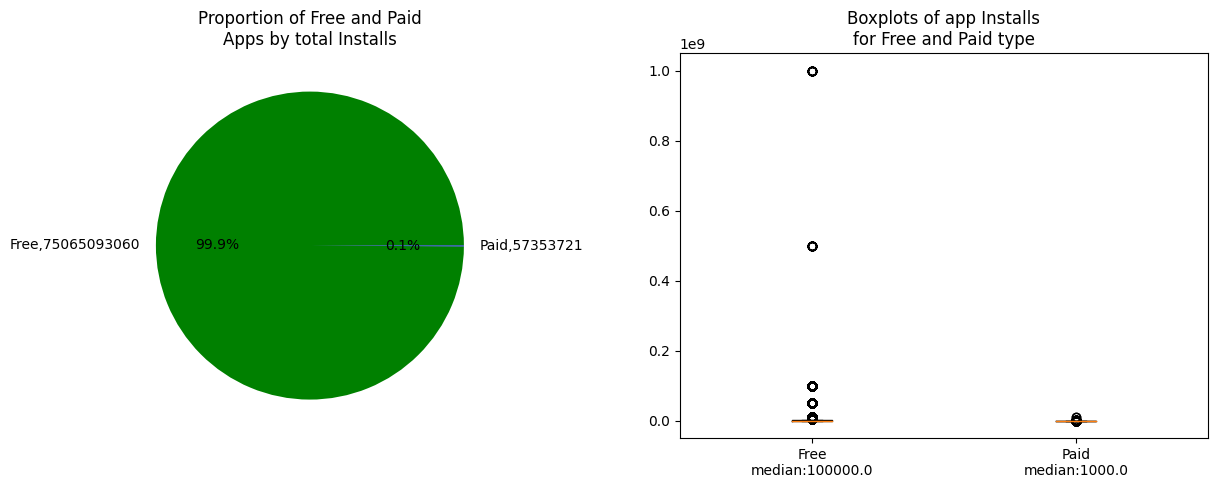

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


free_apps_i_sum = df2[df2['Type'] == 'Free']['Installs'].sum()
paid_apps_i_sum = df2[df2['Type'] == 'Paid']['Installs'].sum()

labels = [f'Free,{free_apps_i_sum}', f'Paid,{paid_apps_i_sum}']
sizes = [free_apps_i_sum, paid_apps_i_sum]
colors = ['green', 'blue']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax1.set_title('Proportion of Free and Paid\nApps by total Installs')


free_apps_i = df2[df2['Type'] == 'Free']['Installs']
paid_apps_i = df2[df2['Type'] == 'Paid']['Installs']

free_apps_mdi = round(free_apps_i.median(),2)
paid_apps_mdi = round(paid_apps_i.median(),2)

ax2.set_xticklabels([f'Free\nmedian:{free_apps_mdi}', f'Paid\nmedian:{paid_apps_mdi}'])
ax2.boxplot([free_apps_i, paid_apps_i], labels=['Free', 'Paid'])
ax2.set_title('Boxplots of app Installs\nfor Free and Paid type')


plt.show()

<ipython-input-141-9c81b99bd8ff>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([f'Free\nmedian:{free_apps_s_md}MB', f'Paid\nmedian:{paid_apps_s_md}MB'])


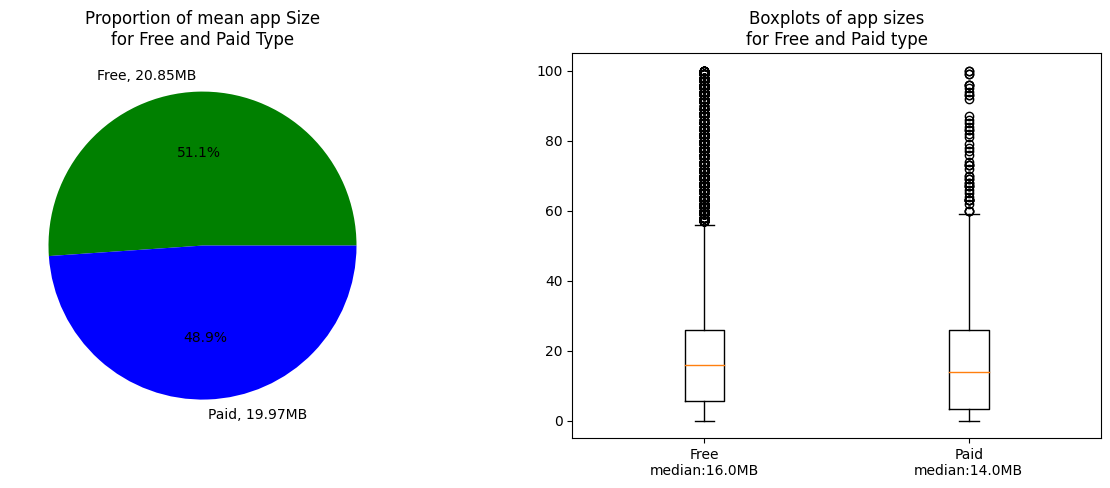

In [141]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


free_apps_ms = df2[df2['Type'] == 'Free']['Size'].mean()
paid_apps_ms = df2[df2['Type'] == 'Paid']['Size'].mean()

labels = [f'Free, {round(free_apps_ms, 2)}MB', f'Paid, {round(paid_apps_ms, 2)}MB']
sizes = [free_apps_ms, paid_apps_ms]
colors = ['green', 'blue']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax1.set_title('Proportion of mean app Size\nfor Free and Paid Type')


free_apps_s = df2[df2['Type'] == 'Free']['Size']
paid_apps_s = df2[df2['Type'] == 'Paid']['Size']

free_apps_s_md = round(free_apps_s.median(),2)
paid_apps_s_md = round(paid_apps_s.median(),2)

ax2.set_xticklabels([f'Free\nmedian:{free_apps_s_md}MB', f'Paid\nmedian:{paid_apps_s_md}MB'])
ax2.boxplot([free_apps_s, paid_apps_s], labels=['Free', 'Paid'])
ax2.set_title('Boxplots of app sizes\nfor Free and Paid type')


plt.show()

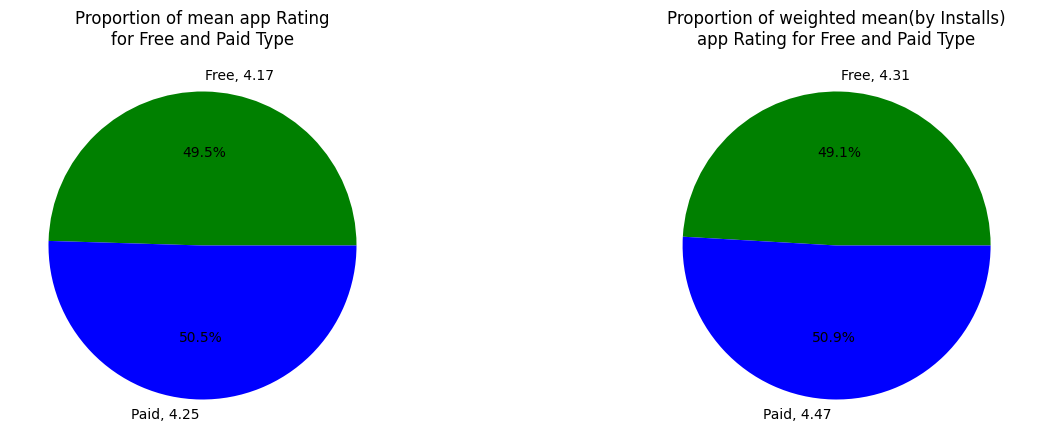

In [142]:
free_app_r = df2[df2['Type'] == 'Free']['Rating']
free_app_i_w = df2[df2['Type'] == 'Free']['Installs']

free_app_wd = [data_point * weight for data_point, weight in zip(list(free_app_r), list(free_app_i_w))]

sum_of_weighted_data = sum(free_app_wd)
sum_of_weights = sum(free_app_i_w)

free_app_wm = sum_of_weighted_data / sum_of_weights



paid_app_r = list(df2[df2['Type'] == 'Paid']['Rating'])
paid_app_i_w = list(df2[df2['Type'] == 'Paid']['Installs'])

paid_app_wd = [data_point * weight for data_point, weight in zip(list(paid_app_r), list(paid_app_i_w))]

sum_of_weighted_data = sum(paid_app_wd)
sum_of_weights = sum(paid_app_i_w)

paid_app_wm = sum_of_weighted_data / sum_of_weights

############################################

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


free_apps_mr = round(df2[df2['Type'] == 'Free']['Rating'].mean(), 2)
paid_apps_mr = round(df2[df2['Type'] == 'Paid']['Rating'].mean(), 2)

labels = [f'Free, {free_apps_mr}', f'Paid, {paid_apps_mr}']
sizes = [free_apps_mr, paid_apps_mr]
colors = ['green', 'blue']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax1.set_title('Proportion of mean app Rating\nfor Free and Paid Type')


free_apps_mwr = round(free_app_wm, 2)
paid_apps_mwr = round(paid_app_wm, 2)

labels = [f'Free, {free_apps_mwr}', f'Paid, {paid_apps_mwr}']
sizes = [free_apps_mwr, paid_apps_mwr]
colors = ['green', 'blue']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Proportion of weighted mean(by Installs)\napp Rating for Free and Paid Type')


plt.show()

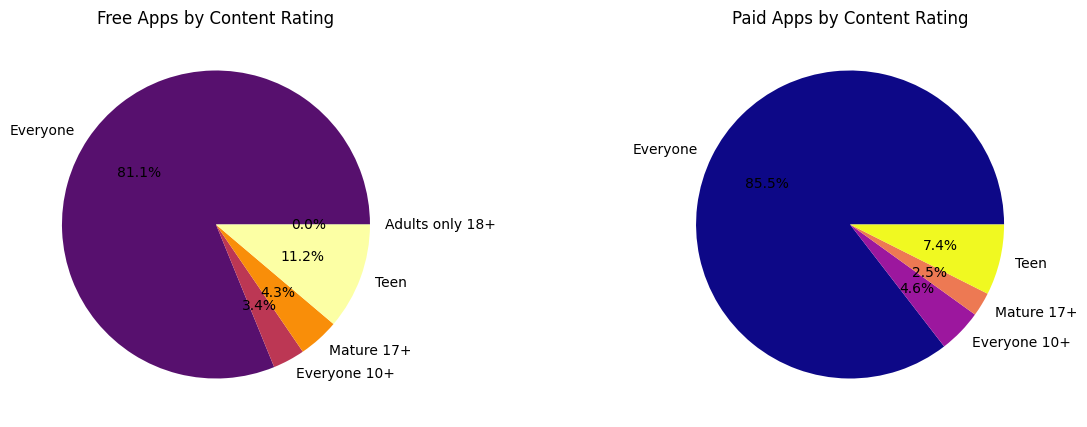

In [143]:
free_apps = df2[df2['Type'] == 'Free']
paid_apps = df2[df2['Type'] == 'Paid']

free_apps_by_content_rating = free_apps.groupby('Content Rating')['App'].count()
paid_apps_by_content_rating = paid_apps.groupby('Content Rating')['App'].count()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Free apps pie chart
labels = free_apps_by_content_rating.index.to_list()
sizes = free_apps_by_content_rating.values.tolist()
colors = plt.cm.inferno(np.linspace(0, 1, len(labels)))

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax1.set_title('Free Apps by Content Rating')

# Paid apps pie chart
labels = paid_apps_by_content_rating.index.to_list()
sizes = paid_apps_by_content_rating.values.tolist()
colors = plt.cm.plasma(np.linspace(0, 1, len(labels)))

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Paid Apps by Content Rating')

# Show the plot
plt.show()

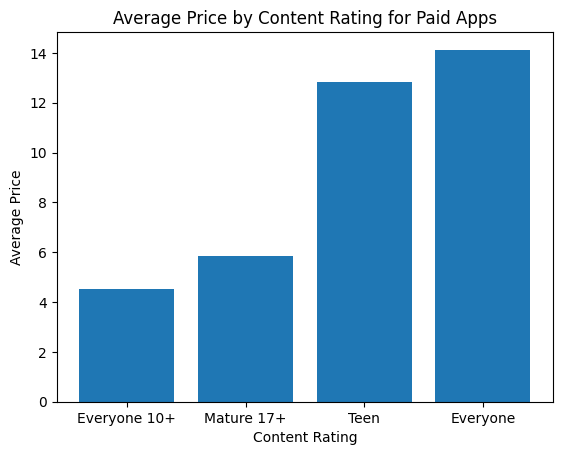

In [144]:
# Filter for 'Type' == 'Paid'
paid_df = df2[df2['Type'] == 'Paid']

# Group by 'Content Rating'
grouped_df = paid_df.groupby('Content Rating')

# Get the average prices for each 'Content Rating'
prices = grouped_df['Price'].mean().sort_values()

# Create a bar chart
plt.bar(prices.index, prices.values)
plt.xlabel("Content Rating")
plt.ylabel("Average Price")
plt.title("Average Price by Content Rating for Paid Apps")
plt.show()

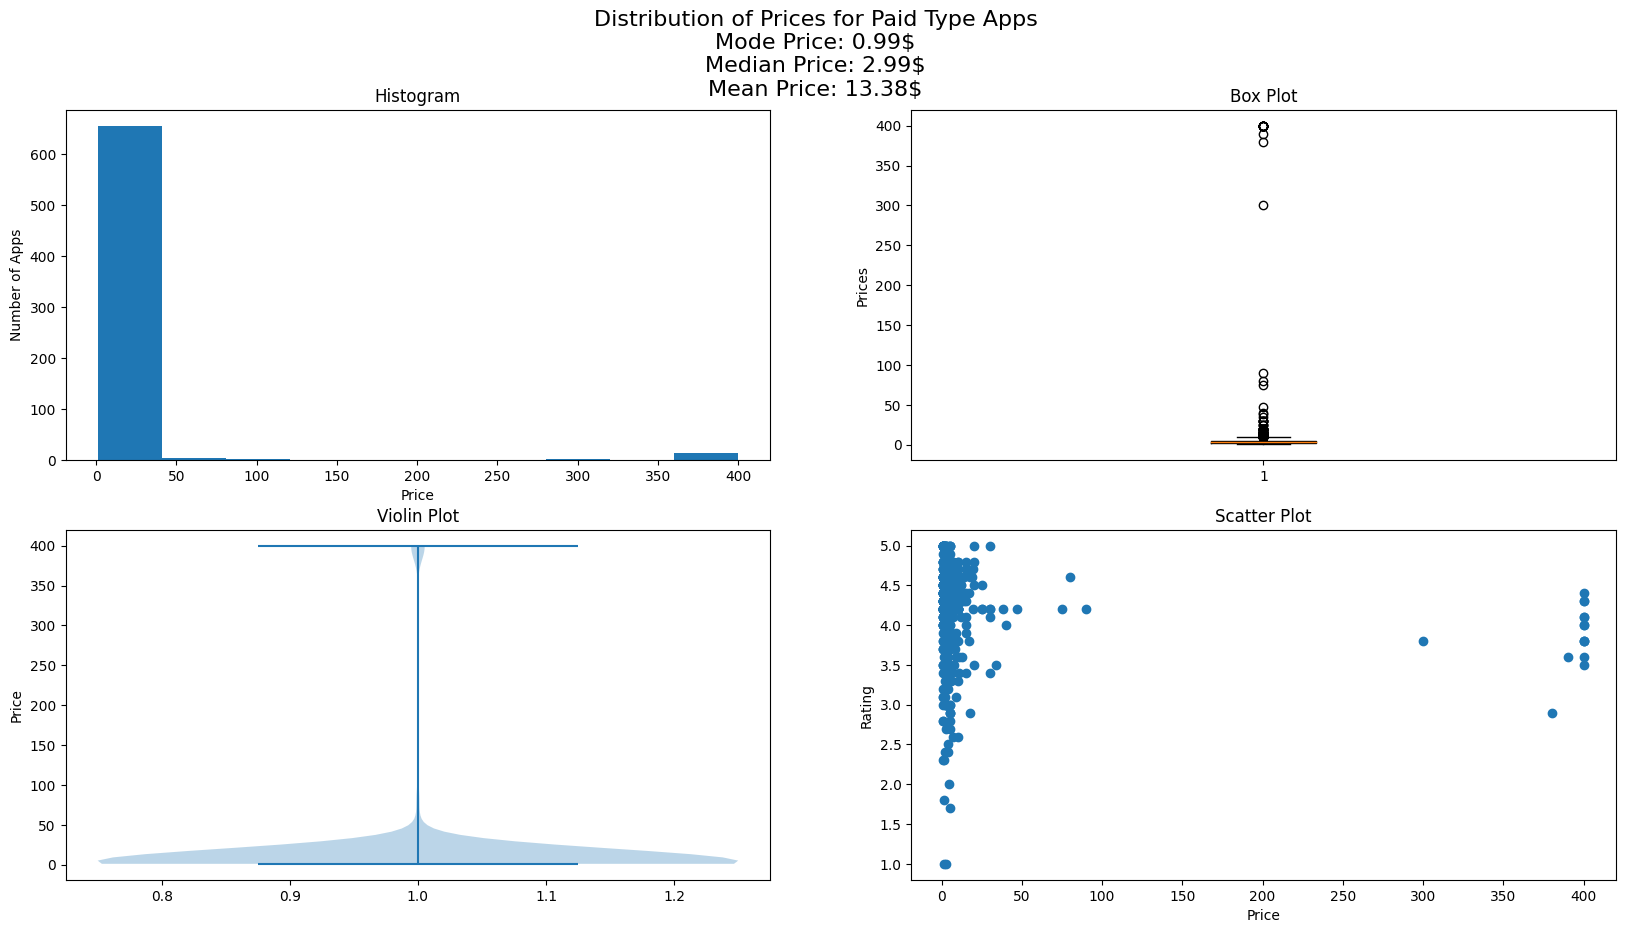

In [145]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Histogram
axes[0, 0].hist(df2[df2['Type'] == 'Paid']['Price'])
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Number of Apps')
axes[0, 0].set_title('Histogram')

# Box plot
axes[0, 1].boxplot(df2[df2['Type'] == 'Paid']['Price'])
axes[0, 1].set_ylabel('Prices')
axes[0, 1].set_title('Box Plot')

# Violin plot
axes[1, 0].violinplot(df2[df2['Type'] == 'Paid']['Price'])
axes[1, 0].set_ylabel('Price')
axes[1, 0].set_title('Violin Plot')

# Scatter plot
axes[1, 1].scatter(df2[df2['Type'] == 'Paid']['Price'], df2[df2['Type'] == 'Paid']['Rating'])
axes[1, 1].set_xlabel('Price')
axes[1, 1].set_ylabel('Rating')
axes[1, 1].set_title('Scatter Plot')

mean_price = round(df2[df2['Type'] == 'Paid']['Price'].mean(), 2)
mode_price = round(df2[df2['Type'] == 'Paid']['Price'].mode(), 2)
median_price = round(df2[df2['Type'] == 'Paid']['Price'].median(), 2)

fig.suptitle(f'Distribution of Prices for Paid Type Apps\nMode Price: {mode_price[0]}$\nMedian Price: {median_price}$\nMean Price: {mean_price}$', fontsize=16)

plt.show()

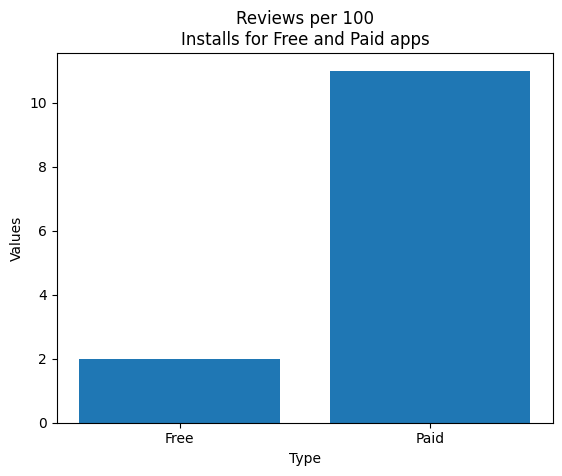

In [146]:
free_app_reviews = df2[df2['Type'] == 'Free']['Reviews'].sum()
free_app_installs = df2[df2['Type'] == 'Free']['Installs'].sum()
paid_app_reviews = df2[df2['Type'] == 'Paid']['Reviews'].sum()
paid_app_Installs = df2[df2['Type'] == 'Paid']['Installs'].sum()

reviews_per_100_installs_free = int(free_app_reviews/free_app_installs * 100)
reviews_per_100_installs_paid = int(paid_app_reviews/paid_app_Installs * 100)

values = [reviews_per_100_installs_free, reviews_per_100_installs_paid]
labels = ["Free", "Paid"]

plt.bar(labels, values)
plt.xlabel("Type")
plt.ylabel("Values")
plt.title("Reviews per 100\nInstalls for Free and Paid apps")
plt.show()

In [147]:
df2[df2['Type'] == 'Free']['Rating'].var()

0.2582421873242033

In [148]:
df2[df2['Type'] == 'Paid']['Rating'].var()

0.27917531227816456

<ipython-input-149-5b8bc5fe58dc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['Price_Bin'] = pd.cut(paid_df['Price'], bins=bins, labels=labels)


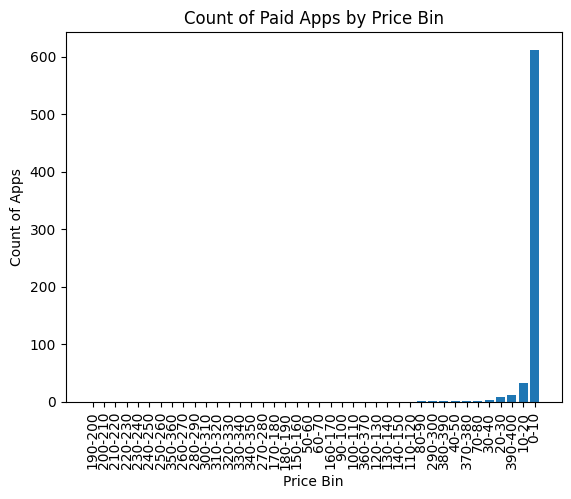

In [149]:
# Filter for 'Type' == 'Paid'
paid_df = df2[df2['Type'] == 'Paid']

# Create price bins
bins = [0 + i for i in range(0, 401, 10)]
labels = [str(bins[i]) + '-' + str(bins[i+1]) for i in range(len(bins)-1)]

# Bin the prices
paid_df['Price_Bin'] = pd.cut(paid_df['Price'], bins=bins, labels=labels)

# Group by 'Price_Bin' and count the number of apps
count_by_bin = paid_df.groupby('Price_Bin').size().sort_values()

# Create a bar chart
plt.bar(count_by_bin.index, count_by_bin.values)
plt.xlabel("Price Bin")
plt.ylabel("Count of Apps")
plt.title("Count of Paid Apps by Price Bin")
plt.xticks(rotation=90)
plt.show()

<ipython-input-150-f5680c52ac47>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['Price_Bin'] = pd.cut(paid_df['Price'], bins=bins, labels=labels)


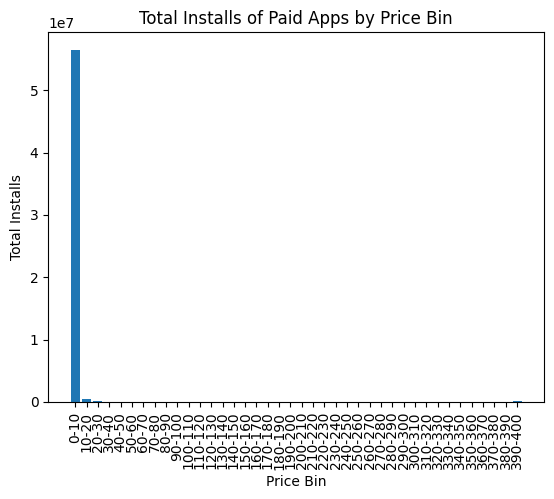

In [150]:
# Filter for 'Type' == 'Paid'
paid_df = df2[df2['Type'] == 'Paid']

# Create price bins
bins = [0 + i for i in range(0, 401, 10)]
labels = [str(bins[i]) + '-' + str(bins[i+1]) for i in range(len(bins)-1)]

# Bin the prices
paid_df['Price_Bin'] = pd.cut(paid_df['Price'], bins=bins, labels=labels)

# Group by 'Price_Bin' and sum the installs
installs_by_bin = paid_df.groupby('Price_Bin')['Installs'].sum()

# Create a bar chart
plt.bar(installs_by_bin.index, installs_by_bin.values)
plt.xlabel("Price Bin")
plt.ylabel("Total Installs")
plt.title("Total Installs of Paid Apps by Price Bin")
plt.xticks(rotation=90)
plt.show()

In [151]:
# Filter for 'Type' == 'Paid'
paid_df = df2[df2['Type'] == 'Paid']

# Group by 'Content Rating' and sum the installs
installs_by_rating = paid_df.groupby('Content Rating')['Installs'].sum()

# Print the results
print(installs_by_rating)

Content Rating
Everyone        25939921
Everyone 10+    14504500
Mature 17+      11322420
Teen             5586880
Name: Installs, dtype: int64


##### 1. Why did you pick the specific chart?

To explore the effects of price on reviews and installs and the distribution of Prices among the apps.

##### 2. What is/are the insight(s) found from the chart?

Mean 'Price' for 'Paid' 'App's: 13.38$

Median 'Price' for 'Paid' 'App's: 2.99$

Mode 'Price' for 'Paid' 'App's: 0.99$

---

Percentage of 'Free' Type Apps by count: 92.6% (8380)\
Percentage of 'Paid' Type Apps by count: 07.4% (674)

---

Percentage of 'Free' Type Apps by Installs: 99.9% (75065093060)\
Percentage of 'Paid' Type Apps by Installs: 00.1% (57353721)

---

Mean 'Free' 'App' 'Size': 20.85MB\
Mean 'Paid' 'App' 'Size': 19.97MB

---

Mean 'Free' 'App' 'Rating': 4.17\
Mean 'Paid' 'App' 'Rating': 4.25

Mean 'Free' 'App' 'Rating' weighted by 'Installs': 4.31\
Mean 'Paid' 'App' 'Rating' weighted by 'Installs': 4.47

---

Top 2 'Content Rating's by 'Price' for 'Paid' 'App's: Everyone and Teen
Top 2 'Content Rating's for 'Paid' 'App's by 'Installs': Everyone and Everyone 10+

---

'Reviews' per 100 'Install's for 'Free' 'App's: 2\
'Reviews' per 100 'Install's for 'Paid' 'App's: 11

---

Variance of 'Rating' for 'Free' 'App's: 0.25\
Variance of 'Rating' for 'Paid' 'App's: 0.27

---

Top 'Price' bin for apps by 'Installs': 0.1\$ - 10\$

---

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### 1. The percentage for 'Paid' apps is much lower than 'Free' apps by 'Install's.
### 2. The mean, median and mode of 'Price' for 'Paid' apps:
### 13.38\$, 2.99\$ and 0.99\$.
### 3. Apps priced between 0.1\$ and 10\$ rate highest by Installs.
### 4. Paid apps rated Everyone sell the highest.

## Exploring column 'Content Rating'


--- Frequency table for 'Content Rating' ---
Everyone           7375
Teen                987
Mature 17+          376
Everyone 10+        313
Adults only 18+       3
Name: Content Rating, dtype: int64

--- Summary statistics for 'Content Rating' ---
count         9054
unique           5
top       Everyone
freq          7375
Name: Content Rating, dtype: object


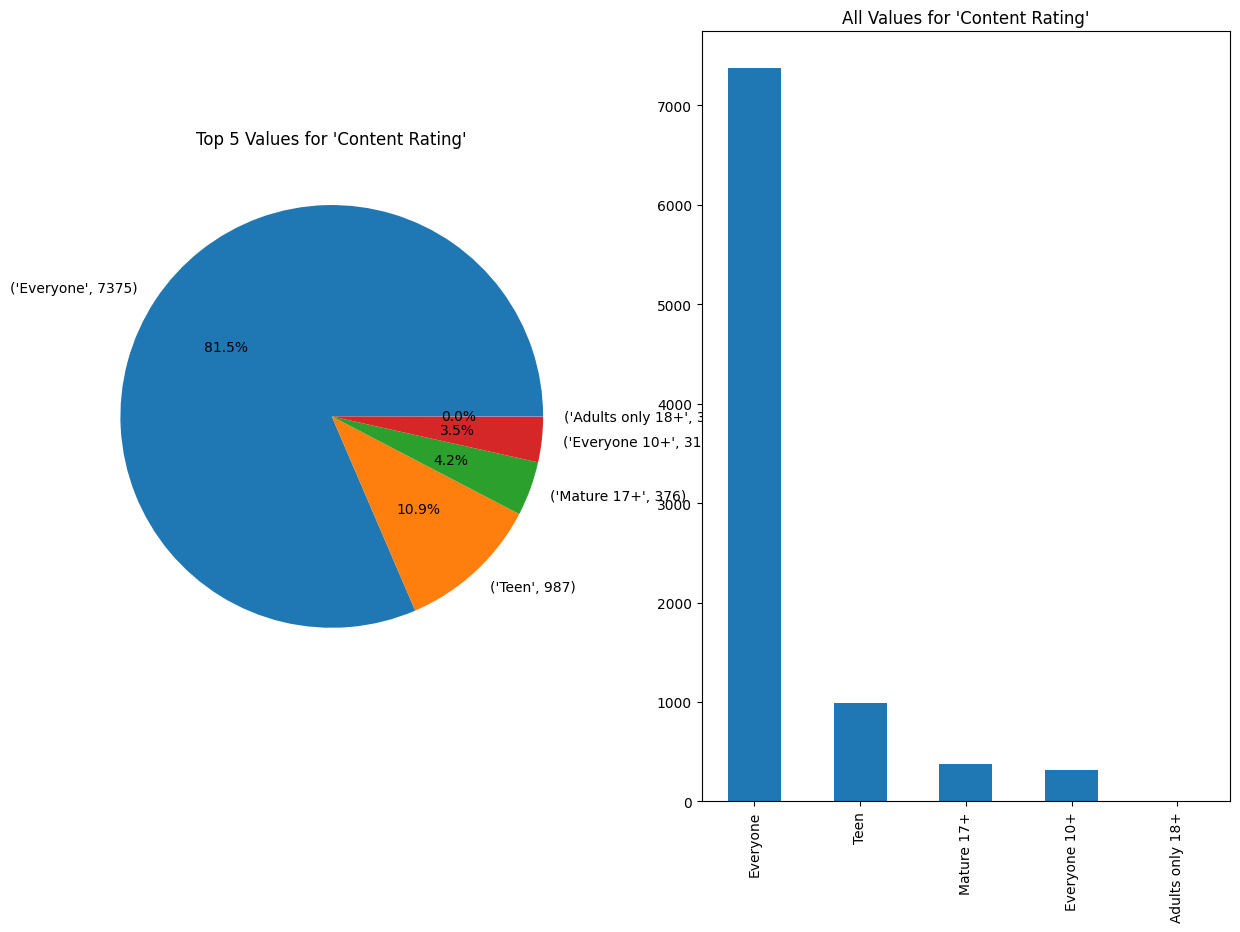

In [152]:
categorical_univariate(df2, 'Content Rating')

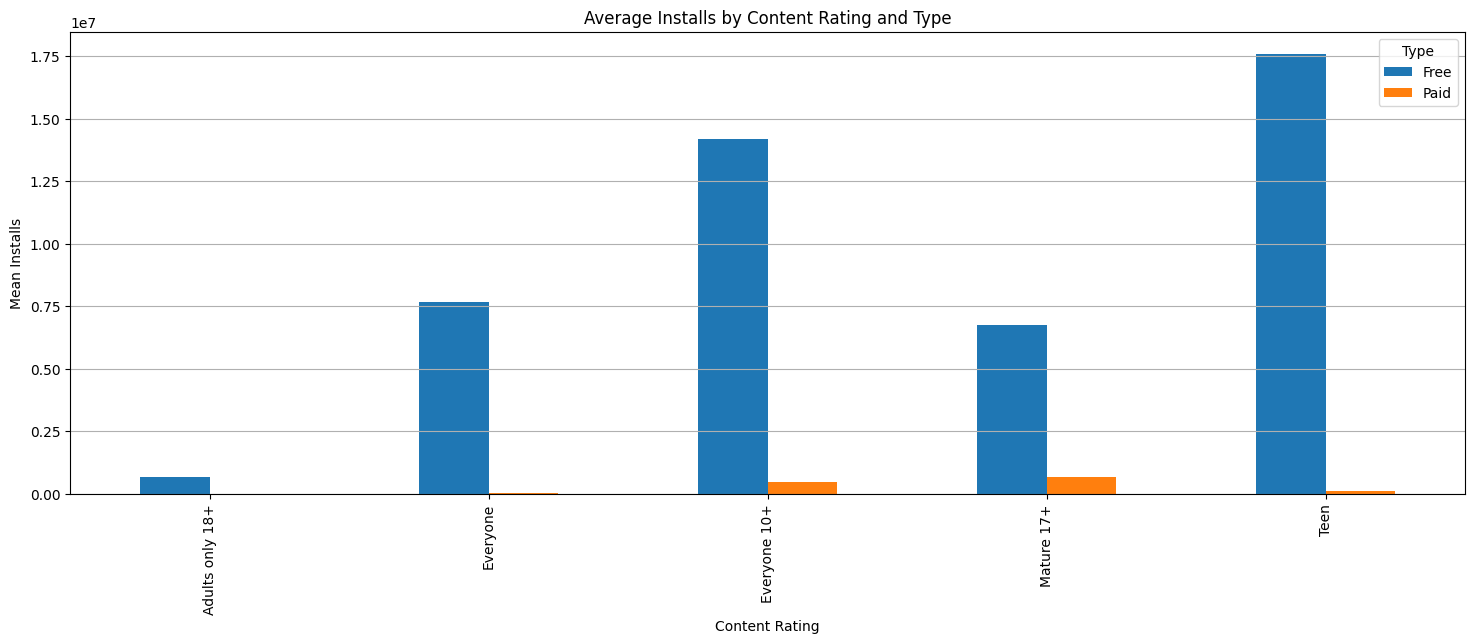

In [153]:
grouped_data = df2.groupby(['Content Rating', 'Type'])['Installs'].mean().unstack()

# Create a bar chart
fig, ax = plt.subplots(figsize=(18, 6))
grouped_data.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title('Average Installs by Content Rating and Type')
ax.set_xlabel('Content Rating')
ax.set_ylabel('Mean Installs')

# Add a legend to the plot
ax.legend(title='Type')

# Show the plot
plt.grid(axis='y')
# plt.tight_layout()
plt.show()

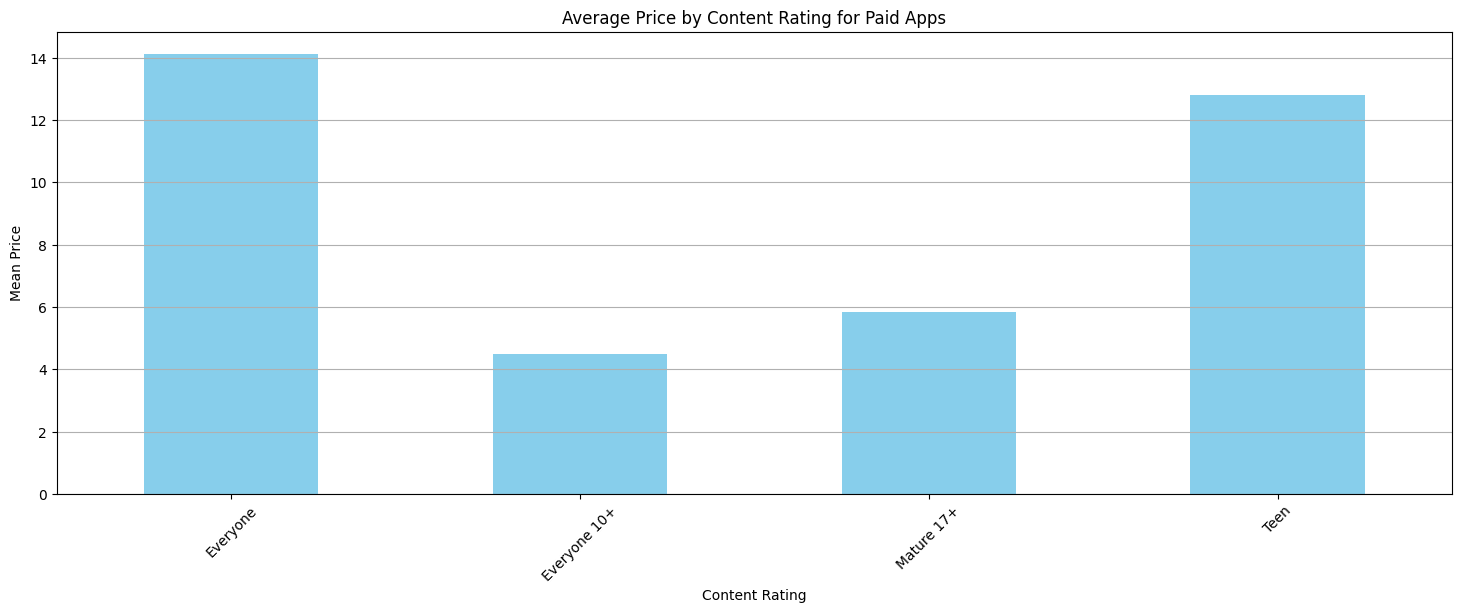

In [154]:
paid_apps = df2[df2['Type'] == 'Paid']

mean_price_by_c_rating = paid_apps.groupby('Content Rating')['Price'].mean()

# Create a bar plot
plt.figure(figsize=(18, 6))
mean_price_by_c_rating.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Average Price by Content Rating for Paid Apps')
plt.xlabel('Content Rating')
plt.ylabel('Mean Price')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show plot
plt.grid(axis='y')
# plt.tight_layout()
plt.show()

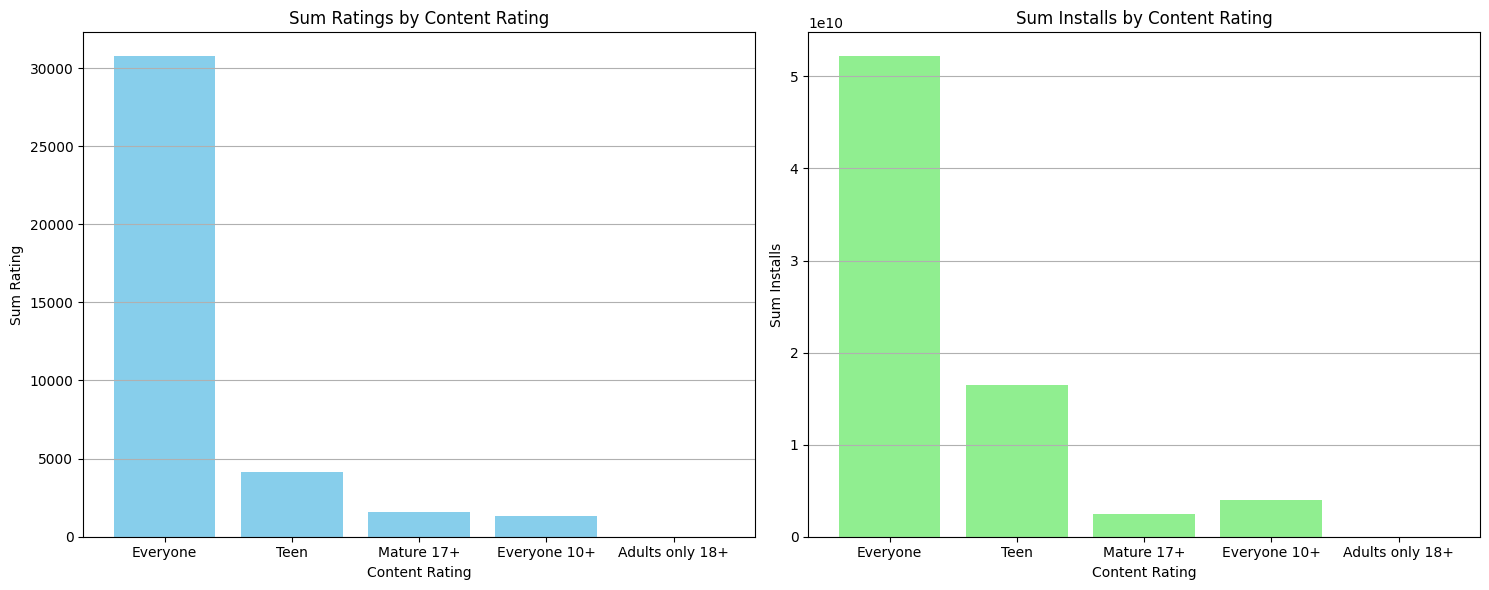

In [155]:
# Group the data by Content Rating and calculate the average ratings and installs for each group
rating_installs_sum = df2.groupby('Content Rating').agg({'Rating': 'sum', 'Installs': 'sum'})

# Sort the data by average ratings in descending order
rating_installs_sum = rating_installs_sum.sort_values(by='Rating', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot average ratings
axes[0].bar(rating_installs_sum.index, rating_installs_sum['Rating'], color='skyblue')
axes[0].set_title('Sum Ratings by Content Rating')
axes[0].set_xlabel('Content Rating')
axes[0].set_ylabel('Sum Rating')
axes[0].grid(axis='y')

# Plot average installs
axes[1].bar(rating_installs_sum.index, rating_installs_sum['Installs'], color='lightgreen')
axes[1].set_title('Sum Installs by Content Rating')
axes[1].set_xlabel('Content Rating')
axes[1].set_ylabel('Sum Installs')
axes[1].grid(axis='y')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

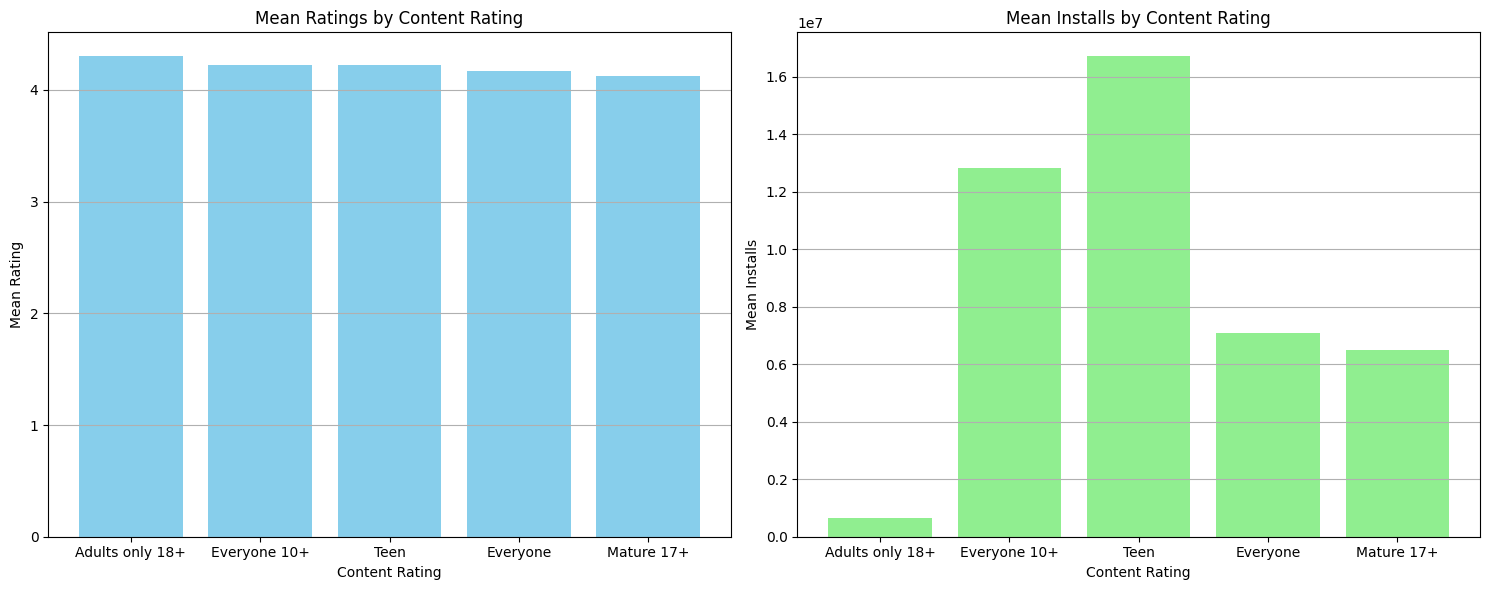

In [156]:
# Group the data by Content Rating and calculate the average ratings and installs for each group
rating_installs_mean = df2.groupby('Content Rating').agg({'Rating': 'mean', 'Installs': 'mean'})

# Sort the data by average ratings in descending order
rating_installs_mean = rating_installs_mean.sort_values(by='Rating', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot average ratings
axes[0].bar(rating_installs_mean.index, rating_installs_mean['Rating'], color='skyblue')
axes[0].set_title('Mean Ratings by Content Rating')
axes[0].set_xlabel('Content Rating')
axes[0].set_ylabel('Mean Rating')
axes[0].grid(axis='y')

# Plot average installs
axes[1].bar(rating_installs_mean.index, rating_installs_mean['Installs'], color='lightgreen')
axes[1].set_title('Mean Installs by Content Rating')
axes[1].set_xlabel('Content Rating')
axes[1].set_ylabel('Mean Installs')
axes[1].grid(axis='y')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

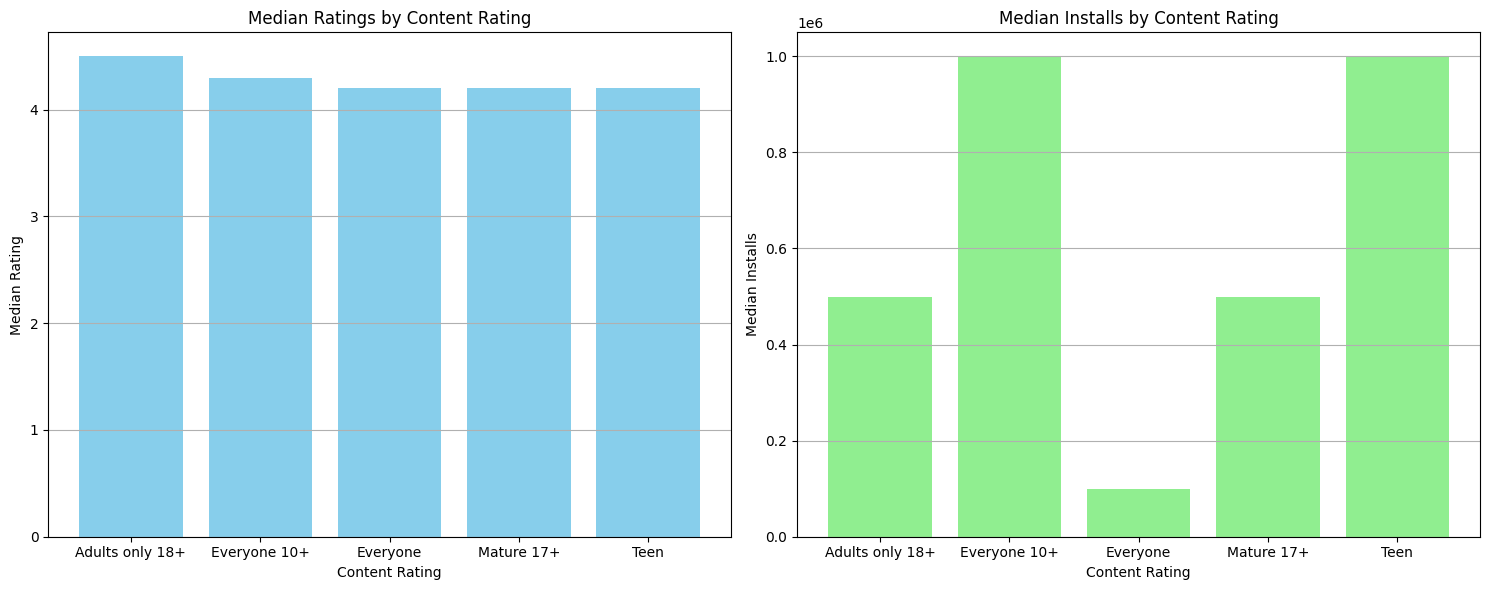

In [157]:
# Group the data by Content Rating and calculate the median ratings and installs for each group
rating_installs_median = df2.groupby('Content Rating').agg({'Rating': 'median', 'Installs': 'median'})

# Sort the data by median ratings in descending order
rating_installs_median = rating_installs_median.sort_values(by='Rating', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot median ratings
axes[0].bar(rating_installs_median.index, rating_installs_median['Rating'], color='skyblue')
axes[0].set_title('Median Ratings by Content Rating')
axes[0].set_xlabel('Content Rating')
axes[0].set_ylabel('Median Rating')
axes[0].grid(axis='y')

# Plot median installs
axes[1].bar(rating_installs_median.index, rating_installs_median['Installs'], color='lightgreen')
axes[1].set_title('Median Installs by Content Rating')
axes[1].set_xlabel('Content Rating')
axes[1].set_ylabel('Median Installs')
axes[1].grid(axis='y')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

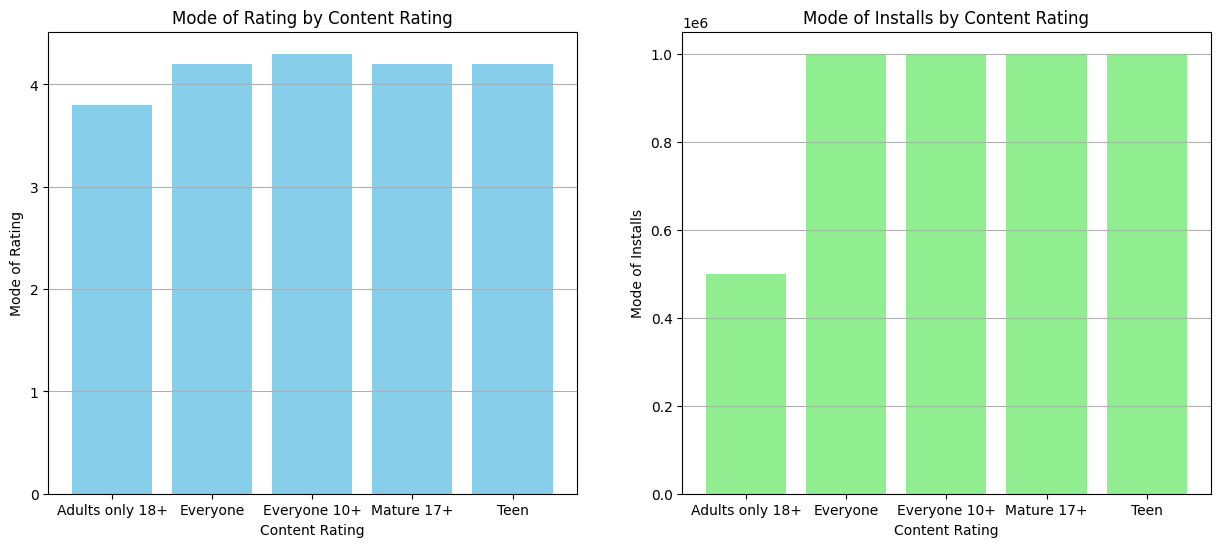

In [158]:
grouped_df = df2.groupby('Content Rating')

mode_rating = grouped_df['Rating'].agg(lambda x: x.mode()[0])
mode_installs = grouped_df['Installs'].agg(lambda x: x.mode()[0])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].bar(mode_rating.index, mode_rating.values, color='skyblue')
axes[0].set_xlabel('Content Rating')
axes[0].set_ylabel('Mode of Rating')
axes[0].set_title('Mode of Rating by Content Rating')
axes[0].grid(axis='y')

axes[1].bar(mode_installs.index, mode_installs.values, color='lightgreen')
axes[1].set_xlabel('Content Rating')
axes[1].set_ylabel('Mode of Installs')
axes[1].set_title('Mode of Installs by Content Rating')
axes[1].grid(axis='y')

plt.show()

##### 1. Why did you pick the specific chart?

To get the distribution of Content Ratings across various other features.

##### 2. What is/are the insight(s) found from the chart?

Top 'Content Rating' by count: Everyone, Teen, Mature 17+

---

Top 'Content Rating' by average 'Installs' for 'Free' app: Teen\
Top 'Content Rating' by average 'Installs' for 'Paid' app: Mature 17+

---

Mean 'Price' for paid apps by Content Rating:\
Everyone: 14\$,\
 Teen: 12.5\$,\
Mature 17+: 5.9\$,\
Everyone 10+: 4.5\$

---

Top Content Rating by total Rating: Everyone\
Top Content Rating by total Installs: Everyone

---

Top Content Rating by mean Rating: Adults only 18+\
Top Content Rating by mean Installs: Teen

---

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### 1. 'Everyone' content rated score highest on total Installs.
### 2. 'Teen' content rated score highest on average Installs.
### 3. Average price for 'Everyone' apps: 14\$
### 4. Average price for 'Teen' apps: 12.5\$

## Exploring column 'Last Updated'

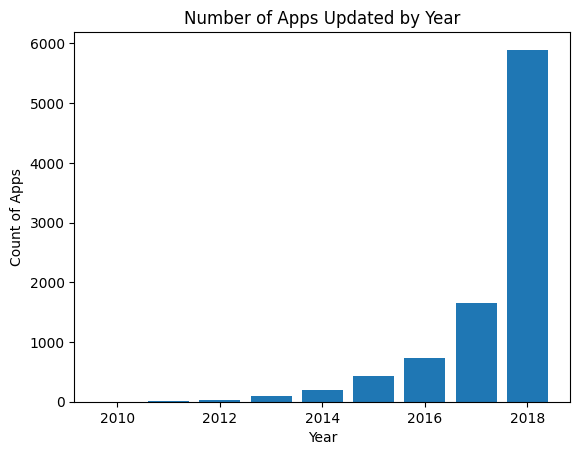

In [159]:
# Extract the year from the 'Last Updated' column
df2['Year'] = pd.DatetimeIndex(df2['Last Updated']).year

# Group by 'Year' and count the number of apps
count_by_year = df2.groupby('Year').size()

# Create a bar chart
plt.bar(count_by_year.index, count_by_year.values)
plt.xlabel("Year")
plt.ylabel("Count of Apps")
plt.title("Number of Apps Updated by Year")
plt.show()

In [160]:
df2['Installs'].describe()

count    9.054000e+03
mean     8.297156e+06
std      5.548669e+07
min      1.000000e+00
25%      5.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

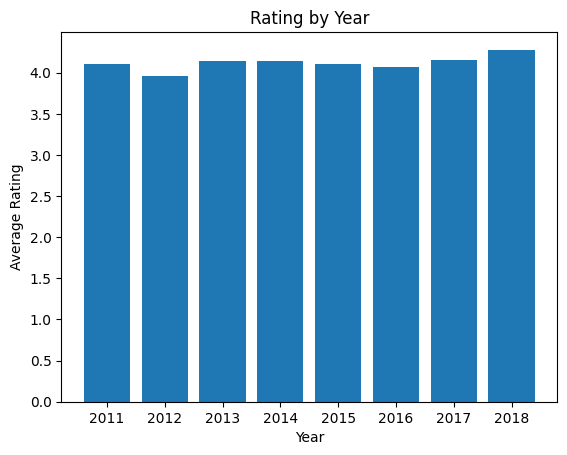

In [161]:
df_high_reviews = df2[df2['Installs'] > 100000]
mean_rating_by_year = df_high_reviews.groupby('Year')['Rating'].mean()

plt.bar(mean_rating_by_year.index, mean_rating_by_year.values)
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Rating by Year")
plt.show()

##### 1. Why did you pick the specific chart?

Te get counnts of apps updated by year from 'Last Updated'.

##### 2. What is/are the insight(s) found from the chart?

Most apps were updated last in 2018

---

Ratings are higher for apps Updated last in 2018

---

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### 1. Average ratings across apps shoe to be higher for those updated last in 2018.

## Exploring column 'Android Ver'sion

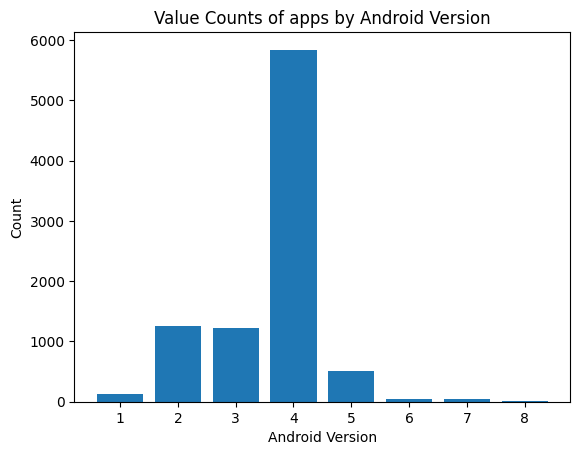

In [162]:
# Chart - 8 visualization code
value_counts = df2['Android Ver'].value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Android Version')
plt.ylabel('Count')
plt.title('Value Counts of apps by Android Version')
plt.show()

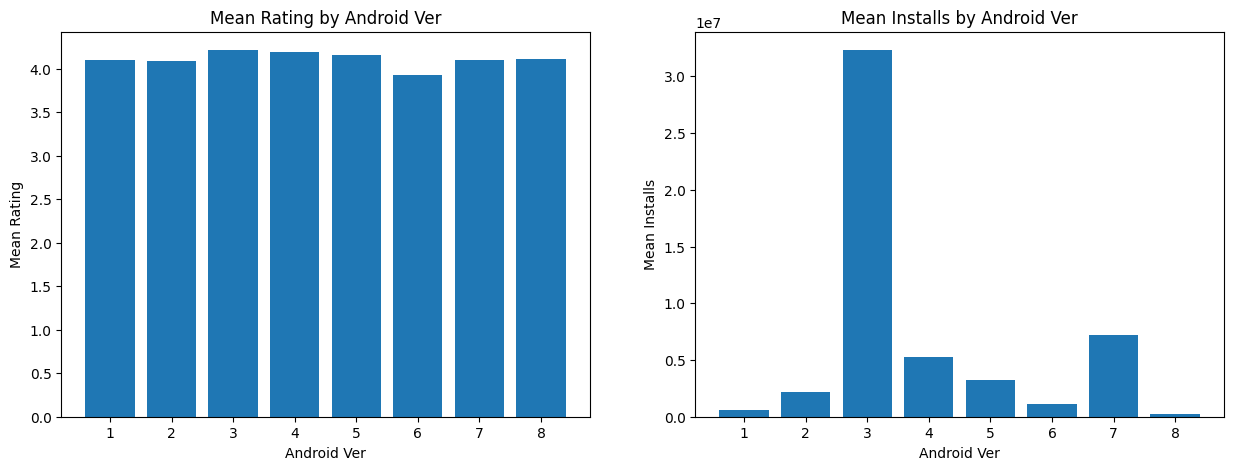

In [163]:
grouped_df = df2.groupby('Android Ver')

mean_ratings = grouped_df['Rating'].mean().sort_values()
mean_installs = grouped_df['Installs'].mean().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar(mean_ratings.index, mean_ratings.values)
ax1.set_xlabel('Android Ver')
ax1.set_ylabel('Mean Rating')
ax1.set_title('Mean Rating by Android Ver')

ax2.bar(mean_installs.index, mean_installs.values)
ax2.set_xlabel('Android Ver')
ax2.set_ylabel('Mean Installs')
ax2.set_title('Mean Installs by Android Ver')

plt.show()

In [164]:
df2.groupby('Android Ver')['Rating'].mean().sort_values()

Android Ver
6    3.935417
2    4.086922
1    4.101575
7    4.104444
8    4.116667
5    4.158317
4    4.191009
3    4.216748
Name: Rating, dtype: float64

In [165]:
df2.groupby('Android Ver')['Installs'].mean().sort_values()

Android Ver
8    2.516843e+05
1    5.536615e+05
6    1.096798e+06
2    2.218886e+06
5    3.225492e+06
4    5.254593e+06
7    7.233547e+06
3    3.232041e+07
Name: Installs, dtype: float64

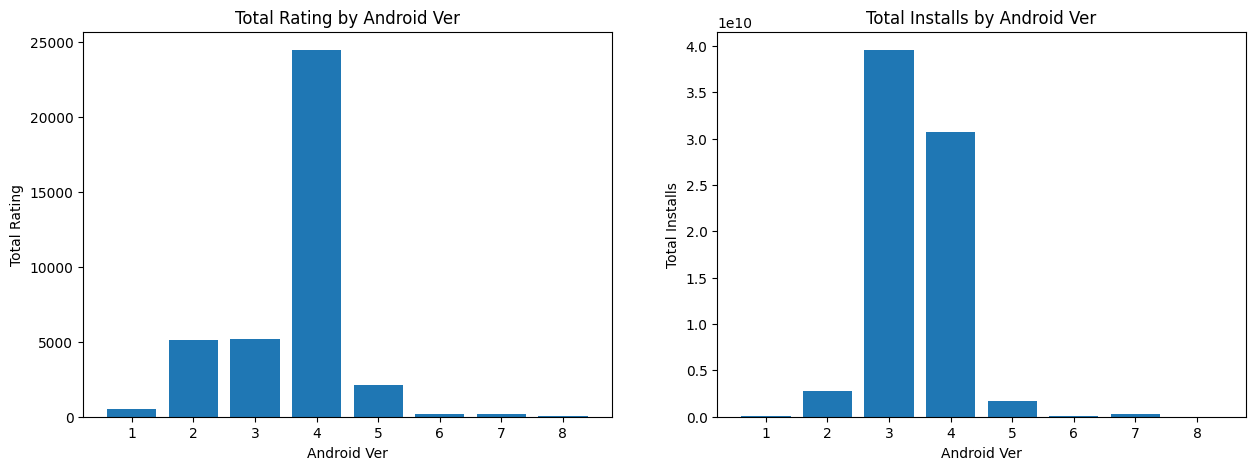

In [166]:
grouped_df = df2.groupby('Android Ver')

sum_ratings = grouped_df['Rating'].sum()
sum_installs = grouped_df['Installs'].sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar(sum_ratings.index, sum_ratings.values)
ax1.set_xlabel('Android Ver')
ax1.set_ylabel('Total Rating')
ax1.set_title('Total Rating by Android Ver')

ax2.bar(sum_installs.index, sum_installs.values)
ax2.set_xlabel('Android Ver')
ax2.set_ylabel('Total Installs')
ax2.set_title('Total Installs by Android Ver')

plt.show()

##### 1. Why did you pick the specific chart?

To get an idea of the Android Versions

##### 2. What is/are the insight(s) found from the chart?

Top 3 'Android Ver'sions by count: 4,2,3

---

Top 3 'Android Ver'sions by mean Rating: 3,4,5
Top 3 'Android Ver'sions by mean Installs: 3,7,4

---

Top 3 'Android Ver'sions by total Rating: 4,3,2
Top 3 'Android Ver'sions by total Installs: 3,4,5

---

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### 1. The best minimum Android Version for a app to run on is atleast 3 or 4.

## Exploring column 'Genres'


--- Frequency table for 'Genres' ---
Tools                              782
Entertainment                      537
Education                          478
Personalization                    344
Business                           342
                                  ... 
Art & Design;Pretend Play            1
Lifestyle;Pretend Play               1
Comics;Creativity                    1
Art & Design;Action & Adventure      1
Strategy;Creativity                  1
Name: Genres, Length: 118, dtype: int64

--- Summary statistics for 'Genres' ---
count      9054
unique      118
top       Tools
freq        782
Name: Genres, dtype: object


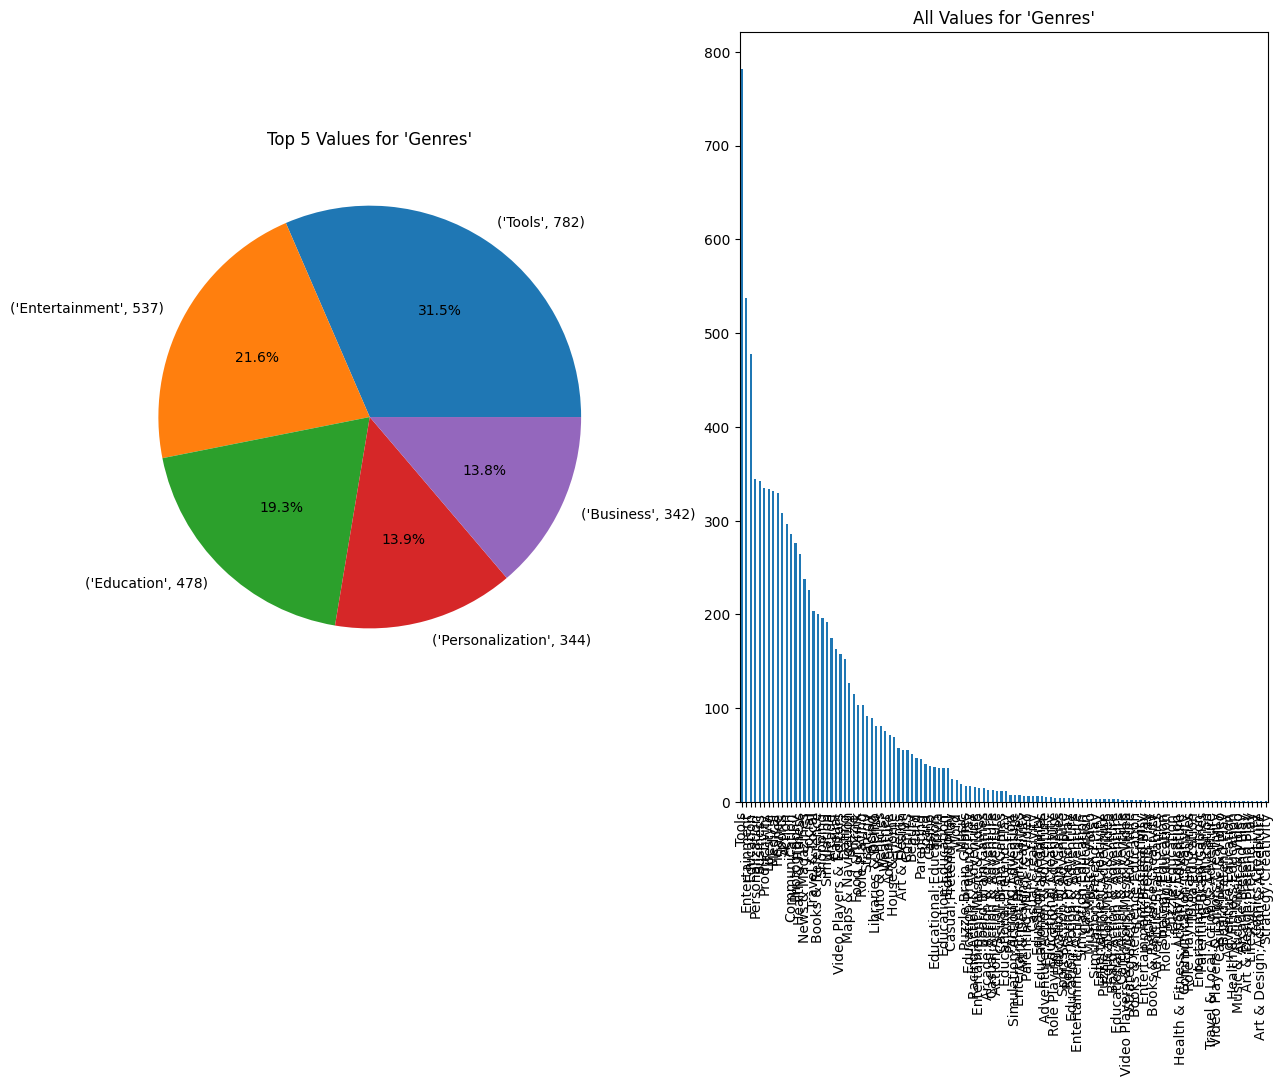

In [167]:
# Chart - 12 visualization code
categorical_univariate(df2, 'Genres')

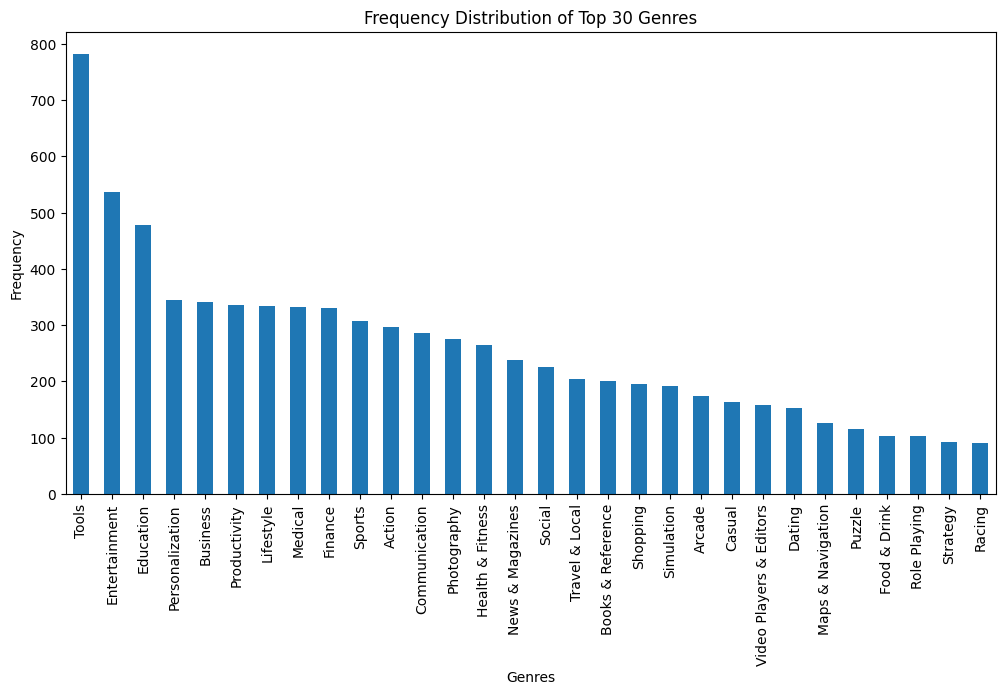

In [168]:
# Get the top 30 Genres
top_30_genres = df2['Genres'].value_counts().head(30)

# Create a frequency distribution graph
plt.figure(figsize=(12, 6))
top_30_genres.plot(kind='bar')
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Top 30 Genres")
plt.xticks(rotation=90)
plt.show()

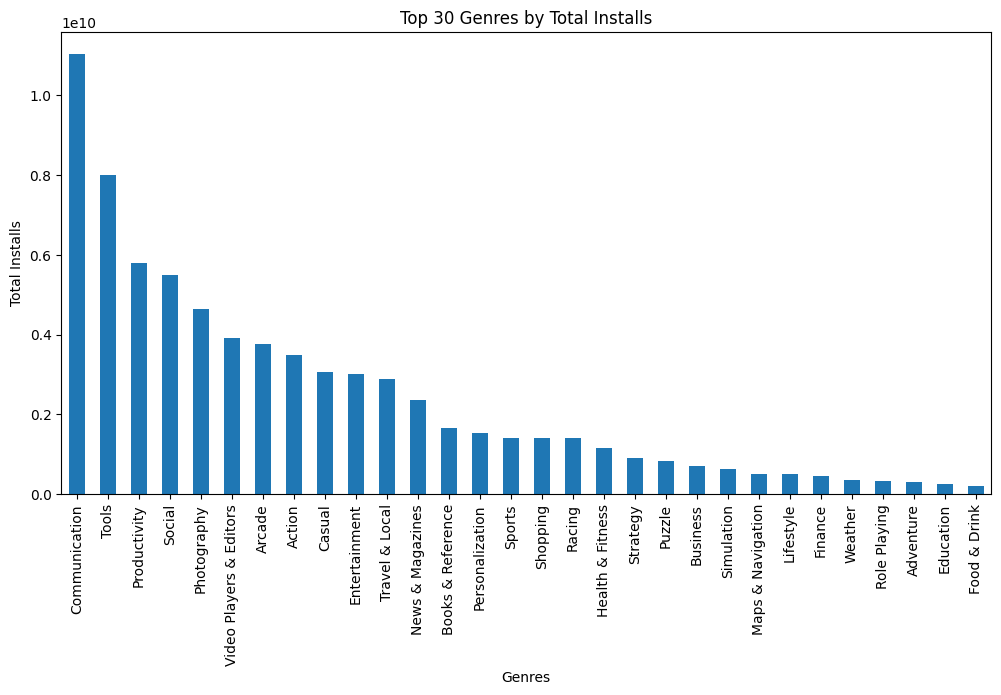

In [169]:
# Group by 'Genres' and sum the installs
installs_by_genre = df2.groupby('Genres')['Installs'].sum()

# Sort the results by descending order
top_30_genres = installs_by_genre.sort_values(ascending=False).head(30)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_30_genres.plot(kind='bar')
plt.xlabel("Genres")
plt.ylabel("Total Installs")
plt.title("Top 30 Genres by Total Installs")
plt.xticks(rotation=90)
plt.show()

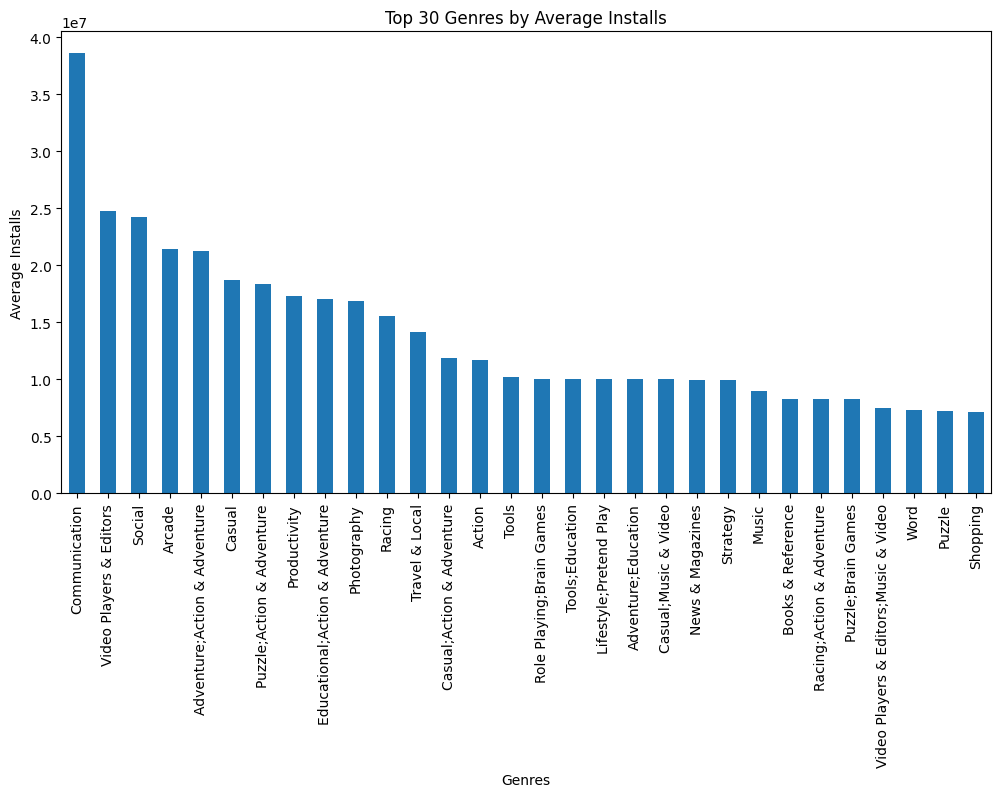

In [170]:
# Group by 'Genres' and mean the installs
installs_by_genre = df2.groupby('Genres')['Installs'].mean()

# Sort the results by descending order
top_30_genres = installs_by_genre.sort_values(ascending=False).head(30)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_30_genres.plot(kind='bar')
plt.xlabel("Genres")
plt.ylabel("Average Installs")
plt.title("Top 30 Genres by Average Installs")
plt.xticks(rotation=90)
plt.show()

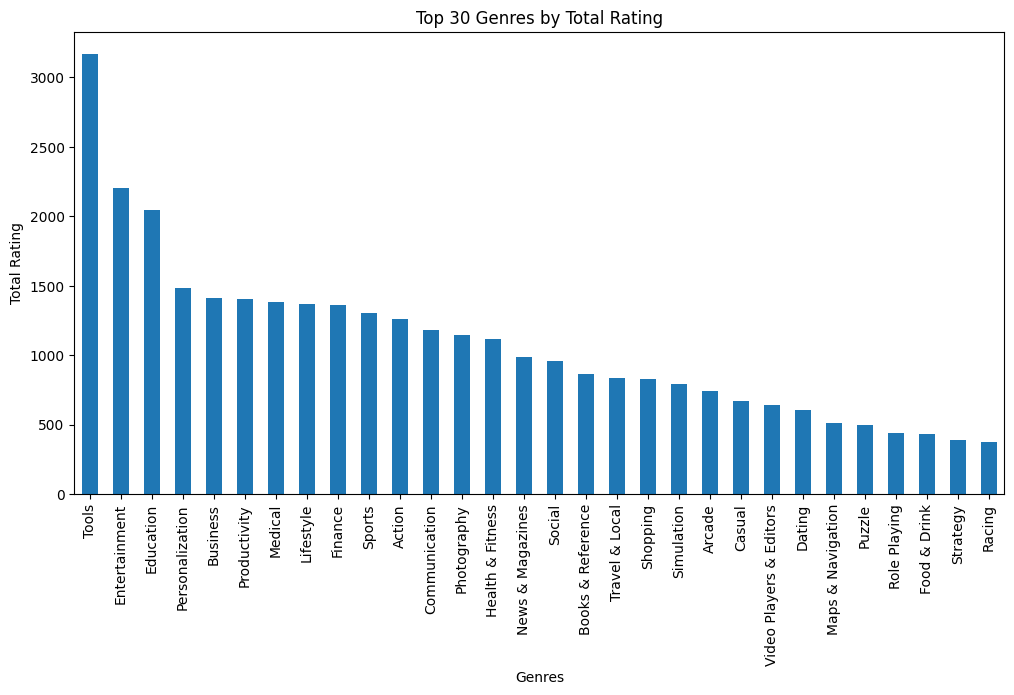

In [171]:
# Group by 'Genres' and mean the installs
installs_by_genre = df2.groupby('Genres')['Rating'].sum()

# Sort the results by descending order
top_30_genres = installs_by_genre.sort_values(ascending=False).head(30)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_30_genres.plot(kind='bar')
plt.xlabel("Genres")
plt.ylabel("Total Rating")
plt.title("Top 30 Genres by Total Rating")
plt.xticks(rotation=90)
plt.show()

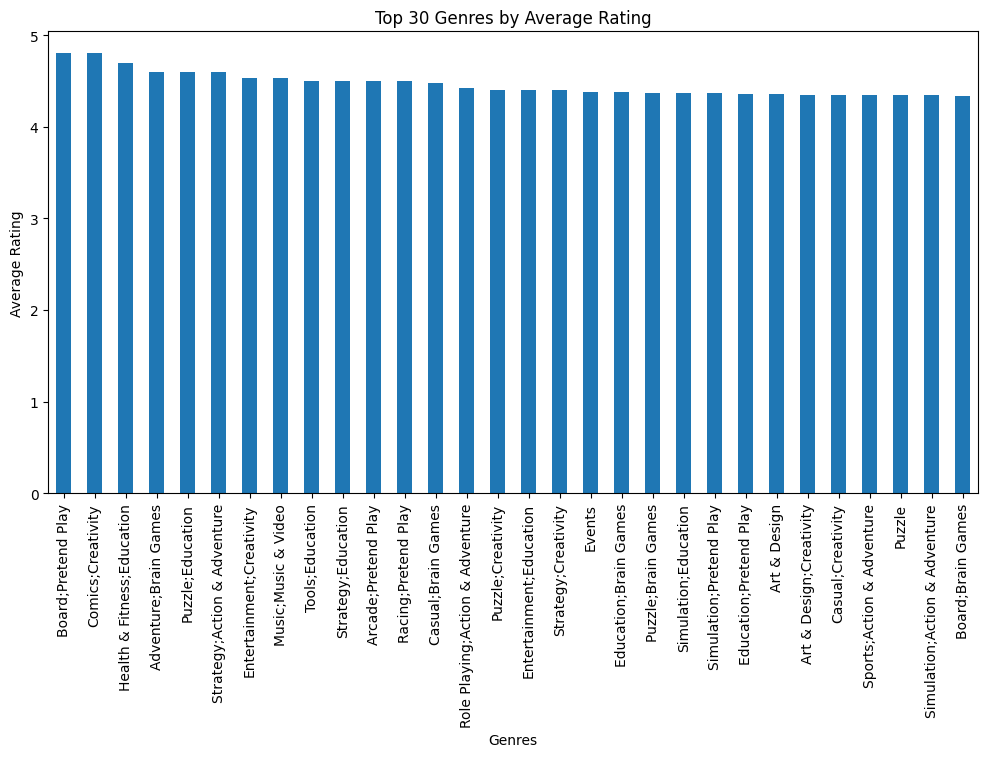

In [172]:
# Group by 'Genres' and mean the installs
installs_by_genre = df2.groupby('Genres')['Rating'].mean()

# Sort the results by descending order
top_30_genres = installs_by_genre.sort_values(ascending=False).head(30)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_30_genres.plot(kind='bar')
plt.xlabel("Genres")
plt.ylabel("Average Rating")
plt.title("Top 30 Genres by Average Rating")
plt.xticks(rotation=90)
plt.show()

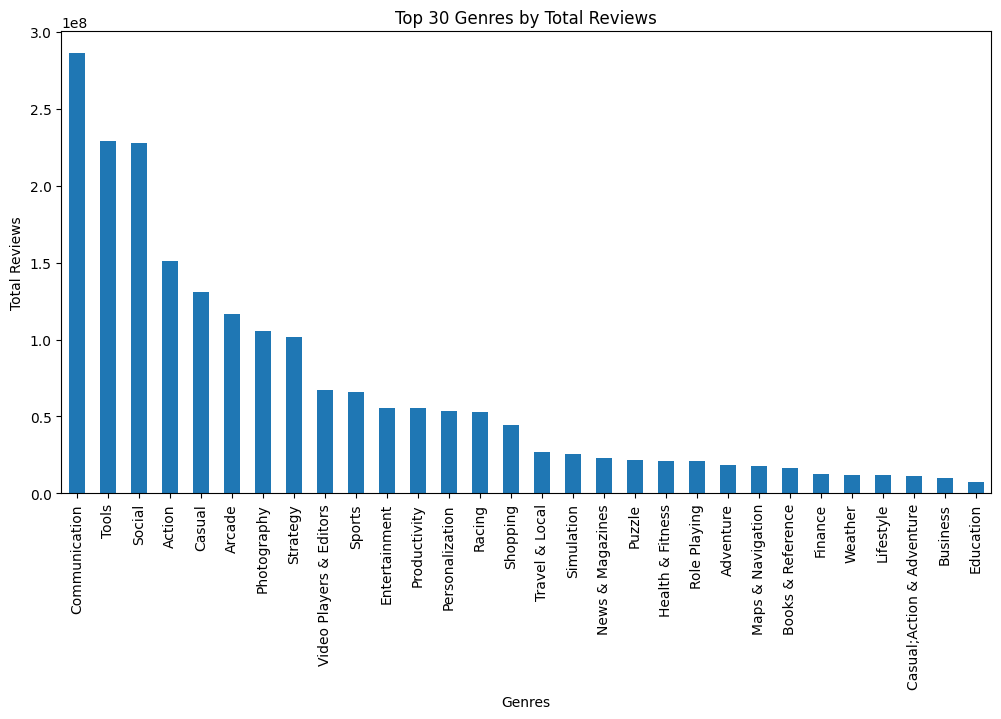

In [173]:
# Group by 'Genres' and mean the installs
installs_by_genre = df2.groupby('Genres')['Reviews'].sum()

# Sort the results by descending order
top_30_genres = installs_by_genre.sort_values(ascending=False).head(30)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_30_genres.plot(kind='bar')
plt.xlabel("Genres")
plt.ylabel("Total Reviews")
plt.title("Top 30 Genres by Total Reviews")
plt.xticks(rotation=90)
plt.show()

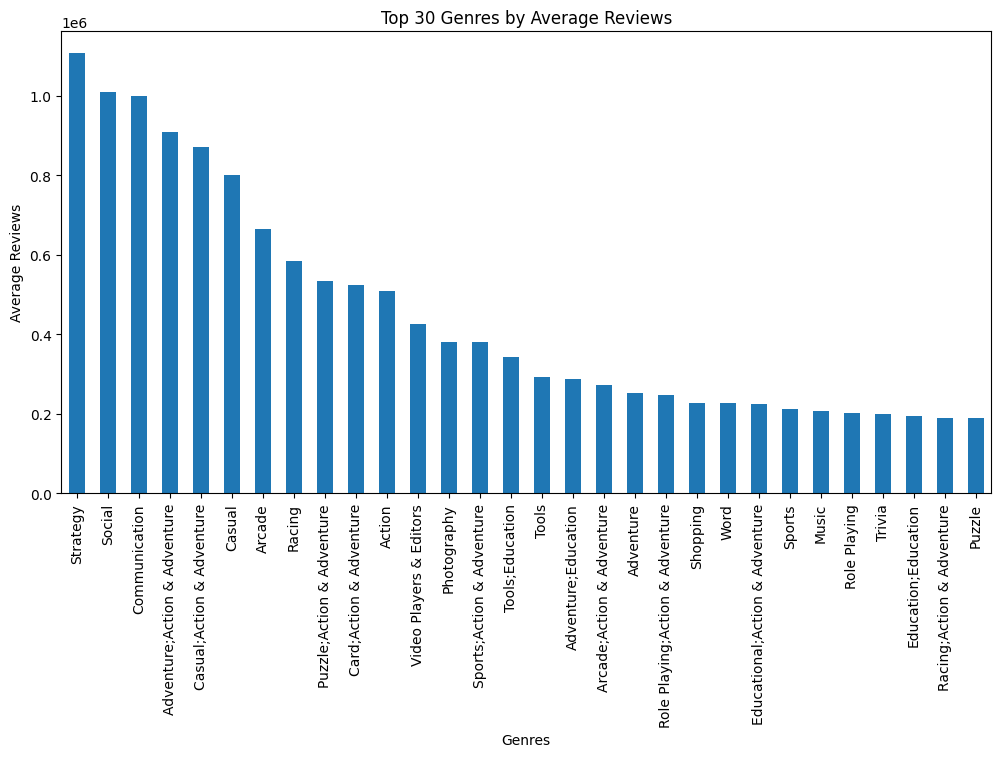

In [174]:
# Group by 'Genres' and mean the installs
installs_by_genre = df2.groupby('Genres')['Reviews'].mean()

# Sort the results by descending order
top_30_genres = installs_by_genre.sort_values(ascending=False).head(30)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_30_genres.plot(kind='bar')
plt.xlabel("Genres")
plt.ylabel("Average Reviews")
plt.title("Top 30 Genres by Average Reviews")
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To get anidea of the distribution and popularity of Genres.

##### 2. What is/are the insight(s) found from the chart?

Top 5 'Genres' by count:\
Tools, Entertainment, Educationn, Personalization and Business

---

Top 5 'Genres' by total Installs:\
Communication, Tools, Productivity, Social and Photography

Top 5 'Genres' by mean Installs:\
Communication, Video Players & Editors, Social, Arcade and Puzzle

---

Top 5 'Genres' by total Ratings:\
Tools, Entertainment, Education, Personalization and Business

Top 5 'Genres' by mean Ratings:\
Board, Creativity, Education, Adventure and Puzzle

---

Top 5 'Genres' by total Reviews:\
Communication, Tools, Social, Action and Casual

Top 5 'Genres' by mean Reviews:\
Strategy, Social, Communication, Adventure, Casual, Action & Adventure

---

In [175]:
from collections import Counter

paragraph = '''

Communication, Tools, Productivity, Social and Photography

Communication, Video Players & Editors, Social, Arcade and Puzzle

Tools, Entertainment, Education, Personalization and Business

Board, Creativity, Education, Adventure and Puzzle

Communication, Tools, Social, Action and Casual

Strategy, Social, Communication, Adventure, Casual, Action & Adventure
'''

# Remove punctuation and split the string into words
words = [word.lower().strip('.,!?"') for word in paragraph.split()]

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(15)

# Print the top 10 words and their counts
for word, count in top_10_words:
    print(f"{word}: {count}")

and: 5
communication: 4
social: 4
tools: 3
adventure: 3
&: 2
puzzle: 2
education: 2
action: 2
casual: 2
productivity: 1
photography: 1
video: 1
players: 1
editors: 1


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### The top Genres by comparison with Installs, Reviews and Ratings are:
### 1. Communication
### 2. Social
### 3. Tools
### 4. Adventure
### 5. Puzzle
### 6. Action
### 7. Casual
### 8. Productivity

## Exploring column 'Correlation Heatmap'

In [176]:
# Correlation Heatmap visualization code
correlation_matrix = df2[['Rating','Reviews','Size','Installs','Price','Android Ver']].corr()
correlation_matrix

Rating   Reviews      Size  Installs     Price  Android Ver
Rating       1.000000  0.054631  0.056274  0.039576 -0.021225     0.037439
Reviews      0.054631  1.000000  0.084927  0.624750 -0.007430    -0.021085
Size         0.056274  0.084927  1.000000  0.056189 -0.022547     0.133179
Installs     0.039576  0.624750  0.056189  1.000000 -0.009211    -0.032765
Price       -0.021225 -0.007430 -0.022547 -0.009211  1.000000     0.010746
Android Ver  0.037439 -0.021085  0.133179 -0.032765  0.010746     1.000000

<Axes: >

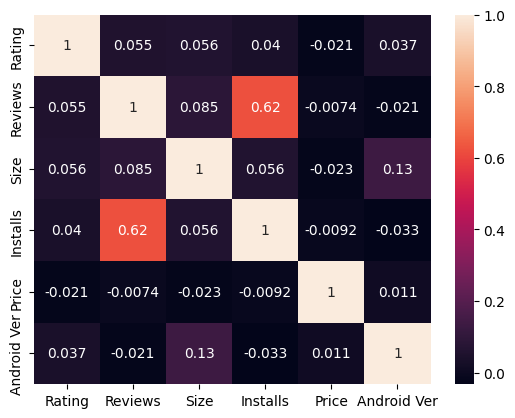

In [177]:
sns.heatmap(correlation_matrix, annot=True)

## Exploring column 'Pair Plot'

In [178]:
df2.drop('Year', axis=1, inplace=True)

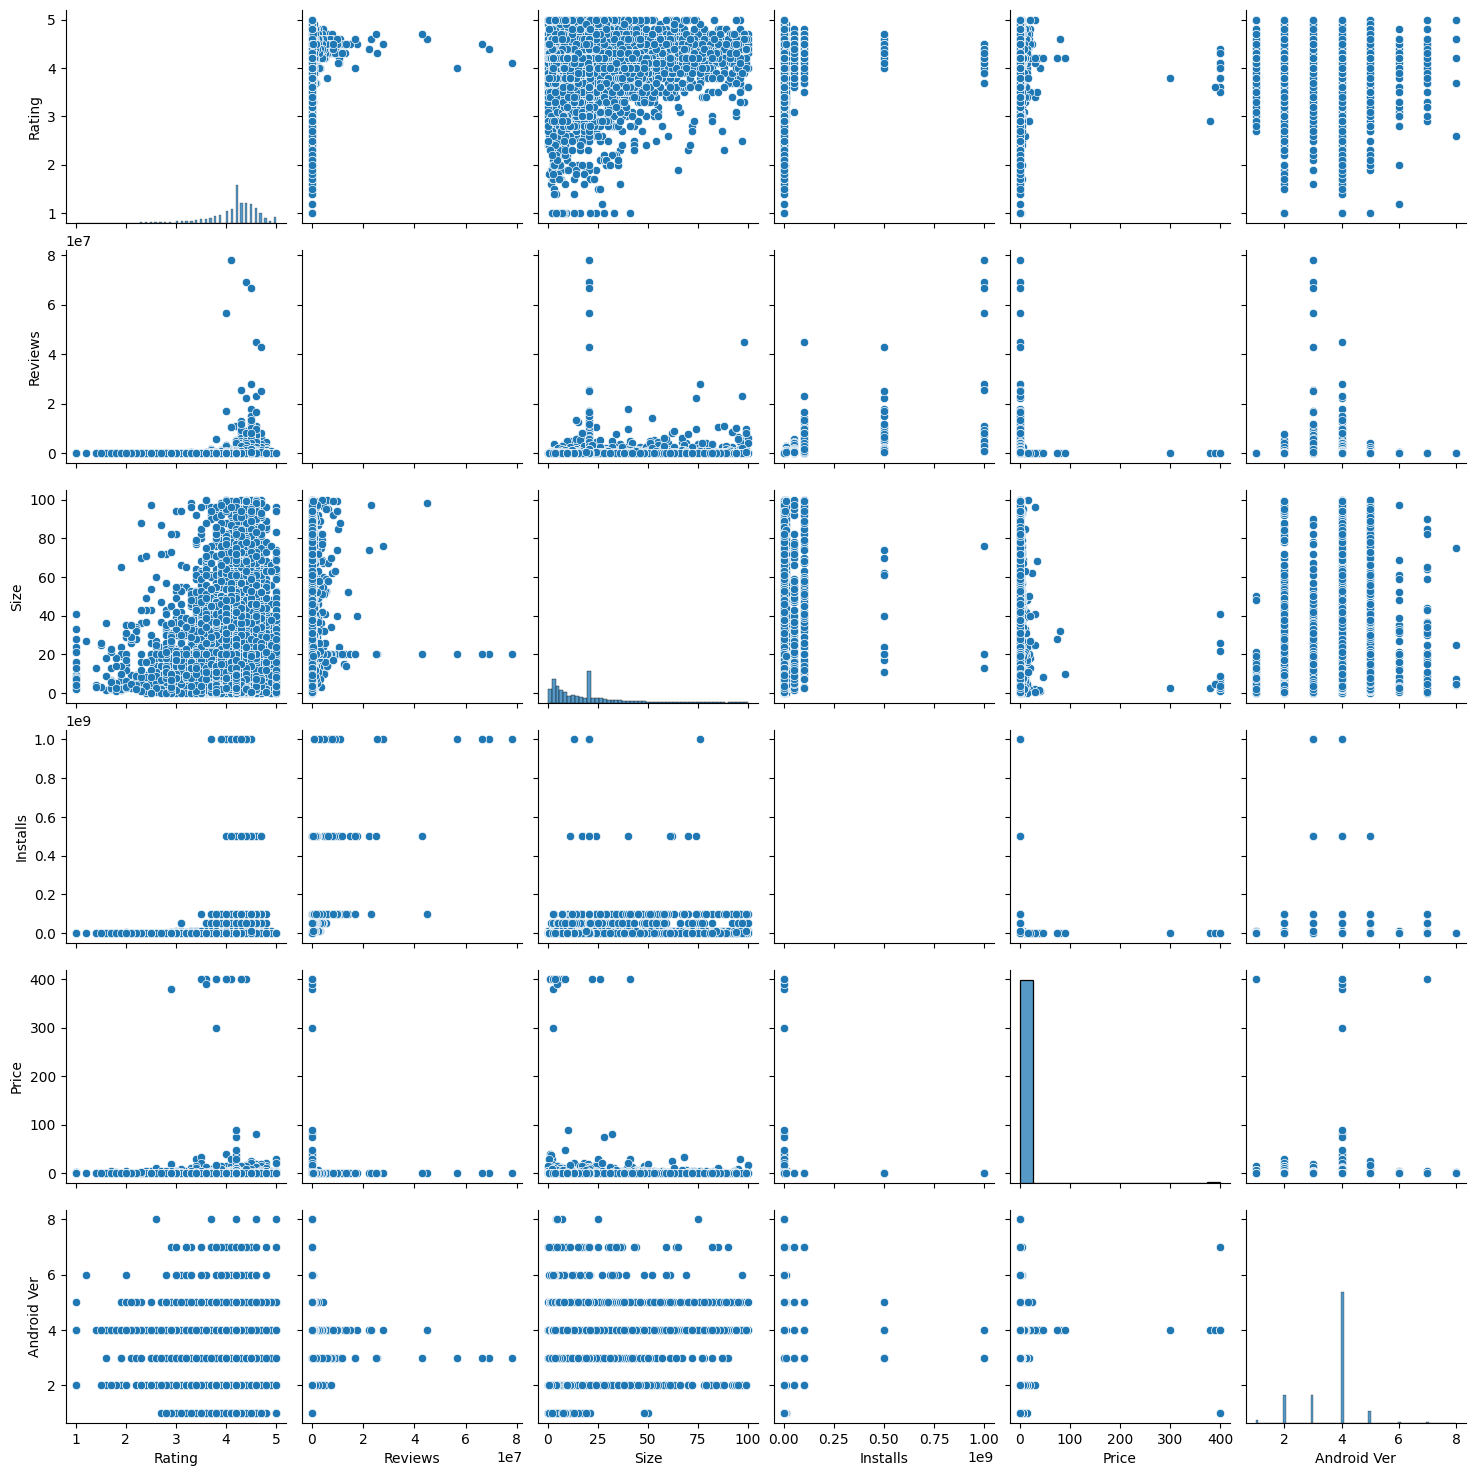

In [179]:
# Pair Plot visualization code
sns.pairplot(df2[['Rating','Reviews','Size','Installs','Price','Android Ver']])

##### 2. What is/are the insight(s) found from the chart?

01. Reviews go up in number with higher Ratings
02. Installs go up in number with higher Ratings
03. Prices go up with higher Ratings
04. Reviews are highest for apps of Size around 20MB
05. High Reviews give high Install
06. The higher the Price, the lesser the reviews
07. Highest reviews for android version 3 and 4
08. Ratings are relatively high for high Size apps
09. Most apps above 50MB are free
10. Highest installs for Rating 3 and 4
11. Highest installs are for free apps

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

## I suggest a business among the categories(ranked top to bottom): Game, Social, Communication, Tools and Family within a size range of either 20MB - 24MB or 75MB - 100MB that operates on an android version of at least 4, content rated at either 'Everyone' or 'Teen', priced within 0.1\$ to 10\$ for paid apps if necessary and of the genre Adventure, Puzzle, Action or Casual for Games and of the genre Productivity for Tools.

# **Conclusion**

Write the conclusion here.

In [180]:
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Clean_PStoreData.csv', index=False)

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***